#📌 **Extracción**

# =========================
# 📦 1. Importación de librerías
# =========================

# Librerías para manejo y análisis de datos

In [ ]:
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize
from IPython.display import Image, display


# Visualización de datos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 📂 2. Carga de datos desde JSON (fuente: API de Telecom X)
# =========================

In [ ]:
# Lectua del archivo JSON - TelecomX_Data.json
df = pd.read_json('TelecomX_Data.json')
df

customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1       {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
...                                                 ...   
7262     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7263    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
7264     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7265     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7266  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                               internet  \
0     {'InternetService': 'DSL', 'OnlineSecurity': '...   
1     {'InternetService': 'DSL', 'OnlineSecurity': '...   
2     {'InternetService': 'Fiber optic', 'OnlineSecu...   
3     {'InternetService': 'Fiber optic', 'OnlineSecu...   
4     {'InternetService': 'Fiber optic', 'OnlineSecu...   
...                                                 ...   
7262  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7263  {'InternetService': 'Fiber optic', 'OnlineSecu...   
7264  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7265  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7266  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                                account  
0     {'Contract': 'One year', 'PaperlessBilling': '...  
1     {'Contract': 'Month-to-month', 'PaperlessBilli...  
2     {'Contract': 'Month-to-month', 'PaperlessBilli...  
3     {'Contract': 'Month-to-month', 'PaperlessBilli...  
4     {'Contract': 'Month-to-month', 'PaperlessBilli...  
...                                                 ...  
7262  {'Contract': 'One year', 'PaperlessBilling': '...  
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7265  {'Contract': 'Two year', 'PaperlessBilling': '...  
7266  {'Contract': 'Two year', 'PaperlessBilling': '...  

[7267 rows x 6 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


## **Expandiendo las columnas del diccionario**

In [4]:
# Expandimos las columnas de diccionarios
df_customer = pd.json_normalize(df['customer']).add_prefix('customer_')
df_phone    = pd.json_normalize(df['phone']).add_prefix('phone_')
df_internet = pd.json_normalize(df['internet']).add_prefix('internet_')
df_account  = pd.json_normalize(df['account']).add_prefix('account_')

In [5]:
# Unimos todo en un nuevo DataFrame normalizado
df_normalizado = pd.concat([
    df[['customerID', 'Churn']],  # columnas originales que queremos conservar
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

In [6]:
# revisamos las columnas del nuevo dataframe
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [7]:
# renombramos las columnas para quitar los prefijos agregados
df_normalizado.columns = df_normalizado.columns.str.replace('customer_', '')
df_normalizado.columns = df_normalizado.columns.str.replace('phone_', '')
df_normalizado.columns = df_normalizado.columns.str.replace('internet_', '')
df_normalizado.columns = df_normalizado.columns.str.replace('account_', '')
df_normalizado.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

#🔧 **Transformación**

## **Identificando tipos de datos**

In [8]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### **Transformando Charges.Total a decimal**


In [9]:
# reemplazamos " " por "" en la columna "Charges.Total"
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].str.replace(' ', '')

# transformamos Charges.Total a número
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

# transformamos la columna "Charges.Total" a decimal
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].astype(float)

df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].fillna(0)

df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## **Revisando consistencia de la información**

### **Análisis de consistencia de información**

In [10]:
# seleccionamos la cantidad de registros agrupados por los campos "PhoneService" y "MultipleLines"
# para detectar la consistencia de que no haya PhoneService=No con Multiplelines=Yes
df_normalizado.groupby(['PhoneService', 'MultipleLines']).size()

PhoneService  MultipleLines   
No            No phone service     707
Yes           No                  3495
              Yes                 3065
dtype: int64

In [11]:
# "PhoneService" y "MultipleLines" están consistentes

In [12]:
# Analizamos consistencia entre "InternetServices" y "OnlineSeurity"
# Valores únicos en la columna 'InternetService':
# ['DSL' 'Fiber optic' 'No']
# Valores únicos en la columna 'OnlineSecurity':
# ['No' 'Yes' 'No internet service']
# seleccionemos la cantidad de registros agrupados por los campos "InternetService" y "OnlineSecurity"
df_normalizado.groupby(['InternetService', 'OnlineSecurity']).size()

InternetService  OnlineSecurity     
DSL              No                     1279
                 Yes                    1209
Fiber optic      No                     2329
                 Yes                     869
No               No internet service    1581
dtype: int64

In [13]:
# "InternetServices" y "OnlineSeurity" están consistentes

In [14]:
# Analizamos consistencia entre "InternetServices" y "OnlineBackup"
df_normalizado.groupby(['InternetService', 'OnlineBackup']).size()

InternetService  OnlineBackup       
DSL              No                     1371
                 Yes                    1117
Fiber optic      No                     1811
                 Yes                    1387
No               No internet service    1581
dtype: int64

In [15]:
# "InternetServices" y "OnlineBackup" están consistentes

# seleccionamos la cantidad de clientes con churn=Yes agrupados por tenure
df_normalizado[df_normalizado['Churn'] == 'Yes'].groupby('tenure').size()

tenure
1     380
2     123
3      94
4      83
5      64
     ... 
68      9
69      8
70     11
71      6
72      6
Length: 72, dtype: int64

In [16]:
# Analizamos consistencia entre "InternetServices" y "DeviceProtection"
df_normalizado.groupby(['InternetService', 'DeviceProtection']).size()

InternetService  DeviceProtection   
DSL              No                     1398
                 Yes                    1090
Fiber optic      No                     1797
                 Yes                    1401
No               No internet service    1581
dtype: int64

In [17]:
# "InternetServices" y "DeviceProtection" están consistentes

In [18]:
# Analizamos consistencia entre "InternetServices" y "TechSupport"
df_normalizado.groupby(['InternetService', 'TechSupport']).size()

InternetService  TechSupport        
DSL              No                     1280
                 Yes                    1208
Fiber optic      No                     2302
                 Yes                     896
No               No internet service    1581
dtype: int64

In [19]:
# "InternetServices" y "TechSupport" están consistentes

In [20]:
# Analizamos consistencia entre "InternetServices" y "StreamingTV"
df_normalizado.groupby(['InternetService', 'StreamingTV']).size()

InternetService  StreamingTV        
DSL              No                     1504
                 Yes                     984
Fiber optic      No                     1392
                 Yes                    1806
No               No internet service    1581
dtype: int64

In [21]:
# "InternetServices" y "StreamingTV" están consistentes

In [22]:
# Analizamos consistencia entre "InternetServices" y "StreamingMovies"
df_normalizado.groupby(['InternetService', 'StreamingMovies']).size()

InternetService  StreamingMovies    
DSL              No                     1484
                 Yes                    1004
Fiber optic      No                     1386
                 Yes                    1812
No               No internet service    1581
dtype: int64

In [23]:
# "InternetServices" y "StreamingMovies" están consistentes

In [24]:
# revisamos si hay customerID duplicados
df_normalizado[df_normalizado.duplicated(subset='customerID', keep=False)]

Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]

In [25]:
# No existen customerID duplicados

In [26]:
# revisamos los valores únicos de cada columna de caracteres para detectar si hay datos incorrectos
# exceptuando la columna customerID
for col in df_normalizado.columns:
    if df_normalizado[col].dtype == 'object' and col != 'customerID' :
        print(f"Valores únicos en la columna '{col}':")
        print(df_normalizado[col].unique())
        print()

Valores únicos en la columna 'Churn':
['No' 'Yes' '']

Valores únicos en la columna 'gender':
['Female' 'Male']

Valores únicos en la columna 'Partner':
['Yes' 'No']

Valores únicos en la columna 'Dependents':
['Yes' 'No']

Valores únicos en la columna 'PhoneService':
['Yes' 'No']

Valores únicos en la columna 'MultipleLines':
['No' 'Yes' 'No phone service']

Valores únicos en la columna 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores únicos en la columna 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores únicos en la columna 'OnlineBackup':
['Yes' 'No' 'No internet service']

Valores únicos en la columna 'DeviceProtection':
['No' 'Yes' 'No internet service']

Valores únicos en la columna 'TechSupport':
['Yes' 'No' 'No internet service']

Valores únicos en la columna 'StreamingTV':
['Yes' 'No' 'No internet service']

Valores únicos en la columna 'StreamingMovies':
['No' 'Yes' 'No internet service']

Valores únicos en la columna 'Contract':
['One year' 'Month-to-month'

In [27]:
# Hay registros con Churn = ''
# seleccionemos todos los registros que tienen Churn = ''
df_normalizado[df_normalizado['Churn'] == '']

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
30    0047-ZHDTW        Female              0      No         No      11   
75    0120-YZLQA          Male              0      No         No      71   
96    0154-QYHJU          Male              0      No         No      29   
98    0162-RZGMZ        Female              1      No         No       5   
175   0274-VVQOQ          Male              1     Yes         No      65   
...          ...   ...     ...            ...     ...        ...     ...   
7158  9840-GSRFX        Female              0      No         No      14   
7180  9872-RZQQB        Female              0     Yes         No      49   
7211  9920-GNDMB          Male              0      No         No       9   
7239  9955-RVWSC        Female              0     Yes        Yes      67   
7247  9966-VYRTZ        Female              0     Yes        Yes      31   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
30            Yes               Yes     Fiber optic  ...                   No   
75            Yes                No              No  ...  No internet service   
96            Yes                No             DSL  ...                  Yes   
98            Yes                No             DSL  ...                  Yes   
175           Yes               Yes     Fiber optic  ...                  Yes   
...           ...               ...             ...  ...                  ...   
7158          Yes               Yes             DSL  ...                  Yes   
7180           No  No phone service             DSL  ...                   No   
7211          Yes               Yes     Fiber optic  ...                   No   
7239          Yes                No              No  ...  No internet service   
7247          Yes                No              No  ...  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
30                     No                   No                   No   
75    No internet service  No internet service  No internet service   
96                     No                  Yes                   No   
98                     No                  Yes                   No   
175                   Yes                   No                  Yes   
...                   ...                  ...                  ...   
7158                   No                   No                   No   
7180                   No                   No                  Yes   
7211                   No                   No                   No   
7239  No internet service  No internet service  No internet service   
7247  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling  \
30                     No  Month-to-month              Yes   
75    No internet service        Two year              Yes   
96                     No        One year              Yes   
98                     No  Month-to-month               No   
175                   Yes        One year              Yes   
...                   ...             ...              ...   
7158                   No        One year              Yes   
7180                   No  Month-to-month               No   
7211                   No  Month-to-month              Yes   
7239  No internet service        Two year              Yes   
7247  No internet service  Month-to-month              Yes   

                  PaymentMethod Charges.Monthly  Charges.Total  
30    Bank transfer (automatic)           79.00         929.30  
75      Credit card (automatic)           19.90        1355.10  
96             Electronic check           58.75        1696.20  
98      Credit card (automatic)           59.90         287.85  
175   Bank transfer (automatic)          103.15        6792.45  
...                         ...             ...            ...  
7158               Mailed check           54.25         773.20  
71

In [28]:
# hay 224 registros con Churn = ''
# estos corresponden al 3% del total (7266), no parece ser una cantidad suficiente para
# afectar en forma apreciable los análisis, independientemente de si se tratan como "Yes" o "No"
#
# eliminamos los registross con "Churn" = ''
df_normalizado = df_normalizado[df_normalizado['Churn'] != '']

In [29]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [30]:
# mantenermos 7043 registros para el análisis de información
#
# guardamos el dataframe en un archivo csv
df_normalizado.to_csv('TelecomX_Data_normalizado.csv', index=False)
df_normalizado.to_csv('df_normalizado.csv', index=False)

# **Análisis de información**

## **Análisis general de información**

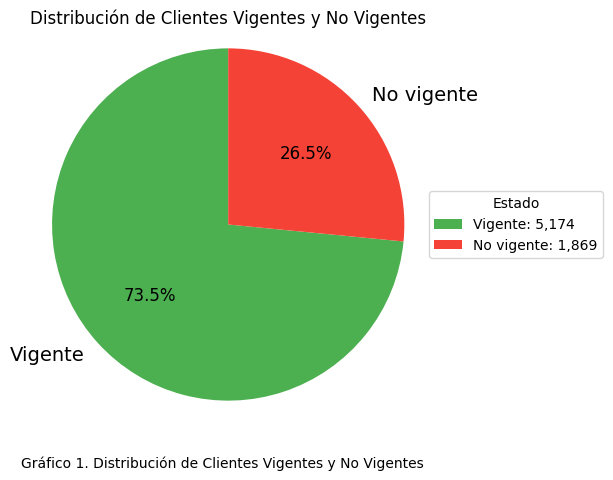

In [31]:
# Distribución de clientes Vigentes y No Vigentes
# Contamos valores de Churn
serie = df_normalizado['Churn'].value_counts()
total = serie.sum()

# Mapeo de etiquetas
labels = ['Vigente', 'No vigente']  # No → Vigente, Yes → No vigente

# Creamos gráfico de pie
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(
    serie,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#F44336']  # Verde para Vigente, Rojo para No vigente
)

# Ajustamos tamaño de fuente de los valores
for text in autotexts:
    text.set_fontsize(12)
for text in texts:
    text.set_fontsize(14)

# Recuadro con los valores absolutos y etiquetas personalizadas
valores_abs = [f'{etiqueta}: {valor:,}' for etiqueta, valor in zip(labels, serie)]
ax.legend(wedges, valores_abs, title='Estado', loc='center left', bbox_to_anchor=(1, 0.5))

# Personalización
plt.title('Distribución de Clientes Vigentes y No Vigentes')
ax.axis('equal')  # Mantener el gráfico circular

plt.figtext(0.5, 0.01, 'Gráfico 1. Distribución de Clientes Vigentes y No Vigentes', ha='center', fontsize=10)

# guardamos gráfico como imagen png
plt.savefig('graf_01_dist_clientes.png', dpi=300, bbox_inches='tight')

plt.show()


### **Distribución de Clientes Vigentes y No Vigentes por Categorías**

In [32]:
# Analizamos la distribución de vigentes y no vigentes por categorías
# Cargamos los datos
df = pd.read_csv('df_normalizado.csv')

# Definimos las categorías a analizar
categorias = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'InternetService', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Creamos lista para almacenar resultados
resultados = []

# Recorremos cada categoría y agrupamos por valor de la categoría y Churn
for cat in categorias:
    conteos = df.groupby([cat, 'Churn']).size().unstack(fill_value=0)
    conteos = conteos.reset_index()

    # Renombramos columnas
    conteos = conteos.rename(columns={'Yes': 'No Vigente', 'No': 'Vigente'})

    # Añadimos columnas Categoría y Valor
    conteos.insert(0, 'Categoría', cat)
    conteos.rename(columns={cat: 'Valor'}, inplace=True)

    resultados.append(conteos)

# Unimos todos los resultados en un solo DataFrame
df_resultados = pd.concat(resultados, ignore_index=True)

# agregamos dos columnas con el porcentaje de Vigente y porcentaje de No vigentes para cada registro
df_resultados['Porcentaje Vigente'] = (df_resultados['Vigente'] / 5174) * 100         # dividimos por la cantidad de clietes vigentes
df_resultados['Porcentaje No Vigente'] = (df_resultados['No Vigente'] / 1869) * 100   # dividimos por la cantidad de clientes no vigentes


In [33]:
# cambiamos el valor de 0 para el registro donde categoría=SeniorCitizen a Adulto
df_resultados.loc[(df_resultados['Categoría'] == 'SeniorCitizen') & (df_resultados['Valor'] == 0), 'Valor'] = 'Adulto'
df_resultados.loc[(df_resultados['Categoría'] == 'SeniorCitizen') & (df_resultados['Valor'] == 1), 'Valor'] = 'Adulto Mayor'
df_resultados.loc[(df_resultados['Categoría'] == 'Partner') & (df_resultados['Valor'] =='No'), 'Valor'] = 'Sin Pareja'
df_resultados.loc[(df_resultados['Categoría'] == 'Partner') & (df_resultados['Valor'] =='Yes'), 'Valor'] = 'Con Pareja'
df_resultados.loc[(df_resultados['Categoría'] == 'Dependents') & (df_resultados['Valor'] =='No'), 'Valor'] = 'Sin Dependientes'
df_resultados.loc[(df_resultados['Categoría'] == 'Dependents') & (df_resultados['Valor'] =='Yes'), 'Valor'] = 'Con Dependientes'

In [34]:
df_resultados.loc[(df_resultados['Categoría'] == 'PhoneService') & (df_resultados['Valor'] =='No'), 'Valor'] = 'Sin Telefonía'
df_resultados.loc[(df_resultados['Categoría'] == 'PhoneService') & (df_resultados['Valor'] =='Yes'), 'Valor'] = 'Con Telefonía'
df_resultados.loc[(df_resultados['Categoría'] == 'InternetService') & (df_resultados['Valor'] =='Yes'), 'Valor'] = 'Con Internet'
df_resultados.loc[(df_resultados['Categoría'] == 'InternetService') & (df_resultados['Valor'] =='No'), 'Valor'] = 'Sin Internet'

df_resultados.loc[(df_resultados['Categoría'] == 'StreamingTV') & (df_resultados['Valor'] =='No'), 'Valor'] = 'Sin StreamingTV'
df_resultados.loc[(df_resultados['Categoría'] == 'StreamingTV') & (df_resultados['Valor'] =='Yes'), 'Valor'] = 'Con StreamingTV'

df_resultados.loc[(df_resultados['Categoría'] == 'StreamingMovies') & (df_resultados['Valor'] =='No'), 'Valor'] = 'Sin StreamingMovies'
df_resultados.loc[(df_resultados['Categoría'] == 'StreamingMovies') & (df_resultados['Valor'] =='Yes'), 'Valor'] = 'Con StreamingMovies'

df_resultados.loc[(df_resultados['Categoría'] == 'PaperlessBilling') & (df_resultados['Valor'] =='No'), 'Valor'] = 'Factura electrónica'
df_resultados.loc[(df_resultados['Categoría'] == 'PaperlessBilling') & (df_resultados['Valor'] =='Yes'), 'Valor'] = 'Factura en papel'

# eliminamos registros donde Valor es = No internet service
df_resultados = df_resultados[df_resultados['Valor'] != 'No internet service']

In [35]:
# ordenamos df_resultados por Porcentaje vigente en forma descendente
df_resultados = df_resultados.sort_values('Porcentaje Vigente', ascending=False).copy()
df_resultados

Churn         Categoría                      Valor  Vigente  No Vigente  \
9          PhoneService              Con Telefonía     4662        1699   
2         SeniorCitizen                     Adulto     4508        1393   
6            Dependents           Sin Dependientes     3390        1543   
23     PaperlessBilling           Factura en papel     2771        1400   
5               Partner                 Con Pareja     2733         669   
1                gender                       Male     2625         930   
0                gender                     Female     2549         939   
4               Partner                 Sin Pareja     2441        1200   
22     PaperlessBilling        Factura electrónica     2403         469   
19             Contract             Month-to-month     2220        1655   
10      InternetService                        DSL     1962         459   
18      StreamingMovies        Con StreamingMovies     1914         818   
15          StreamingTV            Con StreamingTV     1893         814   
13          StreamingTV            Sin StreamingTV     1868         942   
16      StreamingMovies        Sin StreamingMovies     1847         938   
11      InternetService                Fiber optic     1799        1297   
7            Dependents           Con Dependientes     1784         326   
21             Contract                   Two year     1647          48   
12      InternetService               Sin Internet     1413         113   
20             Contract                   One year     1307         166   
27        PaymentMethod               Mailed check     1304         308   
26        PaymentMethod           Electronic check     1294        1071   
25        PaymentMethod    Credit card (automatic)     1290         232   
24        PaymentMethod  Bank transfer (automatic)     1286         258   
3         SeniorCitizen               Adulto Mayor      666         476   
8          PhoneService              Sin Telefonía      512         170   

Churn  Porcentaje Vigente  Porcentaje No Vigente  
9               90.104368              90.904227  
2               87.127947              74.531835  
6               65.519907              82.557517  
23              53.556243              74.906367  
5               52.821801              35.794543  
1               50.734441              49.759230  
0               49.265559              50.240770  
4               47.178199              64.205457  
22              46.443757              25.093633  
19              42.906842              88.550027  
10              37.920371              24.558587  
18              36.992656              43.766720  
15              36.586780              43.552702  
13              36.103595              50.401284  
16              35.697719              50.187266  
11              34.770004              69.395399  
7               34.480093              17.442483  
21              31.832238               2.568218  
12              27.309625               6.046014  
20              25.260920               8.881755  
27              25.202938              16.479401  
26              25.009664              57.303371  
25              24.932354              12.413055  
24              24.855044              13.804173  
3               12.872053              25.468165  
8                9.895632               9.095773

In [36]:
# guardamos df_resultados como archivo csv
df_resultados.to_csv('vigentes_novigentes_por_categoria.csv', index=False)

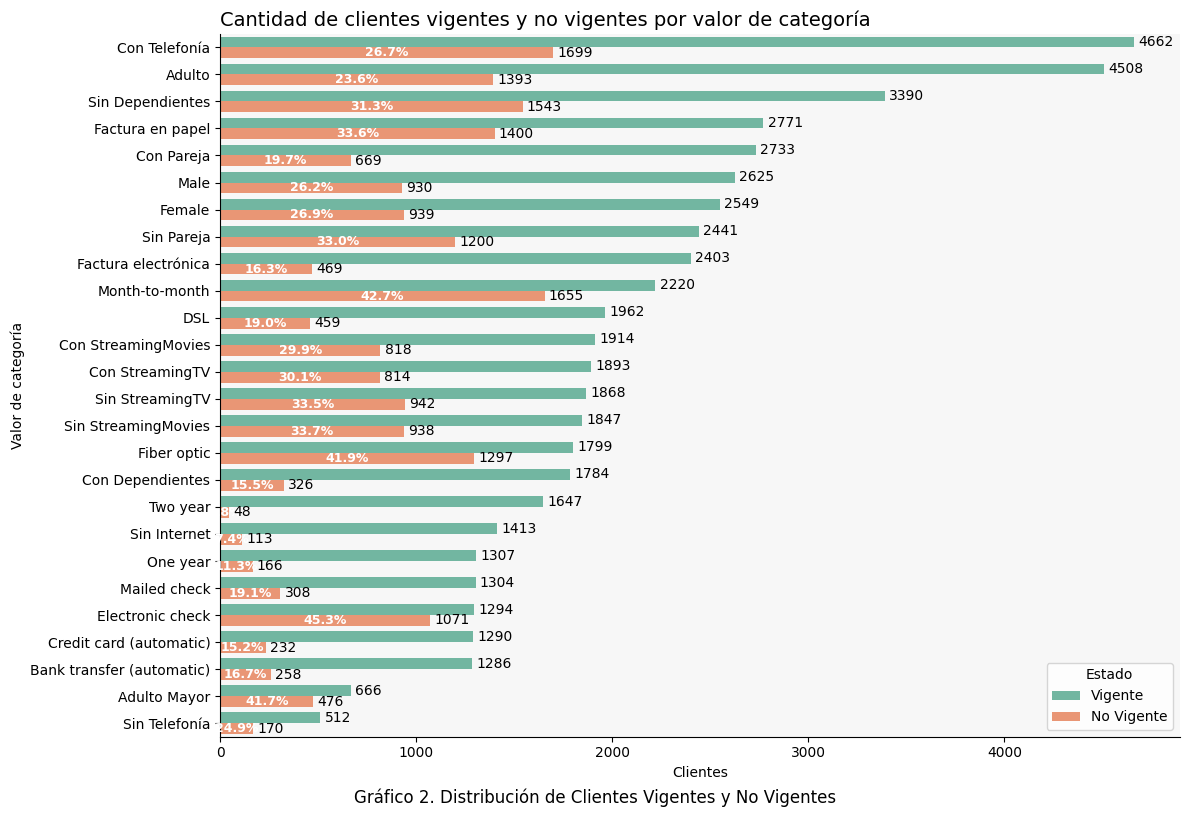

In [37]:
data = pd.read_csv('vigentes_novigentes_por_categoria.csv')

df_melted = data.melt(
    id_vars=["Categoría", "Valor"],
    value_vars=["Vigente", "No Vigente"],
    var_name="Estado",
    value_name="Cantidad"
)

# Calculamos total por cada "valor" (agrupado por valor de categoría)
totales = df_melted.groupby('Valor')['Cantidad'].sum().reset_index(name='total')

# Unimos total al df original
df_melted = df_melted.merge(totales, on='Valor')

# Agregamos columna de porcentaje
df_melted['porcentaje'] = (df_melted['Cantidad'] / df_melted['total']) * 100

# Creamos gráfico
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=df_melted,
    x="Cantidad",
    y="Valor",
    hue="Estado",
    palette="Set2"
)

# Fondo gris claro solo en el área del gráfico
ax.set_facecolor('#f7f7f7')

# Recorremos cada barra y agregar anotaciones solo en las barras "No Vigente"
for bar, (estado, porcentaje) in zip(ax.patches, zip(df_melted['Estado'], df_melted['porcentaje'])):
    if estado == 'No Vigente':
        width = bar.get_width()
        x = bar.get_x() + width / 2
        y = bar.get_y() + bar.get_height() / 2
        ax.text(
            x, y,
            f"{porcentaje:.1f}%",
            ha='center', va='center',
            color='white', fontsize=9, fontweight='bold'
        )

# Agregamos etiquetas con los valores sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# agregamos en la barra No Vigente el porcentaje correspondientes al número de clientes

# Títulos
plt.title("Cantidad de clientes vigentes y no vigentes por valor de categoría",fontsize=14,loc='left')
plt.xlabel("Clientes")
plt.ylabel("Valor de categoría")
plt.legend(title="Estado")
sns.despine(top=True, right=True)

plt.figtext(0.5, -0.01, 'Gráfico 2. Distribución de Clientes Vigentes y No Vigentes', ha='center', fontsize=12)

plt.savefig('graf_02_dist_clientes_por_categoria.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


## **Análisis de Abandono según el tiempo de permanencia**

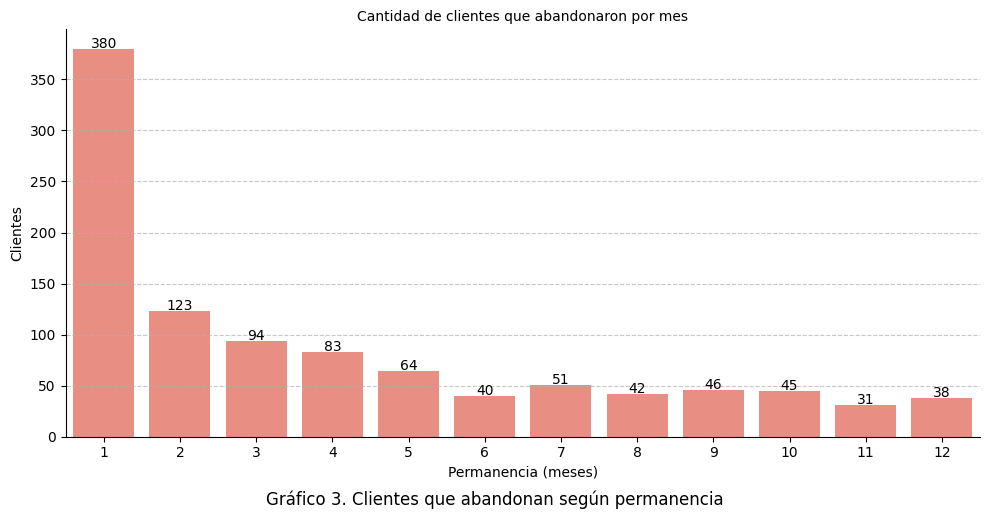

In [38]:
df = pd.read_csv('df_normalizado.csv')

# Filtramos solo clientes que desertaron (Churn = Yes) y tenure menor o igual a 12
df = df[(df['Churn'] == 'Yes') & (df['tenure'] <= 12)]

# Contamos clientes por tenure
df_tenure_churn = df['tenure'].value_counts().reset_index()
df_tenure_churn.columns = ['tenure', 'count']
df_tenure_churn = df_tenure_churn.sort_values(by='tenure')

# Creamos gráfico de barras verticales
plt.figure(figsize=(10, 5))
sns.barplot(data=df_tenure_churn, x='tenure', y='count', color='salmon')

# Títulos y etiquetas
plt.title("Cantidad de clientes que abandonaron por mes", fontsize=10)
plt.xlabel("Permanencia (meses)", fontsize=10)
plt.ylabel("Clientes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

# agregamos etiquetas con los valores sobre cada columna
for i, v in enumerate(df_tenure_churn['count']):
    plt.text(i, v + 1, str(v), ha='center', color='black', fontsize=10)

plt.figtext(0.5, -0.02, 'Gráfico 3. Clientes que abandonan según permanencia', ha='center', fontsize=12)

plt.savefig('graf_03_abandonos_por_mes.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


In [39]:
# generamos un dataframe agrupando por tenure y churn contando los registros de cada combinación
df_tenure = df_normalizado.groupby(['tenure', 'Churn']).size().reset_index(name='count')

In [40]:
# Ordenamos por tenure ascendente y churn descendente
df_tenure = df_tenure.sort_values(['tenure', 'Churn'], ascending=[True, False]).copy()

# Calculamos suma acumulada descendente (sumatoria de count para tenure ≥ actual)
df_tenure['sum_ge_tenure'] = df_tenure['count'][::-1].cumsum()[::-1]+11 # sumo 11 que son los tenure 0 y son parte del totala acumulado a partir del tenuer 1

# Calculamos porcentaje que representa cada count respecto a la sumatoria de tenure ≥ actual
df_tenure['percent_ge_tenure'] = (df_tenure['count'] / df_tenure['sum_ge_tenure']) * 100


In [41]:
# generamos df_tenure_churn con los registros que tienen churn=Yes
df_tenure_churn = df_tenure[df_tenure['Churn'] == 'Yes'].copy()

# calculamos el porcentaje count respecto del total general de 7043
df_tenure_churn['percent_total'] = (df_tenure_churn['count'] / 7043) * 100

# calculamos el porcentaje acumulado para cada tenure
df_tenure_churn['percent_acumulado'] = df_tenure_churn['percent_total'].cumsum()

# guardamos df_tenure_churn como archivo csv
df_tenure_churn.to_csv('df_tenure_churn.csv', index=False)

# filtramos para dejar los tenure menores o iguales a 10
df_tenure_churn = df_tenure_churn[df_tenure_churn['tenure'] <= 10]

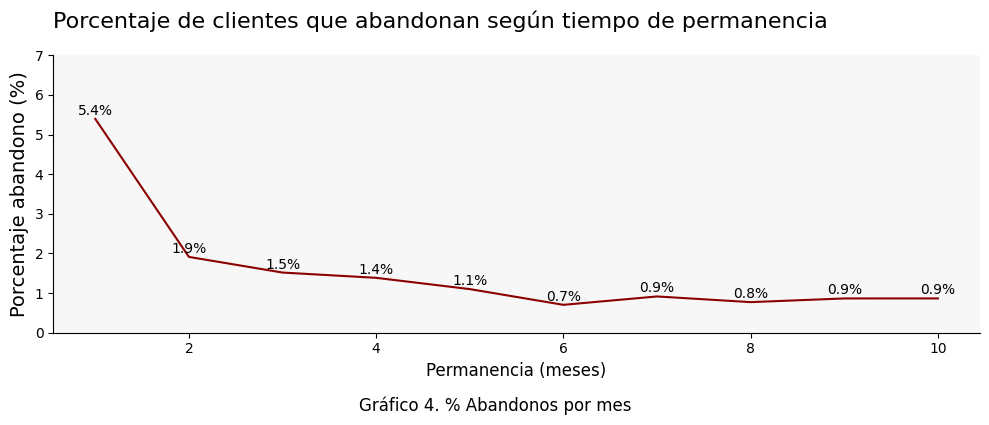

In [42]:
# Creamos figura y ejes
fig, ax = plt.subplots(figsize=(10, 4))

# Fondo gris claro solo en el área del gráfico
ax.set_facecolor('#f7f7f7')

# Dibujamos la línea
ax.plot(
    df_tenure_churn['tenure'],
    df_tenure_churn['percent_ge_tenure'],
    color='darkred'
)
ax.set_ylim(0, 7)

# Añadimos etiquetas de valor
for x, y in zip(df_tenure_churn['tenure'], df_tenure_churn['percent_ge_tenure']):
    plt.text(
        x, y + 0.1,               # Ligeramente encima del punto
        f"{y:.1f}%",               # Formato con un decimal
        ha='center',
        color='black',
        fontsize=10
    )

# agregamos leyenda "Gráfico 7. Abandonos por mes" debajo del gráfico
plt.figtext(0.5, -0.04, 'Gráfico 4. % Abandonos por mes', ha='center', fontsize=12)

# agregamos etiquetas
ax.set_title('Porcentaje de clientes que abandonan según tiempo de permanencia',loc='left',fontsize=16,pad=20)
ax.set_xlabel('Permanencia (meses)',fontsize=12)
ax.set_ylabel('Porcentaje abandono (%)',fontsize=14)
sns.despine(top=True, right=True)

# Ajustamos diseño
plt.tight_layout()

plt.savefig('graf_04_abandonos_por_mes.png', dpi=300, bbox_inches='tight')

plt.show()

## **Análisis de la tasa de abandono temprano según características sociodemográficas y de servicios**

### **Análisis general considerando todas las características de los clientes**

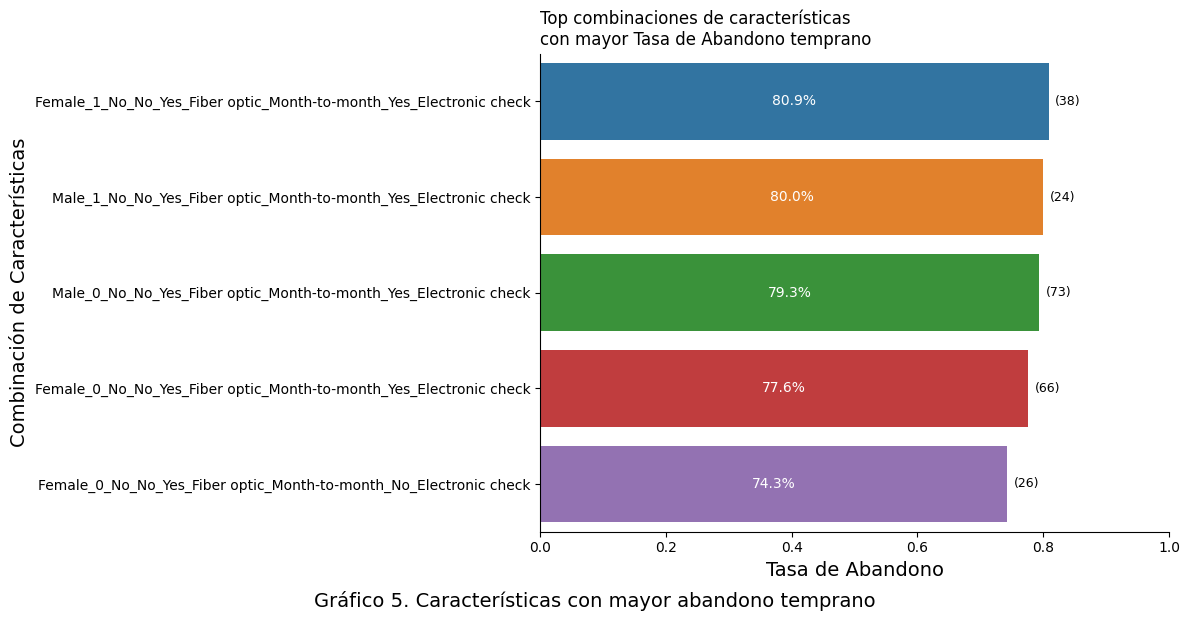

In [43]:
# trabajamos con el conjunto de datos normalizado
# Considerando que las tasas más altas de abandono se producen en los primeros 5 meses,
# podemos analizar las características de esos clientes.

df = pd.read_csv('df_normalizado.csv')

# Convertimos la columna Churn a tipo numérico para facilitar cálculos
df['Churn'] = (df['Churn'] == 'Yes').astype(int)

# filtramos df para los churn menor o igual a 6
df = df[df['tenure'] <= 6]

# Construimos una columna que combina las variables que vamos a analizar
# Aquí usamos variables las sociodemográficas personales y las de servicios contratados
df['combo'] = (
    df['gender'].astype(str) + '_' +
    df['SeniorCitizen'].astype(str) + '_' +
    df['Partner'].astype(str) + '_' +
    df['Dependents'].astype(str) + '_' +
    df['PhoneService'].astype(str) + '_' +
    df['InternetService'].astype(str) + '_' +
    df['Contract'].astype(str) + '_' +
    df['PaperlessBilling'].astype(str) + '_' +
    df['PaymentMethod'].astype(str)
)

# Agrupamos por la combinación y calculamos:
# - La tasa media de Churn (mean del 1/0) para cada combinación
# - La cantidad de clientes (count) para cada combinación
summary = df.groupby('combo').agg(churn_rate=('Churn', 'mean'), count=('Churn', 'sum')).reset_index()

# Filtramos solo combinaciones con un mínimo de 20 clientes para que sean representativas
summary_filtered = summary[summary['count'] >= 20]

# ordenamos de mayor a menor los primeros 10 con la tasa más alta de churn
top_10 = summary_filtered.sort_values('churn_rate', ascending=False).head(16)

# Graficamos
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=top_10, x='churn_rate', y='combo',
    hue='combo', dodge=False, legend=False

)
plt.title('Top combinaciones de características \ncon mayor Tasa de Abandono temprano',loc='left')
plt.xlabel('Tasa de Abandono',fontsize=14)
plt.ylabel('Combinación de Características',fontsize=14)
plt.xlim(0,1)

# Añadimos las etiquetas con el conteo de clientes
for i, (rate, cnt) in enumerate(zip(top_10['churn_rate'], top_10['count'])):
    ax.text(
        rate + 0.01,  # desplazamiento a la derecha
        i,            # La posición vertical es el índice
        f'({cnt})',   # Mostramos el conteo entre paréntesis
        va='center', color='black', fontsize=9
    )

# añadimos las etiquetas con el porcentaje en el centro de la barra horizontal
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width*100:.1f}%', (x + width/2, y + height/2), ha='center', va='center',color='white')

plt.figtext(0.5, -0.02, 'Gráfico 5. Características con mayor abandono temprano', ha='center', fontsize=14)

plt.tight_layout()

# quitamos el margen derecho y superior del área del gráfico
sns.despine(top=True, right=True)

# guardamos gráfico como imagen png
plt.savefig('graf_05_top_combos_general.png', dpi=300, bbox_inches='tight')

plt.show()

In [44]:
# El gráfico anterior nos muestra que la mayor tasa de abandono la tienen:
# Gender = Male y Female
# Senior = 1(Yes) 0 (No)
# Partner = No
# Dependents = No
# PhoneService = Yes
# InternetService = Fiber optic
# Contract = Month-to-month
# PaperlessBilling = Yes
# PaymentMethod = Electronic check

### **Análisis de la tasa de abandono según características sociodemográficas personales**

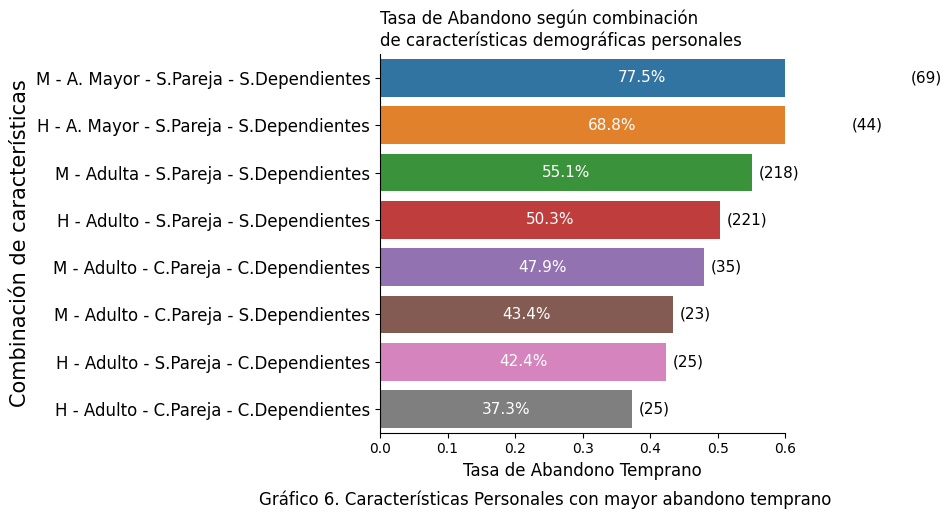

In [45]:
# analizamos las combinaciones sociodemográficas personales con mayor tasa de churn
# Aquí usamos variables sociodemográficas gender, SeniorCitizen, Partner y Dependents
df = pd.read_csv('df_normalizado.csv')
df['Churn'] = (df['Churn'] == 'Yes').astype(int)

# filtramos df para los churn menor o igual a 5
df = df[df['tenure'] <= 5]

df['combo'] = (
    df['gender'].astype(str) + '_' +
    df['SeniorCitizen'].astype(str) + '_' +
    df['Partner'].astype(str) + '_' +
    df['Dependents'].astype(str)
)

# Agrupamos por la combinación y calculamos:
# - La tasa media de Churn (mean del 1/0)
# - La cantidad de clientes (count)
summary = df.groupby('combo').agg(
    churn_rate=('Churn', 'mean'),
    count=('Churn', 'size'),
    no_vigentes=('Churn', 'sum')
).reset_index()

# Filtramos solo combinaciones con un mínimo de 50 clientes para que sean representativas
summary_filtered = summary[summary['count'] >= 50]

# y ordenamos de mayor a menor
top_10 = summary_filtered.sort_values('churn_rate', ascending=False).head(8)

# renombramos combinación de características para mejor presentación del gráfico
top_10['combo'] = top_10['combo'].replace({'Female_1_No_No': 'M - A. Mayor - S.Pareja - S.Dependientes'})
top_10['combo'] = top_10['combo'].replace({'Male_1_No_No': 'H - A. Mayor - S.Pareja - S.Dependientes'})
top_10['combo'] = top_10['combo'].replace({'Female_0_No_No': 'M - Adulta - S.Pareja - S.Dependientes'})
top_10['combo'] = top_10['combo'].replace({'Male_0_No_No': 'H - Adulto - S.Pareja - S.Dependientes'})
top_10['combo'] = top_10['combo'].replace({'Female_1_No_Yes': 'M - A. Mayor - S.Pareja - C.Dependientes'})
top_10['combo'] = top_10['combo'].replace({'Male_1_No_Yes': 'H - A. Mayor - S.Pareja - C.Dependientes'})
top_10['combo'] = top_10['combo'].replace({'Female_0_No_Yes': 'M - Adulta - S.Pareja - C.Dependientes'})
top_10['combo'] = top_10['combo'].replace({'Male_0_No_Yes': 'H - Adulto - S.Pareja - C.Dependientes'})
top_10['combo'] = top_10['combo'].replace({'Male_1_Yes_No': 'H - A. Mayor - C.Pareja - S.Dependientes'})
top_10['combo'] = top_10['combo'].replace({'Female_1_Yes_No': 'M - A. Mayor - C.Pareja - S.Dependientes'})
top_10['combo'] = top_10['combo'].replace({'Female_0_No_Yes': 'M - Adulta - S.Pareja - C.Dependientes'})
top_10['combo'] = top_10['combo'].replace({'Male_0_Yes_No': 'H - Adulto - C.Pareja - S.Dependientes'})
top_10['combo'] = top_10['combo'].replace({'Female_0_Yes_No': 'M - Adulto - C.Pareja - S.Dependientes'})
top_10['combo'] = top_10['combo'].replace({'Male_0_Yes_Yes': 'H - Adulto - C.Pareja - C.Dependientes'})
top_10['combo'] = top_10['combo'].replace({'Female_0_Yes_Yes': 'M - Adulto - C.Pareja - C.Dependientes'})

# graficamos
plt.figure(figsize=(11,5))
ax = sns.barplot(
    data=top_10, x='churn_rate', y='combo',
    hue='combo', dodge=False, legend=False
)
plt.title('Tasa de Abandono según combinación \nde características demográficas personales',fontsize=12,loc='left')
plt.xlabel('Tasa de Abandono Temprano',fontsize=12)
plt.ylabel('Combinación de características',fontsize=15)
plt.xlim(0,0.6)
plt.yticks(fontsize=12)

# Añadimos las etiquetas con el conteo de clientes
for i, (rate, cnt) in enumerate(zip(top_10['churn_rate'], top_10['no_vigentes'])):
    ax.text(
        rate + 0.01,  # Un pequeño desplazamiento a la derecha
        i,            # La posición vertical es el índice
        f'({cnt})',   # Mostrar el conteo entre paréntesis
        va='center', color='black', fontsize=11
    )

# añadimos las etiquetas con el porcentaje en el centro de la barra horizontal
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width*100:.1f}%',
     (x + width/2,
      y + height/2),
      ha='center',
      va='center',
      fontsize=11,
      color='white')

plt.figtext(0.5, -0.02, 'Gráfico 6. Características Personales con mayor abandono temprano', ha='center', fontsize=12)

plt.tight_layout()

# quitamos el margen derecho y superior del área del gráfico
sns.despine(top=True, right=True)

#guardamos el gráfico como imagen png
plt.savefig('graf_06_top_combos_personales.png', dpi=300, bbox_inches='tight')

# guardamos top_10 como archivo csv
top_10.to_csv('top_combos_personales.csv', index=False)

plt.show()

### **Análisis de la tasa de Abandono según servicios contratados**

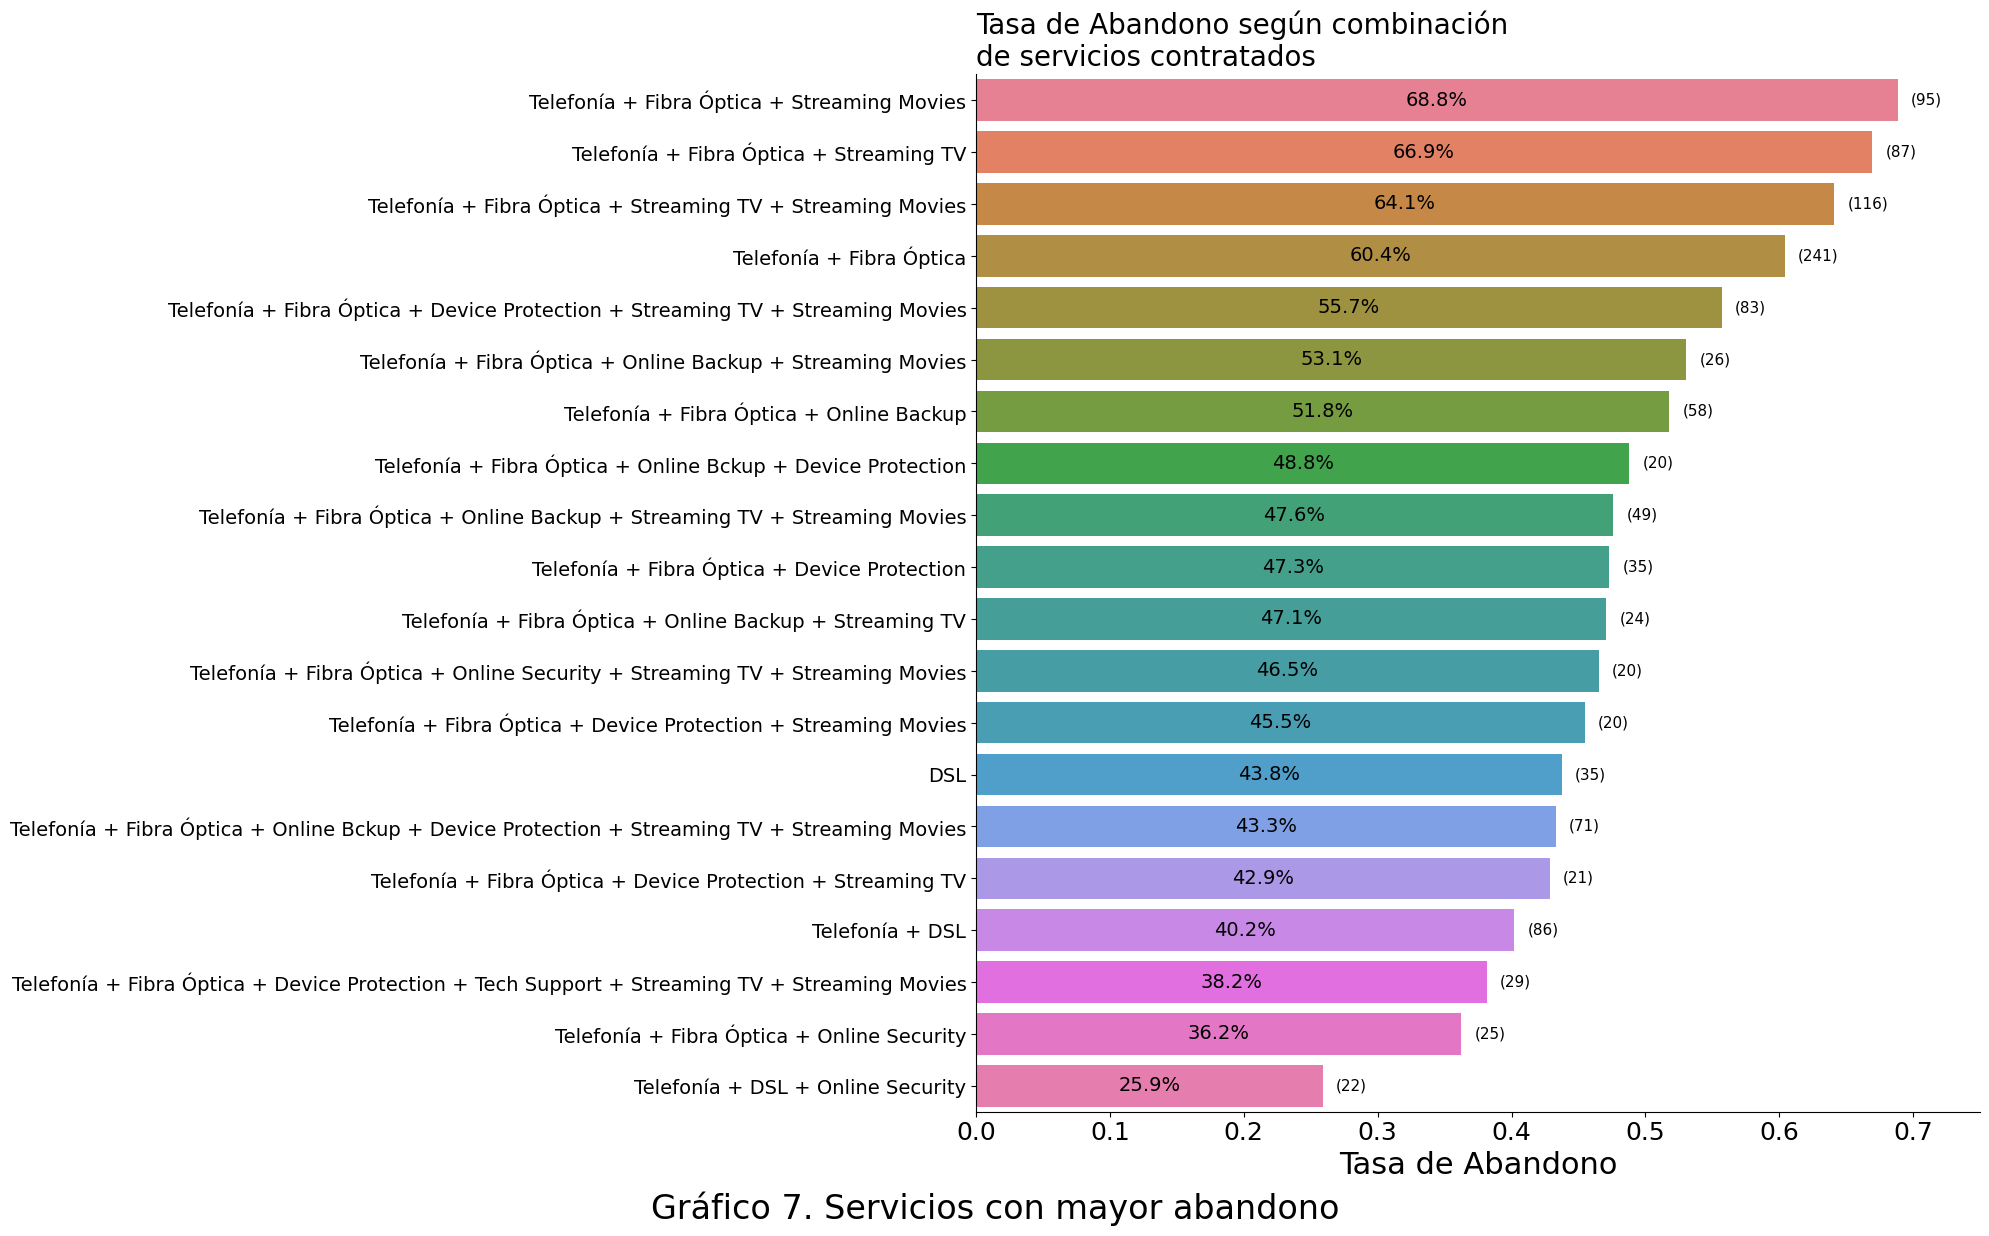

In [46]:
# analizamos las combinaciones de servicios con mayor tasa de churn
df = pd.read_csv('df_normalizado.csv')

df['Churn'] = (df['Churn'] == 'Yes').astype(int)

# filtramos df para los churn menor o igual a 5
# df = df[df['tenure'] <= 10]

df['combo'] = (
    df['PhoneService'].astype(str) + '_' +
    df['InternetService'].astype(str) + '_' +
    df['OnlineSecurity'].astype(str) + '_' +
    df['OnlineBackup'].astype(str) + '_' +
    df['DeviceProtection'].astype(str) + '_' +
    df['TechSupport'].astype(str) + '_' +
    df['StreamingTV'].astype(str) + '_' +
    df['StreamingMovies'].astype(str)
)

# Agrupamos por la combinación y calculamos:
# - La tasa media de Churn (mean del 1/0)
# - La cantidad de clientes (count)
summary = df.groupby('combo').agg(
    churn_rate=('Churn', 'mean'),
    count=('Churn', 'sum')
).reset_index()

# Filtramos solo combinaciones con un mínimo de 20 clientes para que sean representativas
summary_filtered = summary[summary['count'] >= 20]

# y ordenamos de mayor a menor
top_10 = summary_filtered.sort_values('churn_rate', ascending=False).head(20)

# renombramos combinación de características para mejor presentación del gráfico
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_No_No_No_No_No_Yes': 'Telefonía + Fibra Óptica + Streaming Movies'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_No_No_No_No_Yes_No': 'Telefonía + Fibra Óptica + Streaming TV'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_No_No_No_No_Yes_Yes': 'Telefonía + Fibra Óptica + Streaming TV + Streaming Movies'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_No_No_No_No_No_No': 'Telefonía + Fibra Óptica'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_No_No_Yes_No_Yes_Yes': 'Telefonía + Fibra Óptica + Device Protection + Streaming TV + Streaming Movies'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_No_Yes_No_No_No_No': 'Telefonía + Fibra Óptica + Online Backup'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_No_Yes_No_No_Yes_Yes': 'Telefonía + Fibra Óptica + Online Backup + Streaming TV + Streaming Movies'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_No_No_Yes_No_No_No': 'Telefonía + Fibra Óptica + Device Protection'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_No_Yes_No_No_Yes_No': 'Telefonía + Fibra Óptica + Online Backup + Streaming TV'})
top_10['combo'] = top_10['combo'].replace({'No_DSL_No_No_No_No_No_No': 'DSL'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_No_Yes_Yes_No_Yes_Yes': 'Telefonía + Fibra Óptica + Online Bckup + Device Protection + Streaming TV + Streaming Movies'})
top_10['combo'] = top_10['combo'].replace({'Yes_DSL_No_No_No_No_No_No': 'Telefonía + DSL'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_No_No_Yes_Yes_Yes_Yes': 'Telefonía + Fibra Óptica + Device Protection + Tech Support + Streaming TV + Streaming Movies'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_Yes_No_No_No_No_No': 'Telefonía + Fibra Óptica + Online Security'})
top_10['combo'] = top_10['combo'].replace({'Yes_DSL_Yes_No_No_No_No_No': 'Telefonía + DSL + Online Security'})
top_10['combo'] = top_10['combo'].replace({'Yes_DSL_No_No_No_Yes_No_No': 'Telefonía + DSL + Tech Support'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_No_Yes_Yes_Yes_Yes_Yes': 'Telefonía + Fibra Óptica + Online Bckup + Device Protection + Tech Support + Streaming TV + Streaming Movies'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_Yes_No_Yes_Yes_Yes_Yes': 'Telefonía + Fibra Óptica + Online Security + Device Protection + Tech Support + Streaming TV + Streaming Movies'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_No_Yes_No_Yes_Yes_Yes': 'Telefonía + Fibra Óptica + Online Backup + Tech Support + Streaming TV + Streaming Movies'})
top_10['combo'] = top_10['combo'].replace({'Yes_DSL_Yes_Yes_No_No_No_No': 'Telefonía + DSL + Online Security + Online Backup'})

top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_No_Yes_No_No_No_Yes': 'Telefonía + Fibra Óptica + Online Backup + Streaming Movies'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_No_Yes_Yes_No_No_No': 'Telefonía + Fibra Óptica + Online Bckup + Device Protection'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_Yes_No_No_No_Yes_Yes': 'Telefonía + Fibra Óptica + Online Security + Streaming TV + Streaming Movies'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_No_No_Yes_No_No_Yes': 'Telefonía + Fibra Óptica + Device Protection + Streaming Movies'})
top_10['combo'] = top_10['combo'].replace({'Yes_Fiber optic_No_No_Yes_No_Yes_No': 'Telefonía + Fibra Óptica + Device Protection + Streaming TV'})

# graficamos
plt.figure(figsize=(20,12))
ax = sns.barplot(
    data=top_10, x='churn_rate', y='combo',
    hue='combo', dodge=False, legend=False
)
plt.title('Tasa de Abandono según combinación \nde servicios contratados',fontsize=20,loc='left')
plt.xlabel('Tasa de Abandono',fontsize=22)
plt.ylabel('')
plt.xlim(0,0.75)
plt.yticks(fontsize=14)
plt.xticks(fontsize=18)

# Añadimos las etiquetas con el conteo de clientes
for i, (rate, cnt) in enumerate(zip(top_10['churn_rate'], top_10['count'])):
    ax.text(
        rate + 0.01,  # Un pequeño desplazamiento a la derecha
        i,            # La posición vertical es el índice
        f'({cnt})',   # Mostrar el conteo entre paréntesis
        va='center', color='black', fontsize=11
    )

# añadimos las etiquetas con el porcentaje en el centro de la barra horizontal
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width*100:.1f}%', (x + width/2, y + height/2), ha='center', va='center',fontsize=14)

plt.figtext(0.5, -0.02, 'Gráfico 7. Servicios con mayor abandono', ha='center', fontsize=24)

plt.tight_layout()

sns.despine(top=True, right=True)

plt.savefig('graf_07_top_combos_servicios.png', dpi=300, bbox_inches='tight')

top_10.to_csv('top_combos_servicios.csv', index=False)

plt.show()

### **Análisis de la tasa de abandono según tipo de contrato**

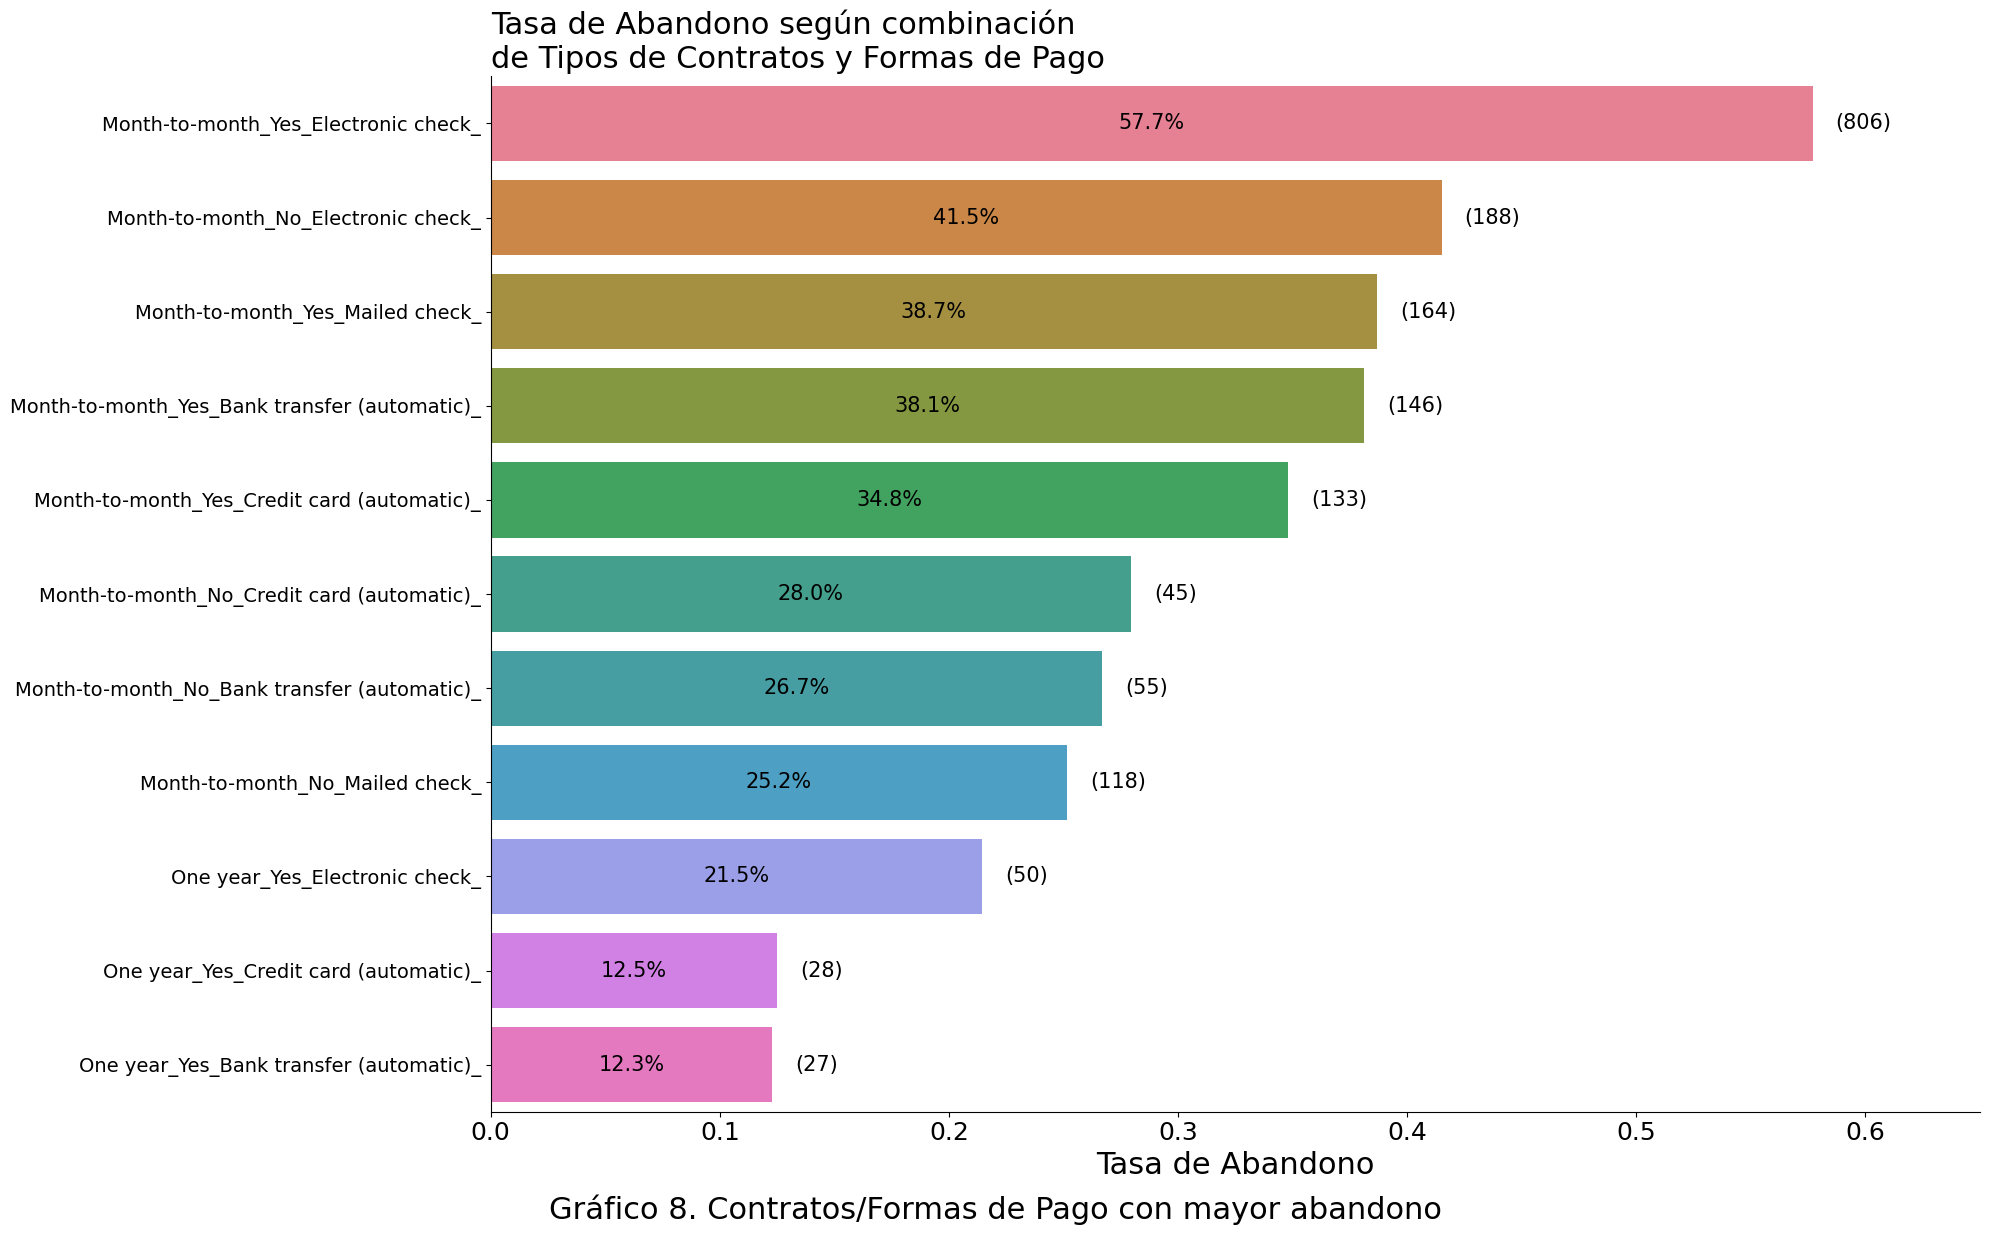

In [47]:
# analizamos las combinaciones según el tipo de contrato, tipo de facturación y método de pago

df = pd.read_csv('TelecomX_Data_normalizado.csv')

df['Churn'] = (df['Churn'] == 'Yes').astype(int)

df['combo'] = (
    df['Contract'].astype(str) + '_' +
    df['PaperlessBilling'].astype(str) + '_' +
    df['PaymentMethod'].astype(str) + '_'
)

# Agrupamos por la combinación y calculamos:
# - La tasa media de Churn (mean del 1/0)
# - La cantidad de clientes (count)
summary = df.groupby('combo').agg(
    churn_rate=('Churn', 'mean'),
    count=('Churn', 'sum')
).reset_index()

# Filtramos solo combinaciones con un mínimo de 20 clientes para que sean representativas
summary_filtered = summary[summary['count'] >= 20]

# ordenamos de mayor a menor
top_10 = summary_filtered.sort_values('churn_rate', ascending=False).head(20)

# graficamos
plt.figure(figsize=(20,12))
ax = sns.barplot(
    data=top_10, x='churn_rate', y='combo',
    hue='combo', dodge=False, legend=False
)
plt.title('Tasa de Abandono según combinación \nde Tipos de Contratos y Formas de Pago',fontsize=22,loc='left')
plt.xlabel('Tasa de Abandono',fontsize=22)
plt.ylabel('')
plt.xlim(0,0.65)
plt.yticks(fontsize=14)
plt.xticks(fontsize=18)

# Añadimos las etiquetas con el conteo de clientes
for i, (rate, cnt) in enumerate(zip(top_10['churn_rate'], top_10['count'])):
    ax.text(
        rate + 0.01,  # Un pequeño desplazamiento a la derecha
        i,            # La posición vertical es el índice
        f'({cnt})',   # Mostrar el conteo entre paréntesis
        va='center', color='black', fontsize=15
    )

# añadimos las etiquetas con el porcentaje en el centro de la barra horizontal
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width*100:.1f}%', (x + width/2, y + height/2), ha='center', va='center',fontsize=15)

sns.despine(top=True, right=True)

plt.figtext(0.5, -0.02, 'Gráfico 8. Contratos/Formas de Pago con mayor abandono', ha='center', fontsize=22)

plt.tight_layout()

plt.savefig('graf_08_top_combos_contratos.png', dpi=300, bbox_inches='tight')

plt.show()

## **Mapas de calor de diversas combinaciones**

In [48]:
df = pd.read_csv('df_normalizado.csv')
df['Churn'] = (df['Churn'] == 'Yes').astype(int)

# traducimos Famale por Mujer, Male por Hombre, Yes por Sí, Etc.
df['gender'] = df['gender'].replace({'Female': 'Mujer'})
df['gender'] = df['gender'].replace({'Male': 'Hombre'})
df['Partner'] = df['Partner'].replace({'Yes': 'Con Pareja'})
df['Partner'] = df['Partner'].replace({'No': 'Sin Pareja'})
df['Dependents'] = df['Dependents'].replace({'Yes': 'Con Dependientes'})
df['Dependents'] = df['Dependents'].replace({'No': 'Sin Dependientes'})
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Adulto Mayor'})
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'Adulto'})

df['PhoneService'] = df['PhoneService'].replace({'Yes': 'Con Telefonía'})
df['PhoneService'] = df['PhoneService'].replace({'No': 'Sin Telefonía'})
df['InternetService'] = df['InternetService'].replace({'Fiber optic': 'Fibra Óptica'})
df['InternetService'] = df['InternetService'].replace({'No': 'Sin Internet'})
df['InternetService'] = df['InternetService'].replace({'DSL': 'DSL'})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'Yes': 'Con Online Security'})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No': 'Sin Online Security'})
df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes': 'Con Online Backup'})
df['OnlineBackup'] = df['OnlineBackup'].replace({'No': 'Sin Online Backup'})
df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes': 'Con Device Protection'})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No': 'Sin Device Protection'})
df['TechSupport'] = df['TechSupport'].replace({'Yes': 'Con Tech Support'})
df['TechSupport'] = df['TechSupport'].replace({'No': 'Sin Tech Support'})
df['StreamingTV'] = df['StreamingTV'].replace({'Yes': 'Con Streaming TV'})
df['StreamingTV'] = df['StreamingTV'].replace({'No': 'Sin Streaming TV'})
df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes': 'Con Streaming Movies'})
df['StreamingMovies'] = df['StreamingMovies'].replace({'No': 'Sin Streaming Movies'})
df['Contract'] = df['Contract'].replace({'Month-to-month': 'Mensual'})
df['Contract'] = df['Contract'].replace({'One year': 'Anual'})
df['Contract'] = df['Contract'].replace({'Two year': 'Bi-anual'})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 'Factura Electrónica'})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'No': 'Factura Física'})
df['PaymentMethod'] = df['PaymentMethod'].replace({'Electronic check': 'Transferencia Electrónica'})
df['PaymentMethod'] = df['PaymentMethod'].replace({'Mailed check': 'Cheque por Correo'})
df['PaymentMethod'] = df['PaymentMethod'].replace({'Bank transfer (automatic)': 'Transferencia Bancaria'})
df['PaymentMethod'] = df['PaymentMethod'].replace({'Credit card (automatic)': 'Tarjeta de Crédito'})



### **Género vs Partner**

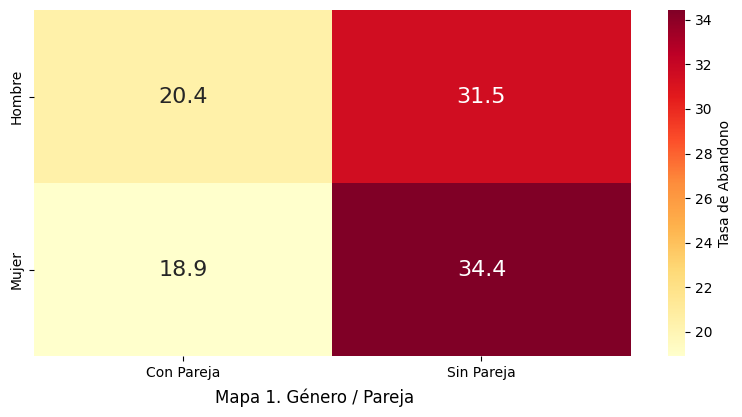

In [49]:
# Heatmap con la tasa de churn por género y pareja
heatmap_data = df.groupby(['gender', 'Partner'])['Churn'].mean().reset_index()

heatmap_pivot = heatmap_data.pivot(
    index='gender',
    columns='Partner',
    values='Churn'
)

heatmap_pivot_porcentaje = heatmap_pivot.apply(lambda x: x * 100)

plt.figure(figsize=(8,4))
sns.heatmap(
    heatmap_pivot_porcentaje,
    cmap='YlOrRd',
    annot=True,
    fmt='.1f',
    annot_kws={'fontsize': 16},
    cbar_kws={'label': 'Tasa de Abandono'}
)

plt.title('')
plt.ylabel('')
plt.xlabel('')

plt.figtext(0.4, -0.02, 'Mapa 1. Género / Pareja', ha='center', fontsize=12)

plt.tight_layout()

plt.savefig('map_01_heatmap_genero_pareja.png', dpi=300, bbox_inches='tight')

plt.show()


### **Género vs Dependents**

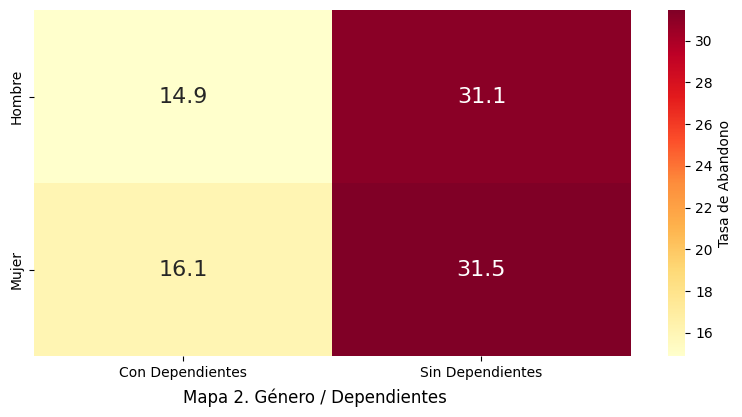

In [50]:
# Heatmap con la tasa de churn por género y dependientes
heatmap_data = df.groupby(['gender', 'Dependents'])['Churn'].mean().reset_index()

heatmap_pivot = heatmap_data.pivot(
    index='gender',
    columns='Dependents',
    values='Churn'
)

heatmap_pivot_porcentaje = heatmap_pivot.apply(lambda x: x * 100)

plt.figure(figsize=(8,4))
sns.heatmap(
    heatmap_pivot_porcentaje,
    cmap='YlOrRd',
    annot=True,
    fmt='.1f',
    annot_kws={'fontsize': 16},
    cbar_kws={'label': 'Tasa de Abandono'}
)

plt.title('')
plt.ylabel('')
plt.xlabel('')

plt.figtext(0.4, -0.02, 'Mapa 2. Género / Dependientes', ha='center', fontsize=12)

plt.tight_layout()

plt.savefig('map_02_heatmap_genero_dependientes.png', dpi=300, bbox_inches='tight')

plt.show()


### **Género vs Senior Citizen**

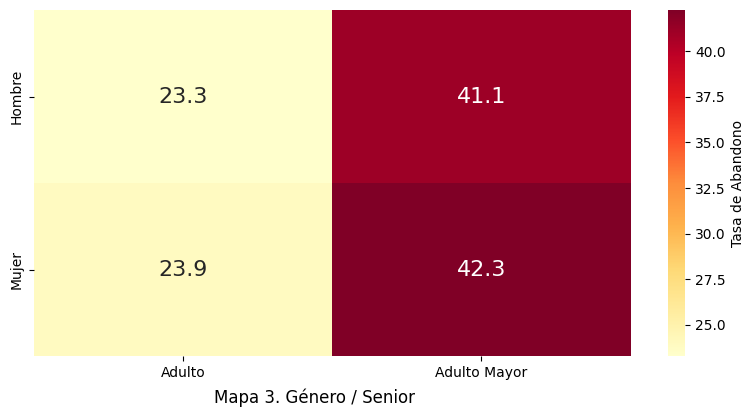

In [51]:
# Heatmap con la tasa de churn por género y senior citizen
heatmap_data = df.groupby(['gender', 'SeniorCitizen'])['Churn'].mean().reset_index()

heatmap_pivot = heatmap_data.pivot(
    index='gender',
    columns='SeniorCitizen',
    values='Churn'
)

heatmap_pivot_porcentaje = heatmap_pivot.apply(lambda x: x * 100)

plt.figure(figsize=(8,4))
sns.heatmap(
    heatmap_pivot_porcentaje,
    cmap='YlOrRd',
    annot=True,
    fmt='.1f',
    annot_kws={'fontsize': 16},
    cbar_kws={'label': 'Tasa de Abandono'}
)

plt.title('')
plt.ylabel('')
plt.xlabel('')
plt.figtext(0.4, -0.02, 'Mapa 3. Género / Senior', ha='center', fontsize=12)
plt.tight_layout()

plt.savefig('map_03_heatmap_genero_senior.png', dpi=300, bbox_inches='tight')

plt.show()


### **Gender vs InternetService**

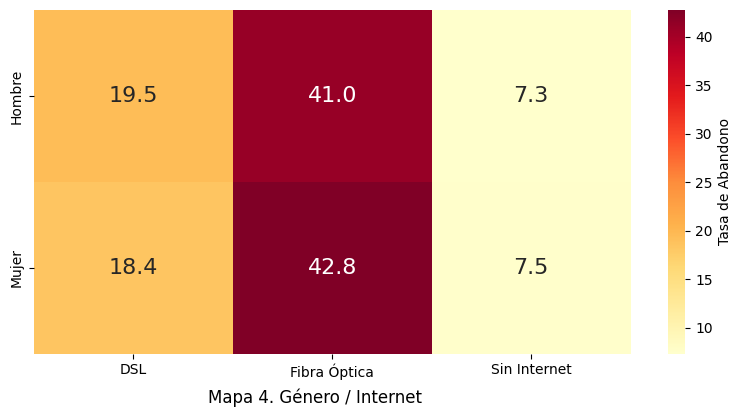

In [52]:
# Heatmap con la tasa de churn por género y servicio de internet
heatmap_data = df.groupby(['gender', 'InternetService'])['Churn'].mean().reset_index()

heatmap_pivot = heatmap_data.pivot(
    index='gender',
    columns='InternetService',
    values='Churn'
)

heatmap_pivot_porcentaje = heatmap_pivot.apply(lambda x: x * 100)

plt.figure(figsize=(8,4))
sns.heatmap(
    heatmap_pivot_porcentaje,
    cmap='YlOrRd',
    annot=True,
    fmt='.1f',
    annot_kws={'fontsize': 16},
    cbar_kws={'label': 'Tasa de Abandono'}
)

plt.title('')
plt.ylabel('')
plt.xlabel('')
plt.figtext(0.4, -0.02, 'Mapa 4. Género / Internet', ha='center', fontsize=12)
plt.tight_layout()

plt.savefig('map_04_heatmap_genero_internet.png', dpi=300, bbox_inches='tight')

plt.show()


### **Género vs Tipo de Contrato**

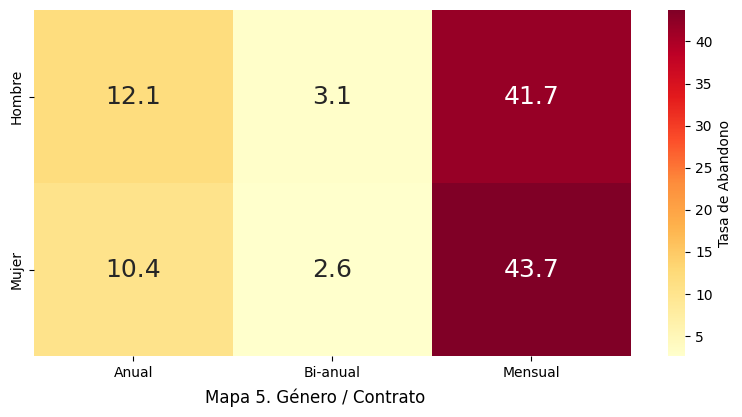

In [53]:
# Heatmap con la tasa de churn por género y tipo de contrato
heatmap_data = df.groupby(['gender', 'Contract'])['Churn'].mean().reset_index()

heatmap_pivot = heatmap_data.pivot(
    index='gender',
    columns='Contract',
    values='Churn'
)

heatmap_pivot_porcentaje = heatmap_pivot.apply(lambda x: x * 100)

plt.figure(figsize=(8,4))
sns.heatmap(
    heatmap_pivot_porcentaje,
    cmap='YlOrRd',
    annot=True,
    fmt='.1f',
    annot_kws={'fontsize': 18},
    cbar_kws={'label': 'Tasa de Abandono'}
)

plt.title('')
plt.ylabel('')
plt.xlabel('')
plt.figtext(0.4, -0.02, 'Mapa 5. Género / Contrato', ha='center', fontsize=12)

plt.tight_layout()

plt.savefig('map_05_heatmap_genero_contrato.png', dpi=300, bbox_inches='tight')

plt.show()


### **Partner vs Dependents**

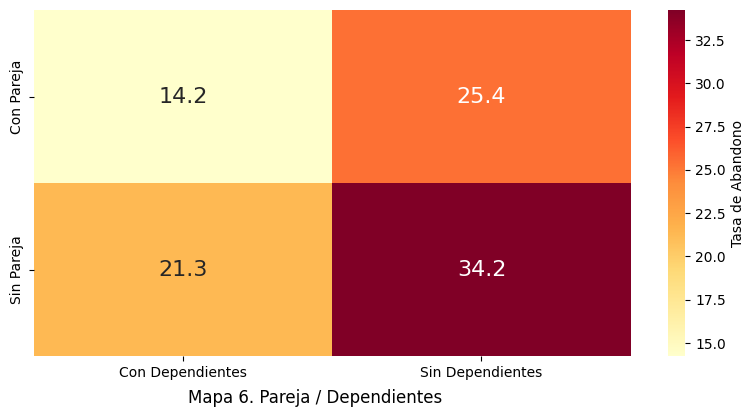

In [54]:
# Heatmap con la tasa de churn por pareja y dependientes
heatmap_data = df.groupby(['Partner', 'Dependents'])['Churn'].mean().reset_index()

heatmap_pivot = heatmap_data.pivot(
    index='Partner',
    columns='Dependents',
    values='Churn'
)

heatmap_pivot_porcentaje = heatmap_pivot.apply(lambda x: x * 100)

plt.figure(figsize=(8,4))
sns.heatmap(
    heatmap_pivot_porcentaje,
    cmap='YlOrRd',
    annot=True,
    fmt='.1f',
    annot_kws={'fontsize': 16},
    cbar_kws={'label': 'Tasa de Abandono'}
)

plt.title('')
plt.ylabel('')
plt.xlabel('')

plt.figtext(0.4, -0.02, 'Mapa 6. Pareja / Dependientes', ha='center', fontsize=12)

plt.tight_layout()

plt.savefig('map_06_heatmap_partner_dependientes.png', dpi=300, bbox_inches='tight')

plt.show()


### **Senior Citizen vs Partner**

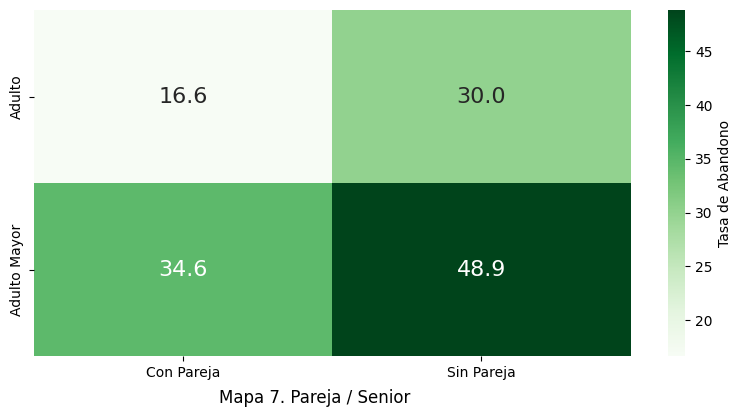

In [55]:
# Tasa de Churn por Senior Citizen y pareja
heatmap_sp = df.groupby(['SeniorCitizen', 'Partner'])['Churn'].mean().reset_index()

heatmap_sp_pivot = heatmap_sp.pivot(
    index='SeniorCitizen',
    columns='Partner',
    values='Churn'
)
heatmap_pivot_porcentaje = heatmap_sp_pivot.apply(lambda x: x * 100)

plt.figure(figsize=(8,4))
sns.heatmap(
    heatmap_pivot_porcentaje,
    cmap='Greens',
    annot=True,
    fmt='.1f',
    annot_kws={'fontsize': 16},
    cbar_kws={'label': 'Tasa de Abandono'}
)
plt.title('')
plt.ylabel('')
plt.xlabel('')

plt.figtext(0.4, -0.02, 'Mapa 7. Pareja / Senior', ha='center', fontsize=12)

plt.tight_layout()

plt.savefig('map_07_heatmap_senior_pareja.png', dpi=300, bbox_inches='tight')

plt.show()


### **Con Pareja vs Servicios de Internet**

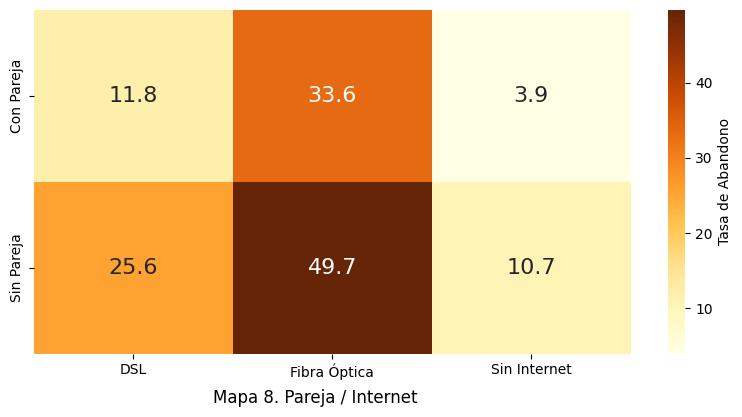

In [56]:
# Tasa de Churn por pareja y servicios de internet
heatmap_pi = df.groupby(['Partner', 'InternetService'])['Churn'].mean().reset_index()

heatmap_pi_pivot = heatmap_pi.pivot(
    index='Partner',
    columns='InternetService',
    values='Churn'
)
heatmap_pivot_porcentaje = heatmap_pi_pivot.apply(lambda x: x * 100)

plt.figure(figsize=(8,4))
sns.heatmap(
    heatmap_pivot_porcentaje,
    cmap='YlOrBr',
    annot=True,
    fmt='.1f',
    annot_kws={'fontsize': 16},
    cbar_kws={'label': 'Tasa de Abandono'}
)
plt.title('')
plt.ylabel('')
plt.xlabel('')

plt.figtext(0.4, -0.02, 'Mapa 8. Pareja / Internet', ha='center', fontsize=12)

plt.tight_layout()

plt.savefig('mapa_08_heatmap_pareja_internet.png', dpi=300, bbox_inches='tight')

plt.show()


### **Con Pareja vs Tipo de Contrato**

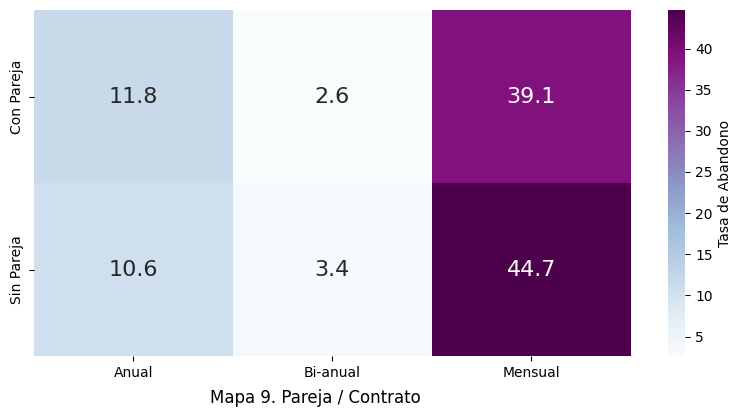

In [57]:
# Tasa de Churn por pareja y tipo de contrato
heatmap_pc2 = df.groupby(['Partner', 'Contract'])['Churn'].mean().reset_index()

heatmap_pc2_pivot = heatmap_pc2.pivot(
    index='Partner',
    columns='Contract',
    values='Churn'
)
heatmap_pivot_porcentaje = heatmap_pc2_pivot.apply(lambda x: x * 100)

plt.figure(figsize=(8,4))
sns.heatmap(
    heatmap_pivot_porcentaje,
    cmap='BuPu',
    annot=True,
    fmt='.1f',
    annot_kws={'fontsize': 16},
    cbar_kws={'label': 'Tasa de Abandono'}
)
plt.title('')
plt.ylabel('')
plt.xlabel('')

plt.figtext(0.4, -0.02, 'Mapa 9. Pareja / Contrato', ha='center', fontsize=12)

plt.tight_layout()

plt.savefig('mapa_09_heatmap_pareja_contrato.png', dpi=300, bbox_inches='tight')

plt.show()


### **Tipo de Contrato / Servicios de Internet**

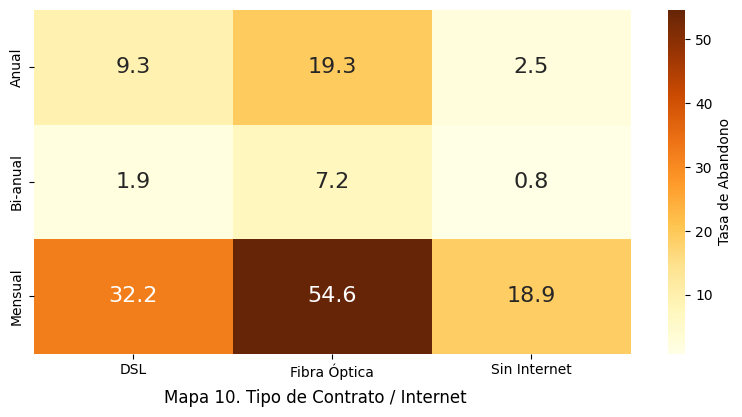

In [58]:
# Tasa de Churn por tipo de contrato y servicios de internet
heatmap = df.groupby(['Contract', 'InternetService'])['Churn'].mean().reset_index()

heatmap_pivot = heatmap.pivot(
    index='Contract',
    columns='InternetService',
    values='Churn'
)
heatmap_pivot_porcentaje = heatmap_pivot.apply(lambda x: x * 100)

plt.figure(figsize=(8,4))
sns.heatmap(
    heatmap_pivot_porcentaje,
    cmap='YlOrBr',
    annot=True,
    fmt='.1f',
    annot_kws={'fontsize': 16},
    cbar_kws={'label': 'Tasa de Abandono'}
)
plt.title('')
plt.ylabel('')
plt.xlabel('')

plt.figtext(0.4, -0.02, 'Mapa 10. Tipo de Contrato / Internet', ha='center', fontsize=12)

plt.tight_layout()

plt.savefig('mapa_10_heatmap_contrato_internet.png', dpi=300, bbox_inches='tight')

plt.show()


## **Análisis de abandono según cargos mensuales**

In [59]:
# generamos un dataframe agrupando por tenure y churn contando los registros de cada combinación
df_tenure = df_normalizado.groupby(['tenure', 'Churn']).size().reset_index(name='count')
df_tenure

tenure Churn  count
0         0    No     11
1         1    No    233
2         1   Yes    380
3         2    No    115
4         2   Yes    123
..      ...   ...    ...
140      70   Yes     11
141      71    No    164
142      71   Yes      6
143      72    No    356
144      72   Yes      6

[145 rows x 3 columns]

In [60]:
# Exploración de correlaciones

# Cargamos dataset
df = pd.read_csv('df_normalizado.csv')

# Convertimos columna Churn a binaria
df['Churn_bin'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Creamos variable: número de servicios contratados
servicios = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Contamos cuántos servicios tiene cada cliente (valor distinto de 'No')
df['num_servicios'] = df[servicios].apply(lambda row: sum(val != 'No' and val != 'No internet service' for val in row), axis=1)


In [61]:
# Seleccionarmos variables numéricas relevantes
variables_corr = [
    'tenure', 'Charges.Monthly', 'Charges.Total',
    'num_servicios','Churn_bin'
]

# Calcular matriz de correlación
corr_matrix = df[variables_corr].corr()

corr_matrix.round(2)

tenure  Charges.Monthly  Charges.Total  num_servicios  \
tenure             1.00             0.25           0.83           0.47   
Charges.Monthly    0.25             1.00           0.65           0.82   
Charges.Total      0.83             0.65           1.00           0.76   
num_servicios      0.47             0.82           0.76           1.00   
Churn_bin         -0.35             0.19          -0.20          -0.02   

                 Churn_bin  
tenure               -0.35  
Charges.Monthly       0.19  
Charges.Total        -0.20  
num_servicios        -0.02  
Churn_bin             1.00

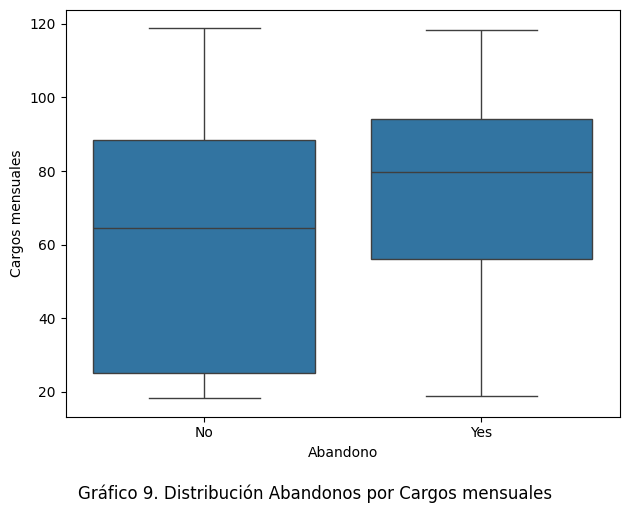

In [62]:
sns.boxplot(x='Churn', y='Charges.Monthly', data=df)

# cambiamos los títulos de los ejes del bloxplot
plt.xlabel('Abandono')
plt.ylabel('Cargos mensuales')
plt.title('')
plt.tight_layout()

# Pie de gráfico (leyenda textual debajo)
plt.figtext(
    0.5, -0.05,               # posición: centro horizontal, bajo vertical
    'Gráfico 9. Distribución Abandonos por Cargos mensuales',        # texto a mostrar
    ha='center', fontsize=12
)
plt.savefig('graf_09_boxplot_charges_monthly.png', dpi=300, bbox_inches='tight')

plt.show()

# guardamos imagen como archivo png


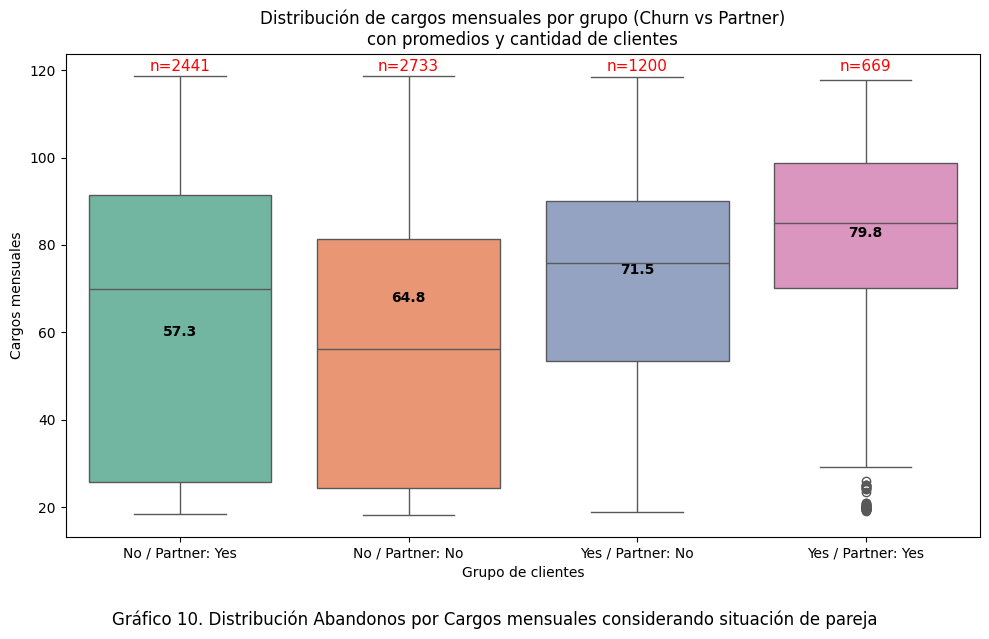

In [63]:
# Cargamos datos
df = pd.read_csv("df_normalizado.csv")

# Creamos columna de grupo combinando Churn y Partner
df['Grupo'] = df['Churn'] + ' / Partner: ' + df['Partner']

# Calculamos promedios y conteos
mean_values = df.groupby('Grupo')['Charges.Monthly'].mean()
counts = df['Grupo'].value_counts()

# Creamos el boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=df,
    x='Grupo',
    y='Charges.Monthly',
    hue='Grupo',
    palette='Set2',
    dodge=False,
    legend=False
)

# Agregamos promedio y cantidad de clientes
for i, grupo in enumerate(mean_values.index):
    promedio = mean_values[grupo]
    cantidad = counts[grupo]

    # Mostramos promedio
    ax.text(i, promedio + 2, f'{promedio:.1f}', ha='center', color='black', fontweight='bold')

    # Mostramos cantidad de clientes
    ax.text(i, df['Charges.Monthly'].max() + 1, f'n={cantidad}', ha='center', color='red', fontsize=11)

# Etiquetas
plt.xlabel('Grupo de clientes')
plt.ylabel('Cargos mensuales')
plt.title('Distribución de cargos mensuales por grupo (Churn vs Partner)\ncon promedios y cantidad de clientes')

plt.tight_layout()

# Pie de gráfico
plt.figtext(
    0.5, -0.05,               # posición: centro horizontal, bajo vertical
    'Gráfico 10. Distribución Abandonos por Cargos mensuales considerando situación de pareja',        # texto a mostrar
    ha='center', fontsize=12
)

# gurdamos imagen como archivo png
plt.savefig('graf_10_boxplot_charges_monthly_partner.png', dpi=300, bbox_inches='tight')

plt.show()


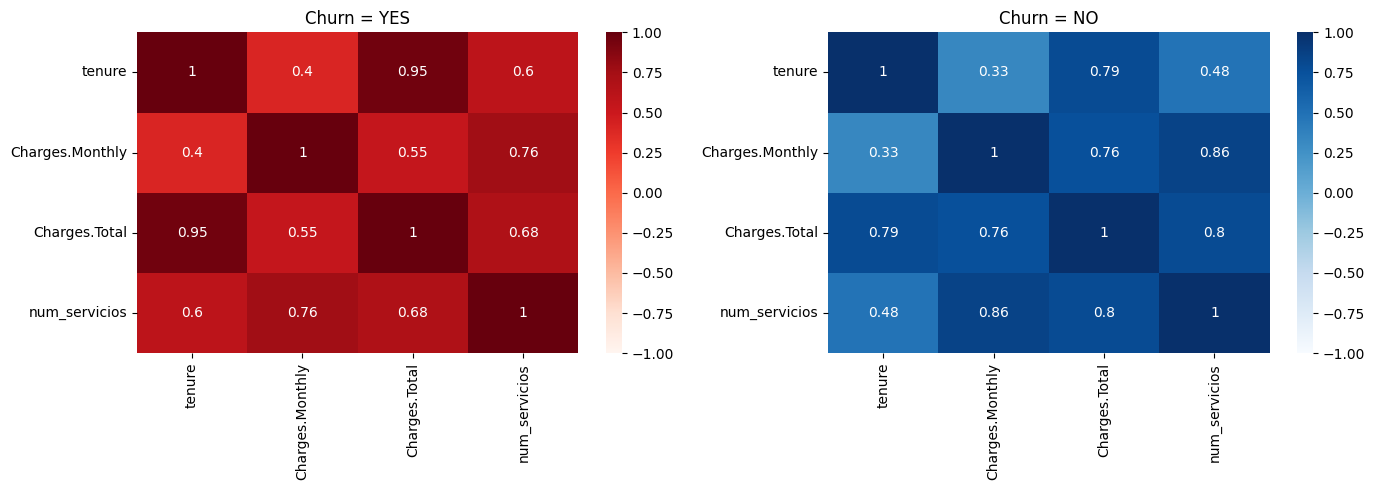

In [64]:
df = pd.read_csv('df_normalizado.csv')

# Creamos columna binaria para churn
df['Churn_bin'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Creamos columna con cantidad de servicios contratados
servicios = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

df['num_servicios'] = df[servicios].apply(lambda row: sum(val != 'No' and val != 'No internet service' for val in row), axis=1)

# Seleccionamos variables numéricas
vars_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'num_servicios']

# Separamos DataFrames
df_yes = df[df['Churn'] == 'Yes']
df_no = df[df['Churn'] == 'No']

# Calculamos matrices de correlación
corr_yes = df_yes[vars_numericas].corr()
corr_no = df_no[vars_numericas].corr()

# Mostramos lado a lado
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
sns.heatmap(corr_yes, annot=True, cmap='Reds', vmin=-1, vmax=1)
plt.title('Churn = YES')

plt.subplot(1, 2, 2)
sns.heatmap(corr_no, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Churn = NO')

plt.tight_layout()
plt.show()


#📄**Informe Final Análisis de Deserción de Clientes Telecom X**

## **Introducción**



---


Telecom X, una empresa de servicios de telecomunicaciones, está enfrentando una alta tasa de pérdida de clientes.


---


Telecom X nos ha entregado un archivo con información de sus clientes durante 72 meses (seis años).


---


Según la información entregada, la cartera total de clientes ha llegado a más de 7000, pero ha perdido más de 1800 de ellos, lo que supera el 25%.


---


Esta situación requiere ser analizada en sus causas para tomar las medidas correctivas apropiadas.


---




##**Objetivos del análisis**



---



*   **Identificar combinaciones de variables socio-demográficas que influyen mas/menos en la deserción de clientes**.
*   **Generar visualizaciones que permitan interpretar dichas interacciones.**
*   **Explorar interaccción entre variables más relevantes.**

---



##**Limpieza y tratamiento de datos**

### **Extracción de datos**



---



*   La información de clientes está contenida en el archivo TelecomX_Data.json
*   Este archivo tiene 7267 filas y 6 columnas, todas de tipo object

```
#   Column      Non-Null Count  Dtype
---  ------      --------------  -----
0   customerID  7267 non-null   object
1   Churn       7267 non-null   object
2   customer    7267 non-null   object
3   phone       7267 non-null   object
4   internet    7267 non-null   object
5   account     7267 non-null   object
```


### **Expansión de las columans diccionario**



---


Al expandir las columnas del tipo diccionario obtenemos un dataframe con 7267 filas y 21 columnas

```
#   Column            Non-Null Count  Dtype
---  ------            --------------  -----
0   customerID        7267 non-null   object
1   Churn             7267 non-null   object
2   gender            7267 non-null   object
3   SeniorCitizen     7267 non-null   int64
4   Partner           7267 non-null   object
5   Dependents        7267 non-null   object
6   tenure            7267 non-null   int64
7   PhoneService      7267 non-null   object
8   MultipleLines     7267 non-null   object
9   InternetService   7267 non-null   object
10  OnlineSecurity    7267 non-null   object
11  OnlineBackup      7267 non-null   object
12  DeviceProtection  7267 non-null   object
13  TechSupport       7267 non-null   object
14  StreamingTV       7267 non-null   object
15  StreamingMovies   7267 non-null   object
16  Contract          7267 non-null   object
17  PaperlessBilling  7267 non-null   object
18  PaymentMethod     7267 non-null   object
19  Charges.Monthly   7267 non-null   float64
20  Charges.Total     7267 non-null   object
```


---


**Transformamos Charges.Total a tipo float64**


---



**DIICIONARIO DE DATOS**


---


```
customerID: número de identificación único de cada cliente
Churn: si el cliente dejó o no la empresa
gender: género (masculino y femenino)
SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
Partner: si el cliente tiene o no una pareja
Dependents: si el cliente tiene o no dependientes
tenure: meses de contrato del cliente
PhoneService: suscripción al servicio telefónico
MultipleLines: suscripción a más de una línea telefónica
InternetService: suscripción a un proveedor de internet
OnlineSecurity: suscripción adicional de seguridad en línea
OnlineBackup: suscripción adicional de respaldo en línea
DeviceProtection: suscripción adicional de protección del dispositivo
TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
StreamingTV: suscripción de televisión por cable
StreamingMovies: suscripción de streaming de películas
Contract: tipo de contrato
PaperlessBilling: si el cliente prefiere recibir la factura en línea
PaymentMethod: forma de pago
Charges.Monthly: total de todos los servicios del cliente por mes
Charges.Total: total gastado por el cliente
```


---



### **Revisión de consistencia de la información**



---


Existen columnas cuyos valores están relacionados. Por ejemplo **MultipleLines** está relacionado con **PhoneServices**, por lo que MultipleLines solo puede tener valor positivo si PhoneServices también tiene valor positivo.

Ejemplo:

```
PhoneService  MultipleLines     #
No            No phone service  707
Yes           No                3495
              Yes               3065
```

Esta relación de dependencia existe entre varias columnas del conjunto de datos.

Al revisar la información de las columnas dependientes se verifica que **no existen inconsistencias**.

###**Revisión de información inválida**



---


Detectamos que existen 224 registros con valor  **' '** (nulo) en el campo Churn.

El campo Churn debe tener valores **Yes** (el cliente abandonó la compañía) o **No** (el cliente permanece en la compañía).

Esto quiere decir que para esos registros no existe información de su situación actual (si están o no vigentes).

Estos registros corresponden al 3% del total, por lo que prescindiremos de ellos para todos los análisis posteriores (fueron eliminados del conjunto de datos).


---


También verificamos que no existen customerID duplicados.


---


**Con todo lo anterior obtenemos un conjunto de datos con 7043 registros válidos.**


---



# **Análisis Exploratorio de Datos**

### **Distribución de Clientes Vigentes y No Vigentes**



---


**¿Cómo se distribuyen los clientes entre vigentes y no vigentes?**

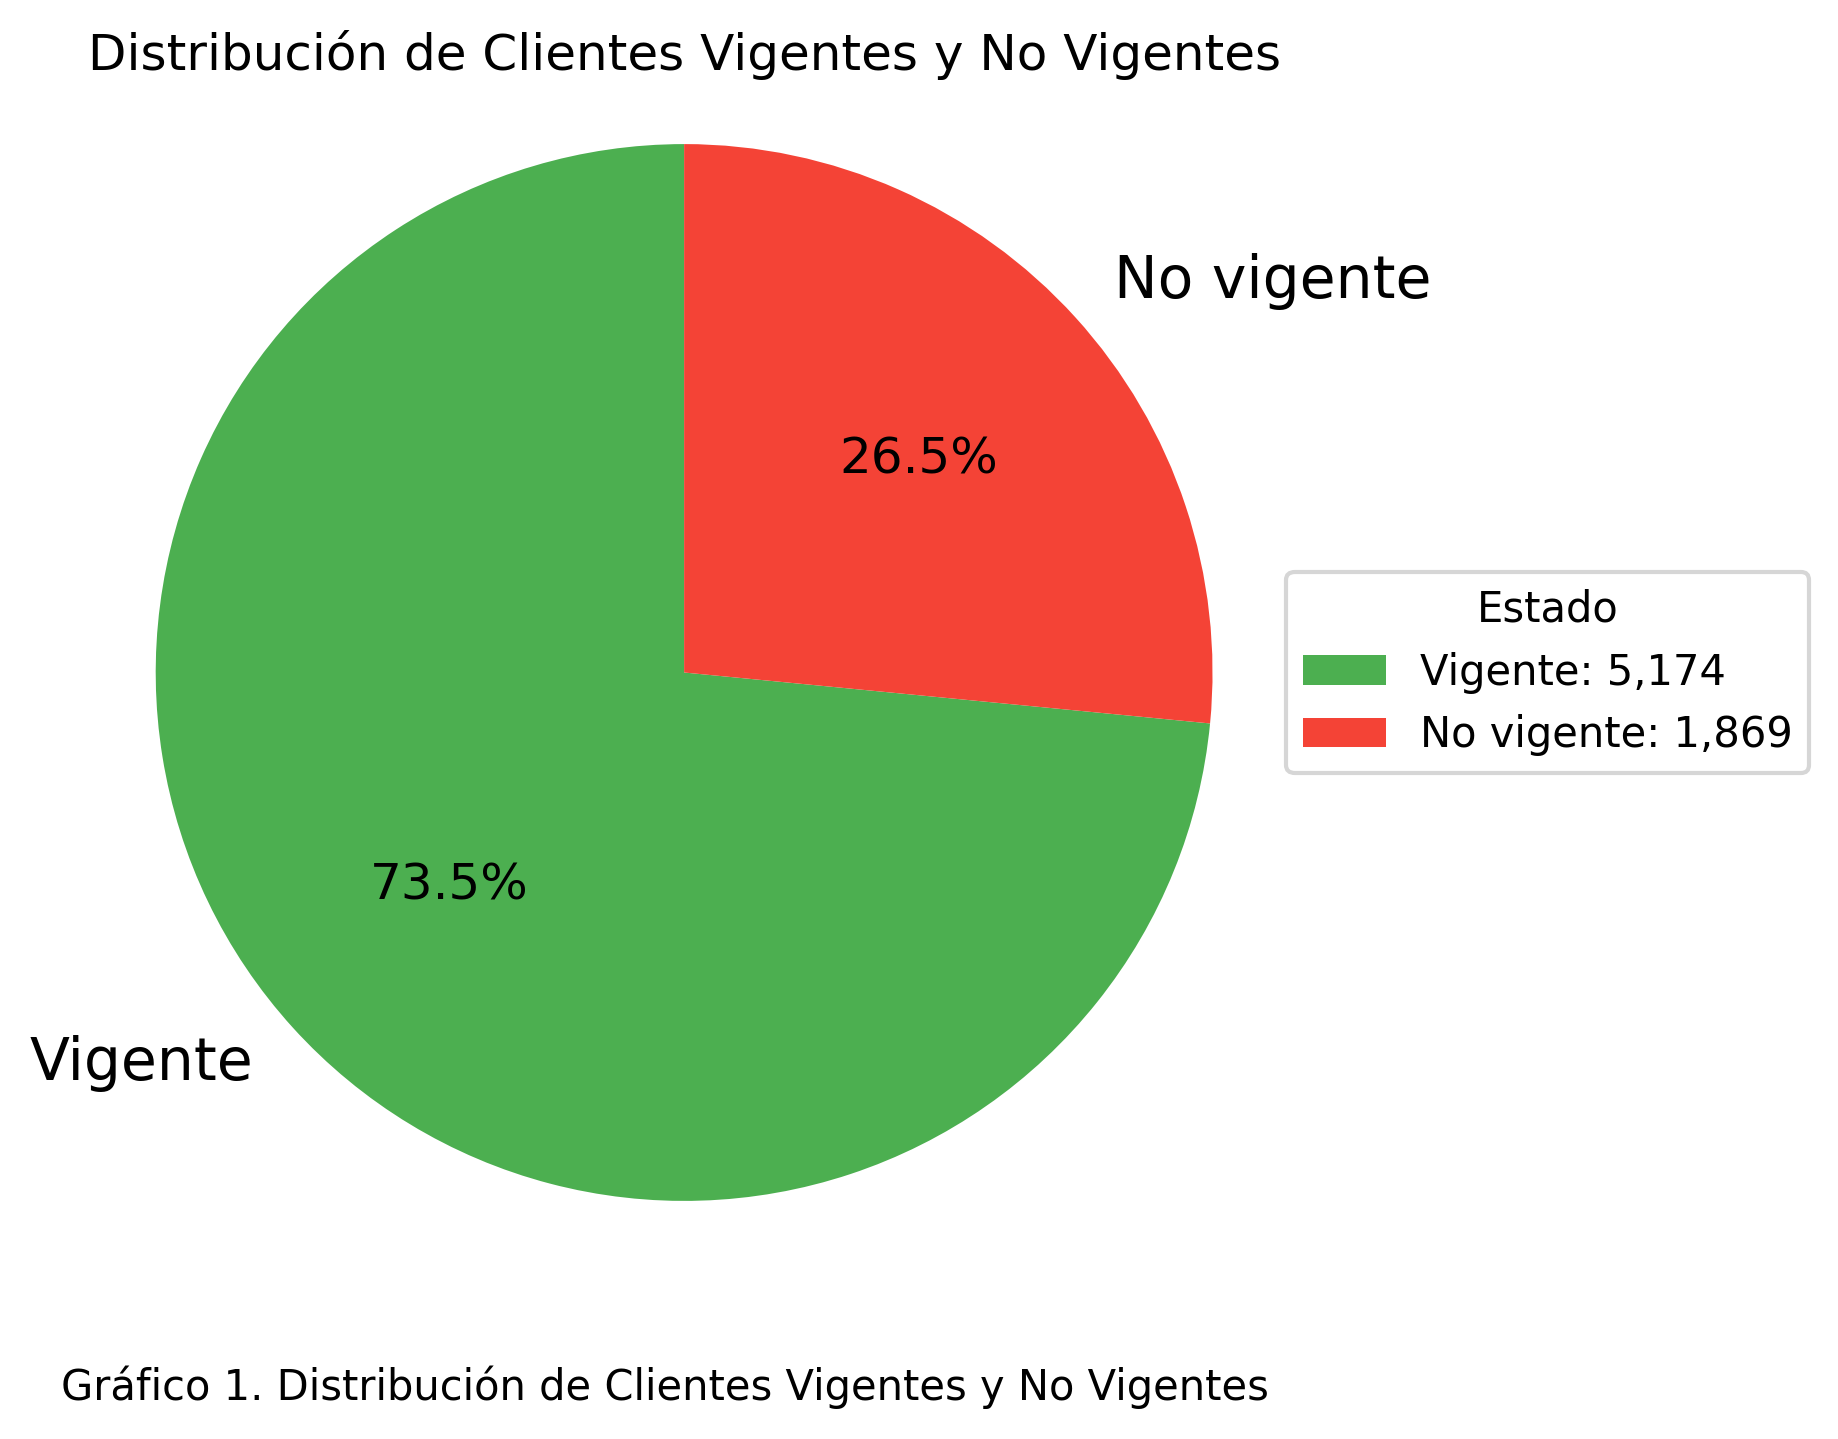

In [65]:
Image('/content/graf_01_dist_clientes.png',width=600)

**El Gráfico 1 nos muestra que los clientes que han dejado la compañía son 1869, correspondientes al 26,5%**


---
Sería interesante comparar esta tasa de deserción con estándares de la industria.


---




## **Características generales de clientes vigentes y no vigentes**

**¿Qué características comparten los clientes con la tasa más alta de abandono?**

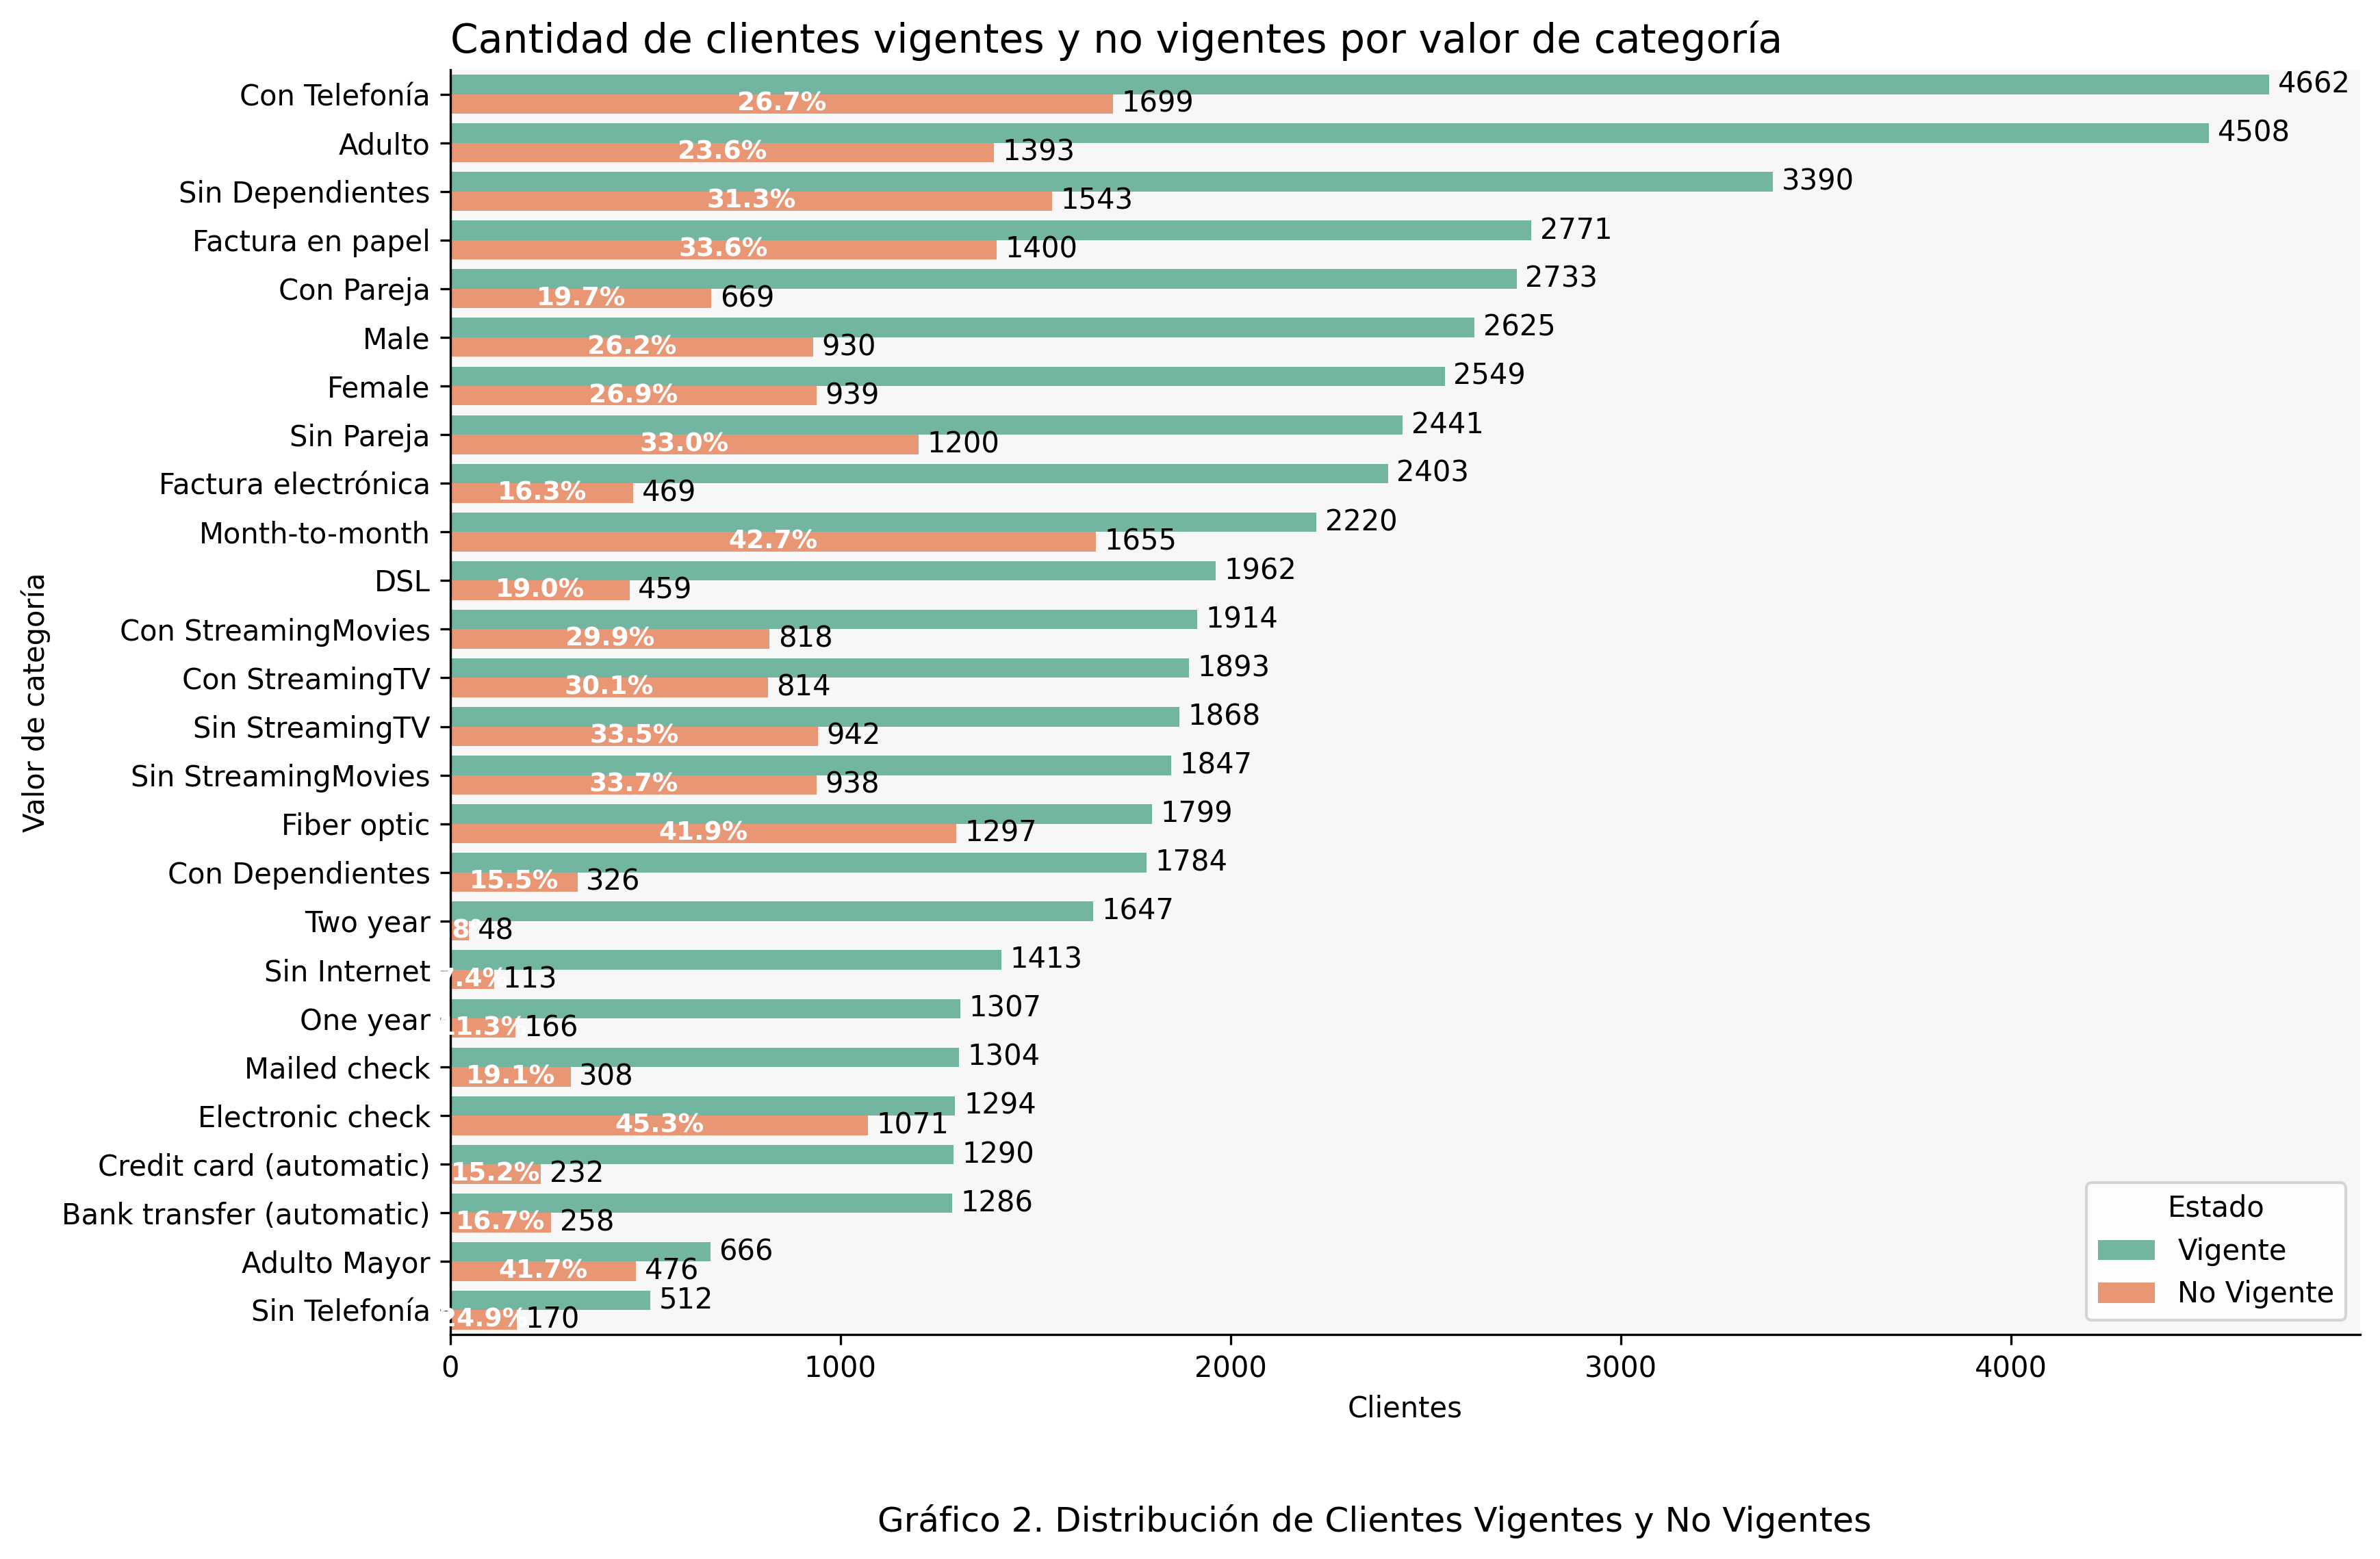

In [66]:
Image('/content/graf_02_dist_clientes_por_categoria.png',width=900)

**¿Qué características tienen la tasas más altas de abandono?**

El Gráfico 2 nos muestra las características que tiene las tasas de abandono más altas y más bajas.

Así, por ejemplo, la característica que presenta la tasa más alta de abandono corresponde al tipo de contrato Month-to-month, con el 42,7% de clientes, seguido de servicio de internet Fiber_optic, con el 41,9% de los clientes abandonando la compañía.

Por otra parte, la característica compartida por más personas y única con una tasa de abando inferior al 20% es la personas con pareja.

Las tasas más bajas de abando en términos absolutos la tienen características de baja presencia en la muestra de datos, como por ejemplo, cotratos bi-anuales, que solo lo tienen 1695 clientes, considerando vigentes y no vigentes.

## **Análisis de la Tasa de Abandono según tiempo de permanencia**

**Nos interesa saber cómo se distribuye la deserción de los clientes a través del tiempo.**


---


**¿Cuándo los clientes abandonan la compañía a medida que avanza su permanencia?**


---



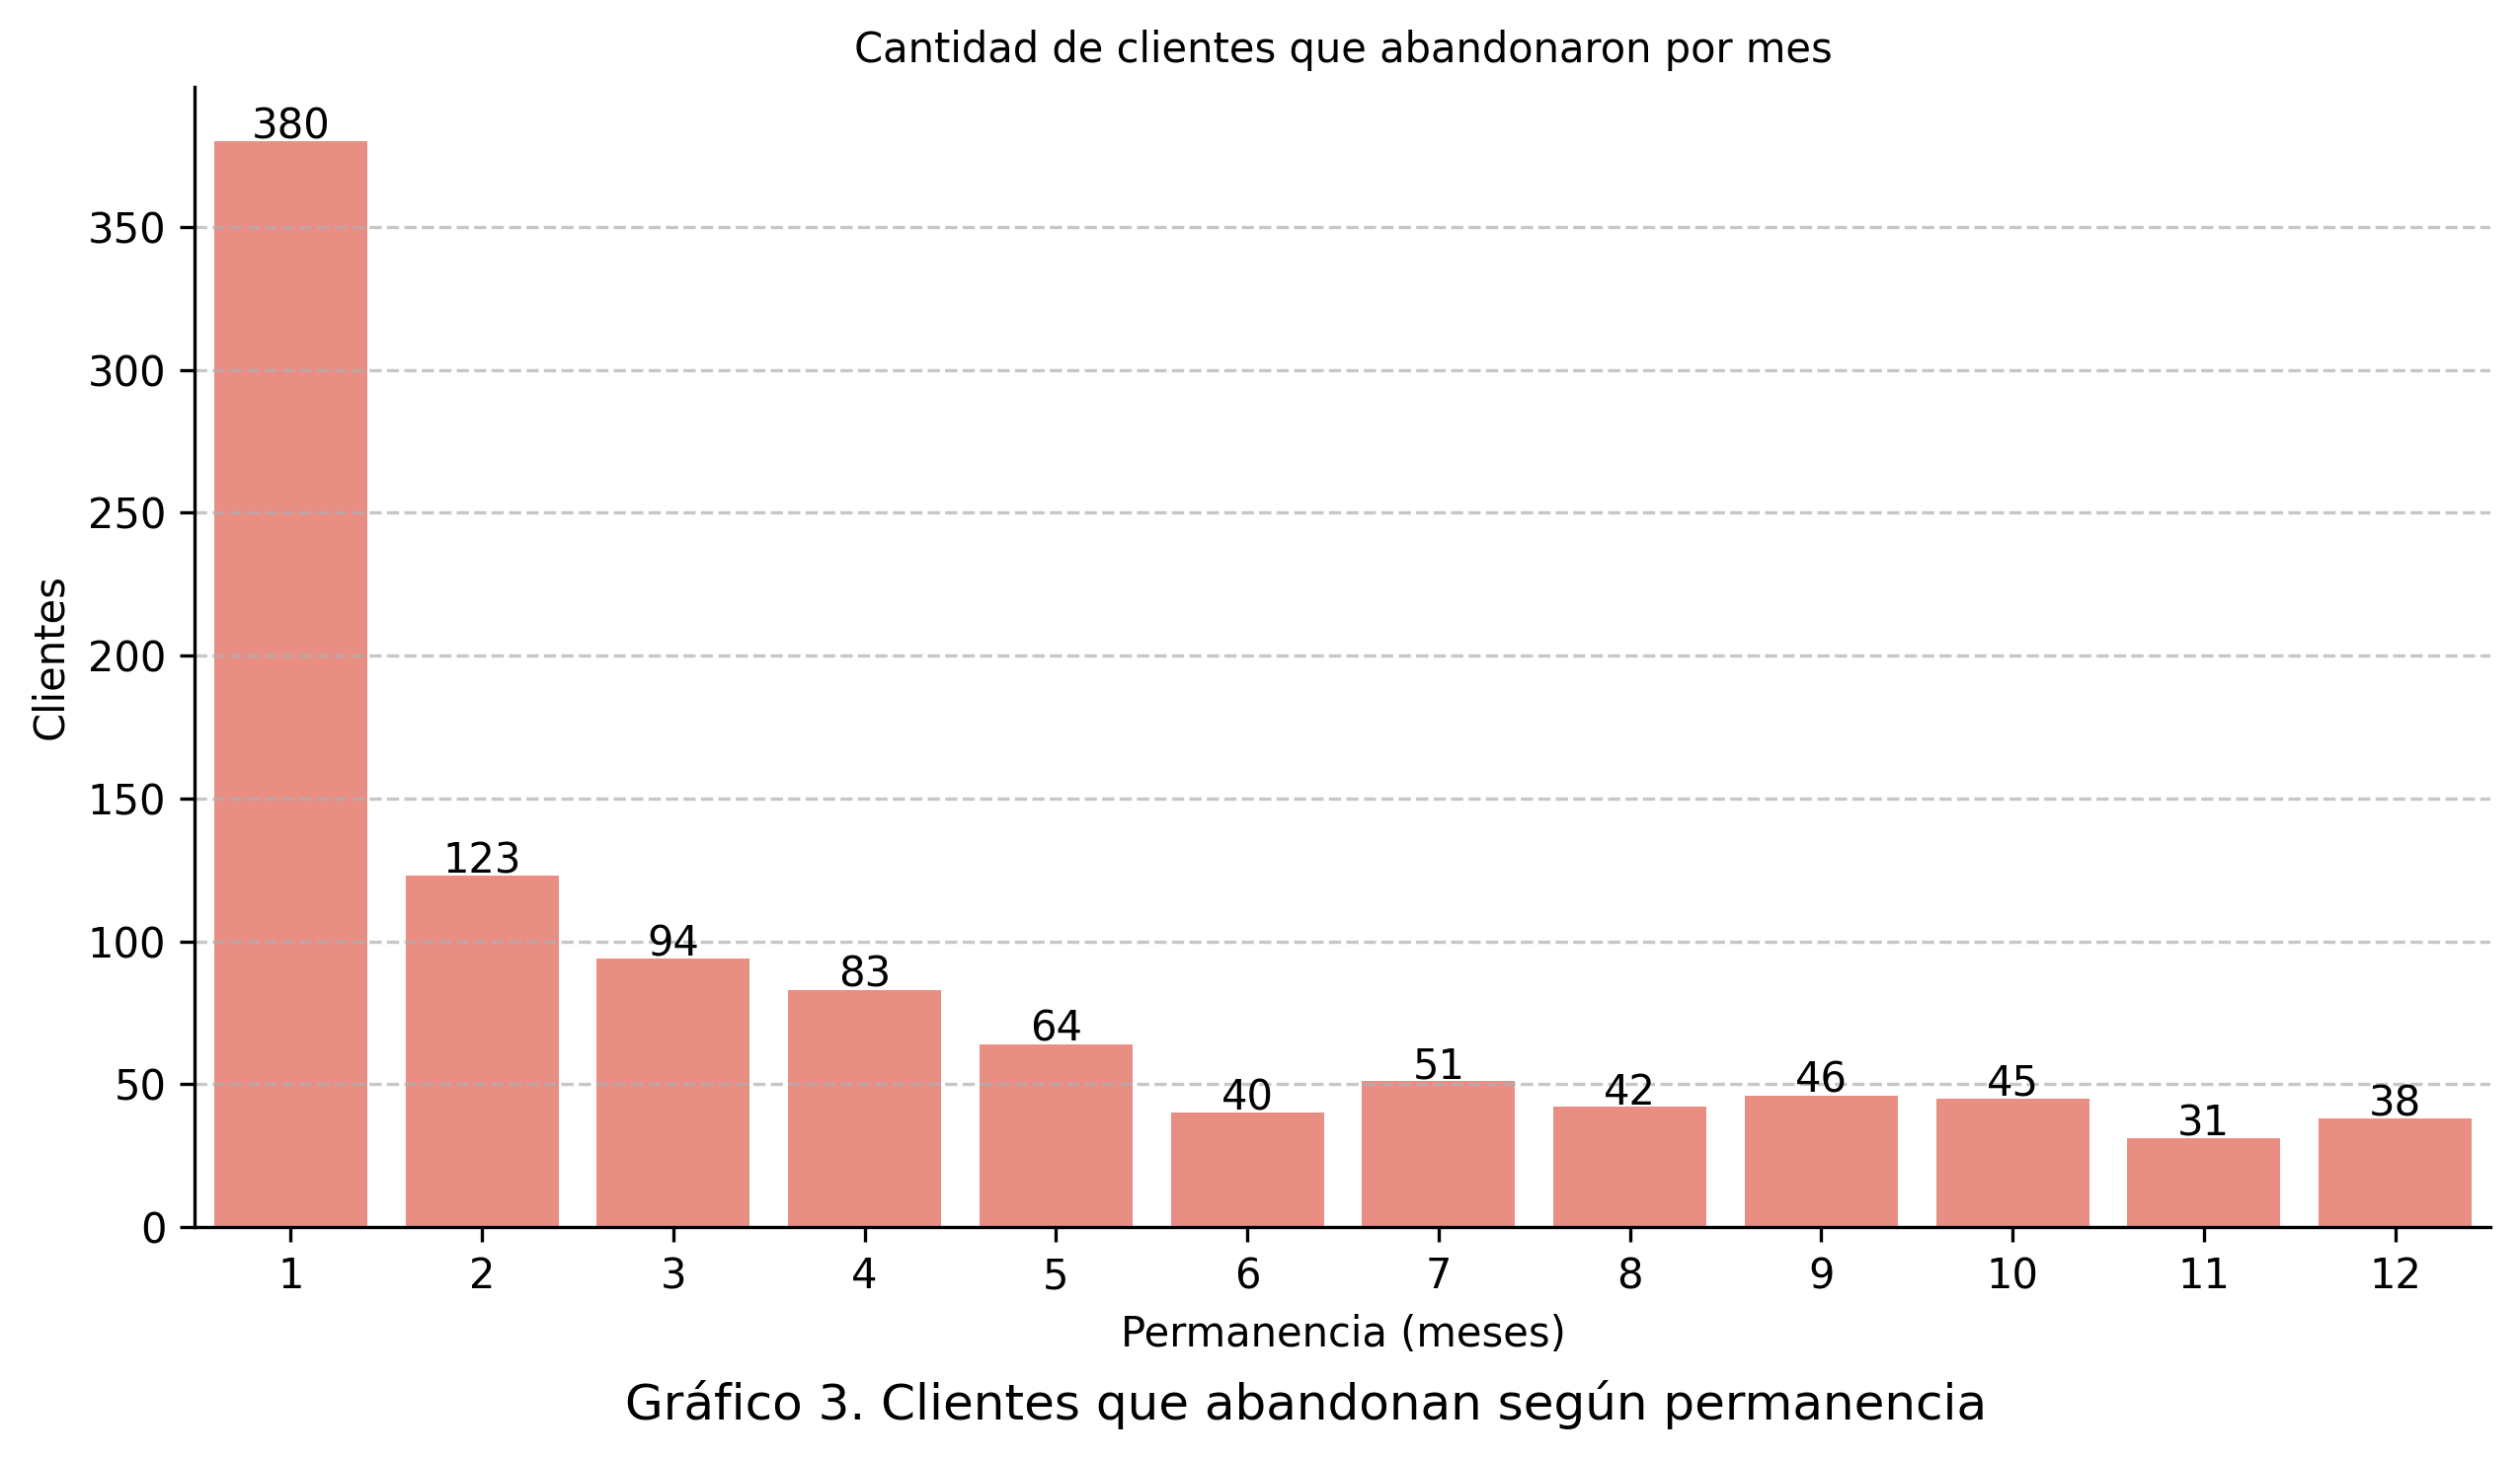

In [67]:
Image('/content/graf_03_abandonos_por_mes.png',width=900)



---
El Gráfico 3 nos muestra que en el primer mes de servicios es cuando más clientes han abandonado la compañía.


---
**Veamos a qué porcentaje corresponde este número de clientes abandonando la copañía según su tiempo de permanencia**


---





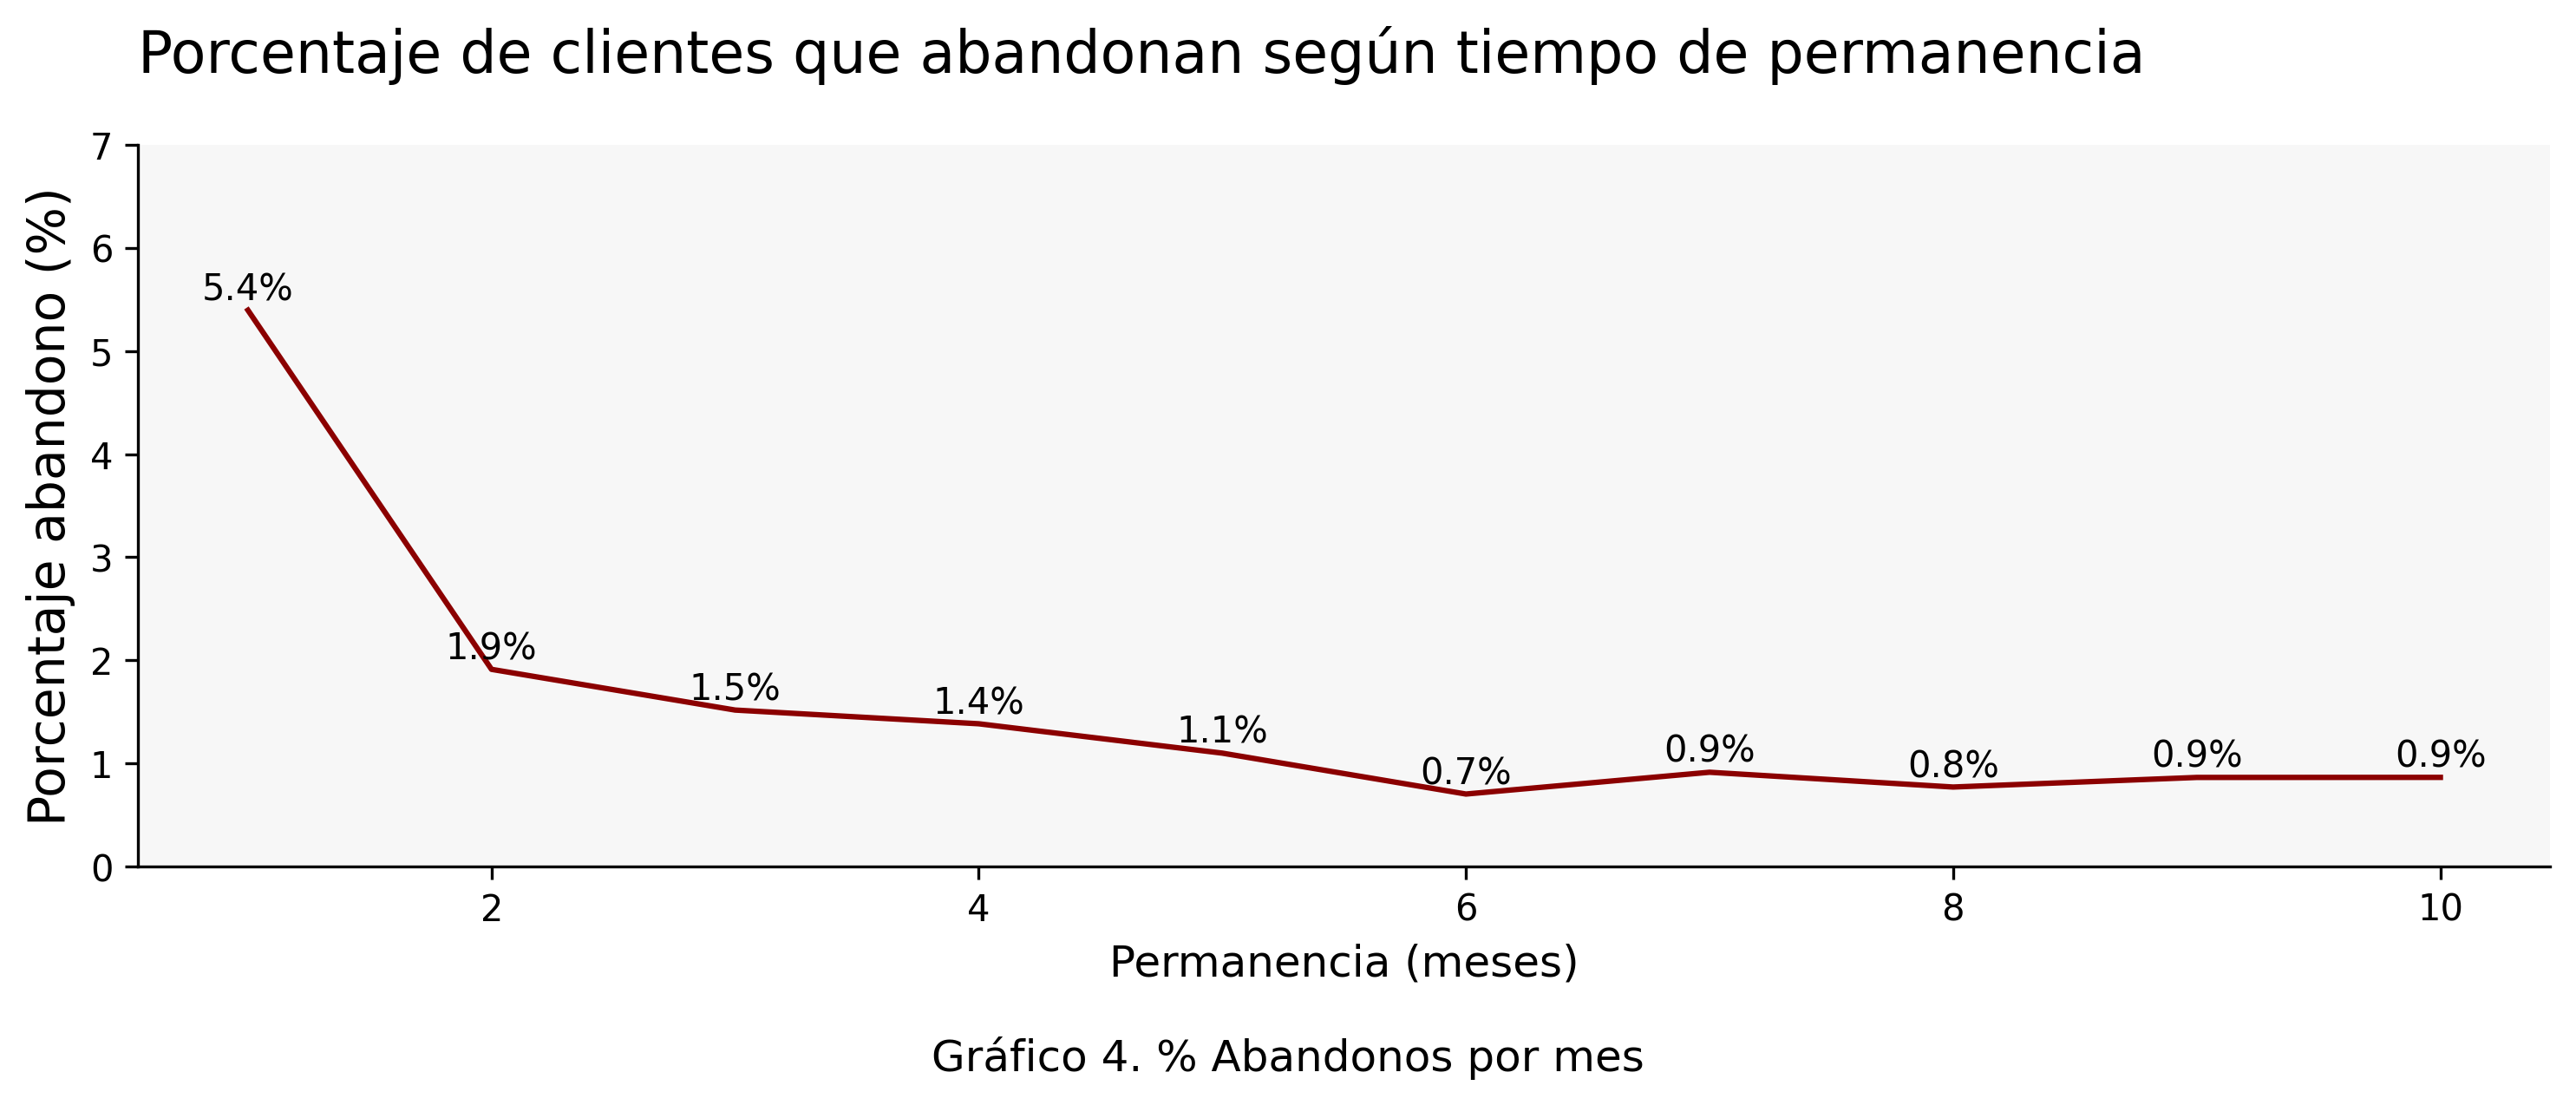

In [68]:
Image('/content/graf_04_abandonos_por_mes.png',width=900)



---


**El Gráfico 4 nos muestra que el 5,4% de los clientes que tiene o ha tenido la empresa han abandonado al primer mes.**


**Esta tasa de abandono disminuye y se mantiene bastante constante a partir del sexto mes.**

**Para los análsis siguientes consideraremos los abandonos tempranos, que son los más significativos.**


---



## **Análisis de Tasa de Abandono temprano considerando las características de los clientes**



---


**Buscaremos las combinaciones de características que comparten los clientes que abandonan tempranamente la compañía.**


---
**Veremos las combinaciones de características personales, de servicios, y de contratos.**


---



### **Cobinación de características generales con las mayores tasas de abandono temprano (al sexto mes)**

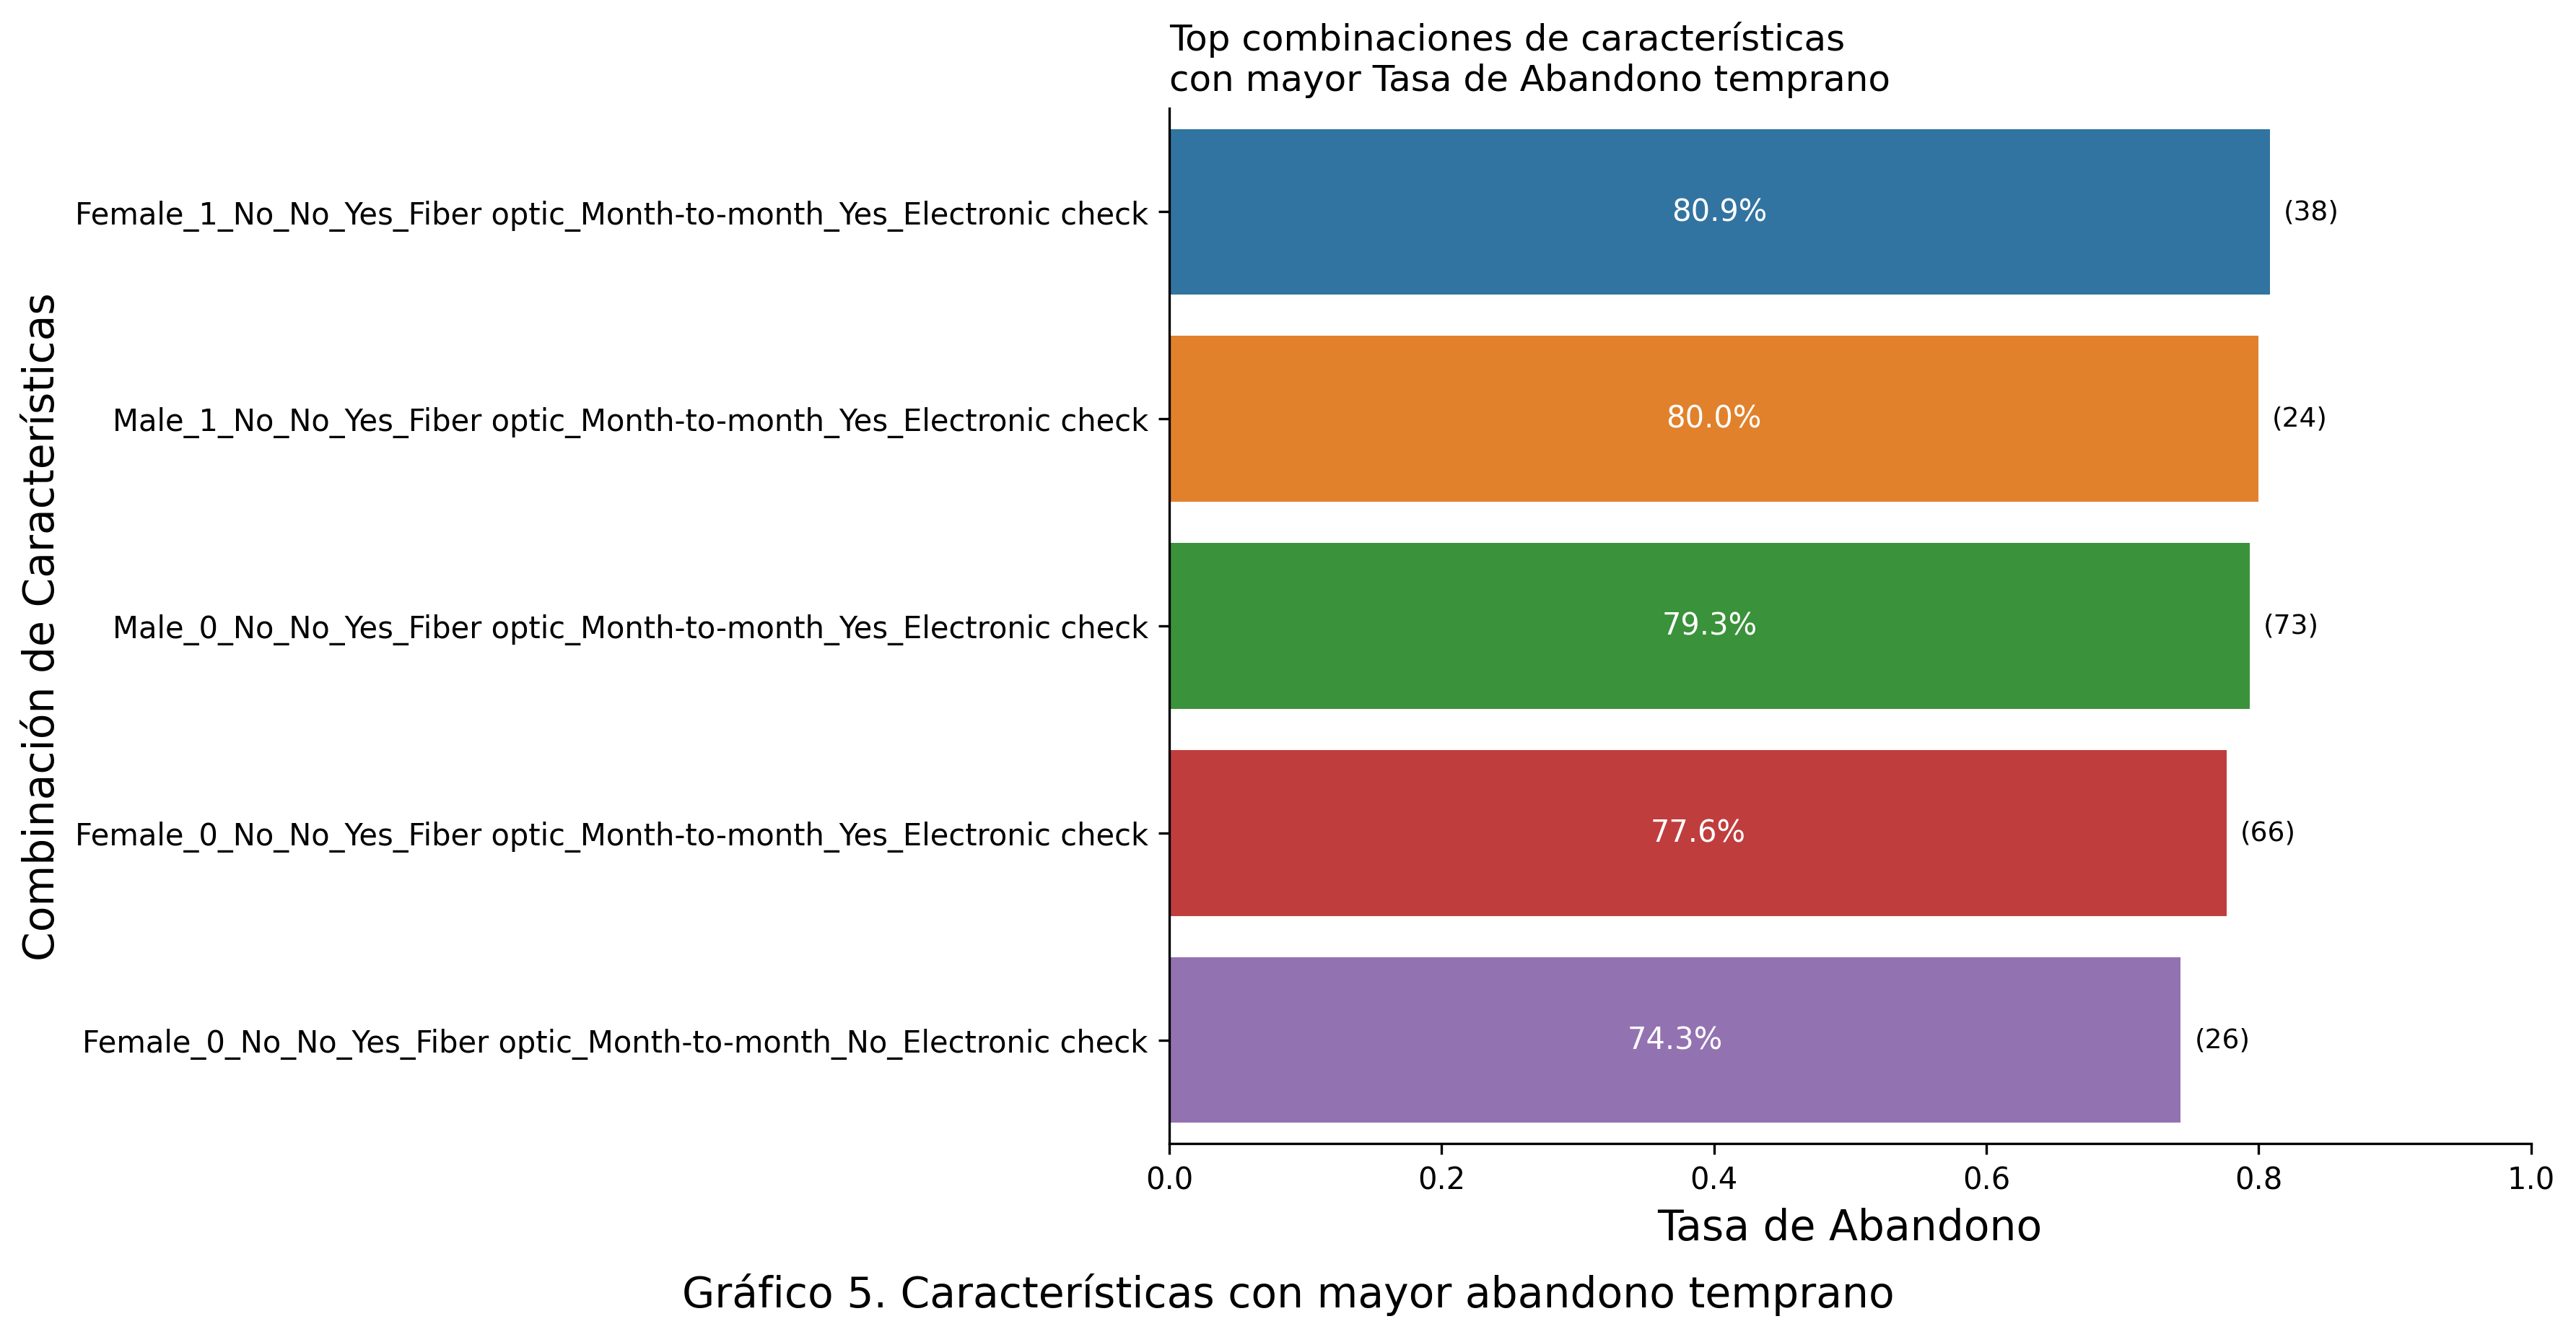

In [69]:
Image('/content/graf_05_top_combos_general.png',width=800)



---


**El Gráfico 5 nos muestra que entre el 74% y el 80% de los clientes que abandonan la compañía comparten estas características:**
```
Gender = Hombres y mujeres
Senior = Adultos Mayores y Adultos no Mayores
Partner = Sin pareja
Dependents = Sin dependientes
PhoneService = con servicio telefónico
InternetService = internet de Fiber optic
Contract = contratos mensuales
PaperlessBilling = factura física
PaymentMethod = pago con cheque electrónico.
```





---




### **Análisis de Tasa de Abandono temprano según características demográficas personales**



---


**Las características a considerar en este análisis son:**


*   Género: Hombre (H), Mujer (M)
*   Senior Citizen: Adulto (A), Adulto Mayor (A.Mayor)
*   Partner: Con Pareja (C.Pareja), Sin Pareja (S.Pareja)
*   Dependents: Con Dependientes (C.Dependientes), Sin Dependientes (S.Dependientes)






---



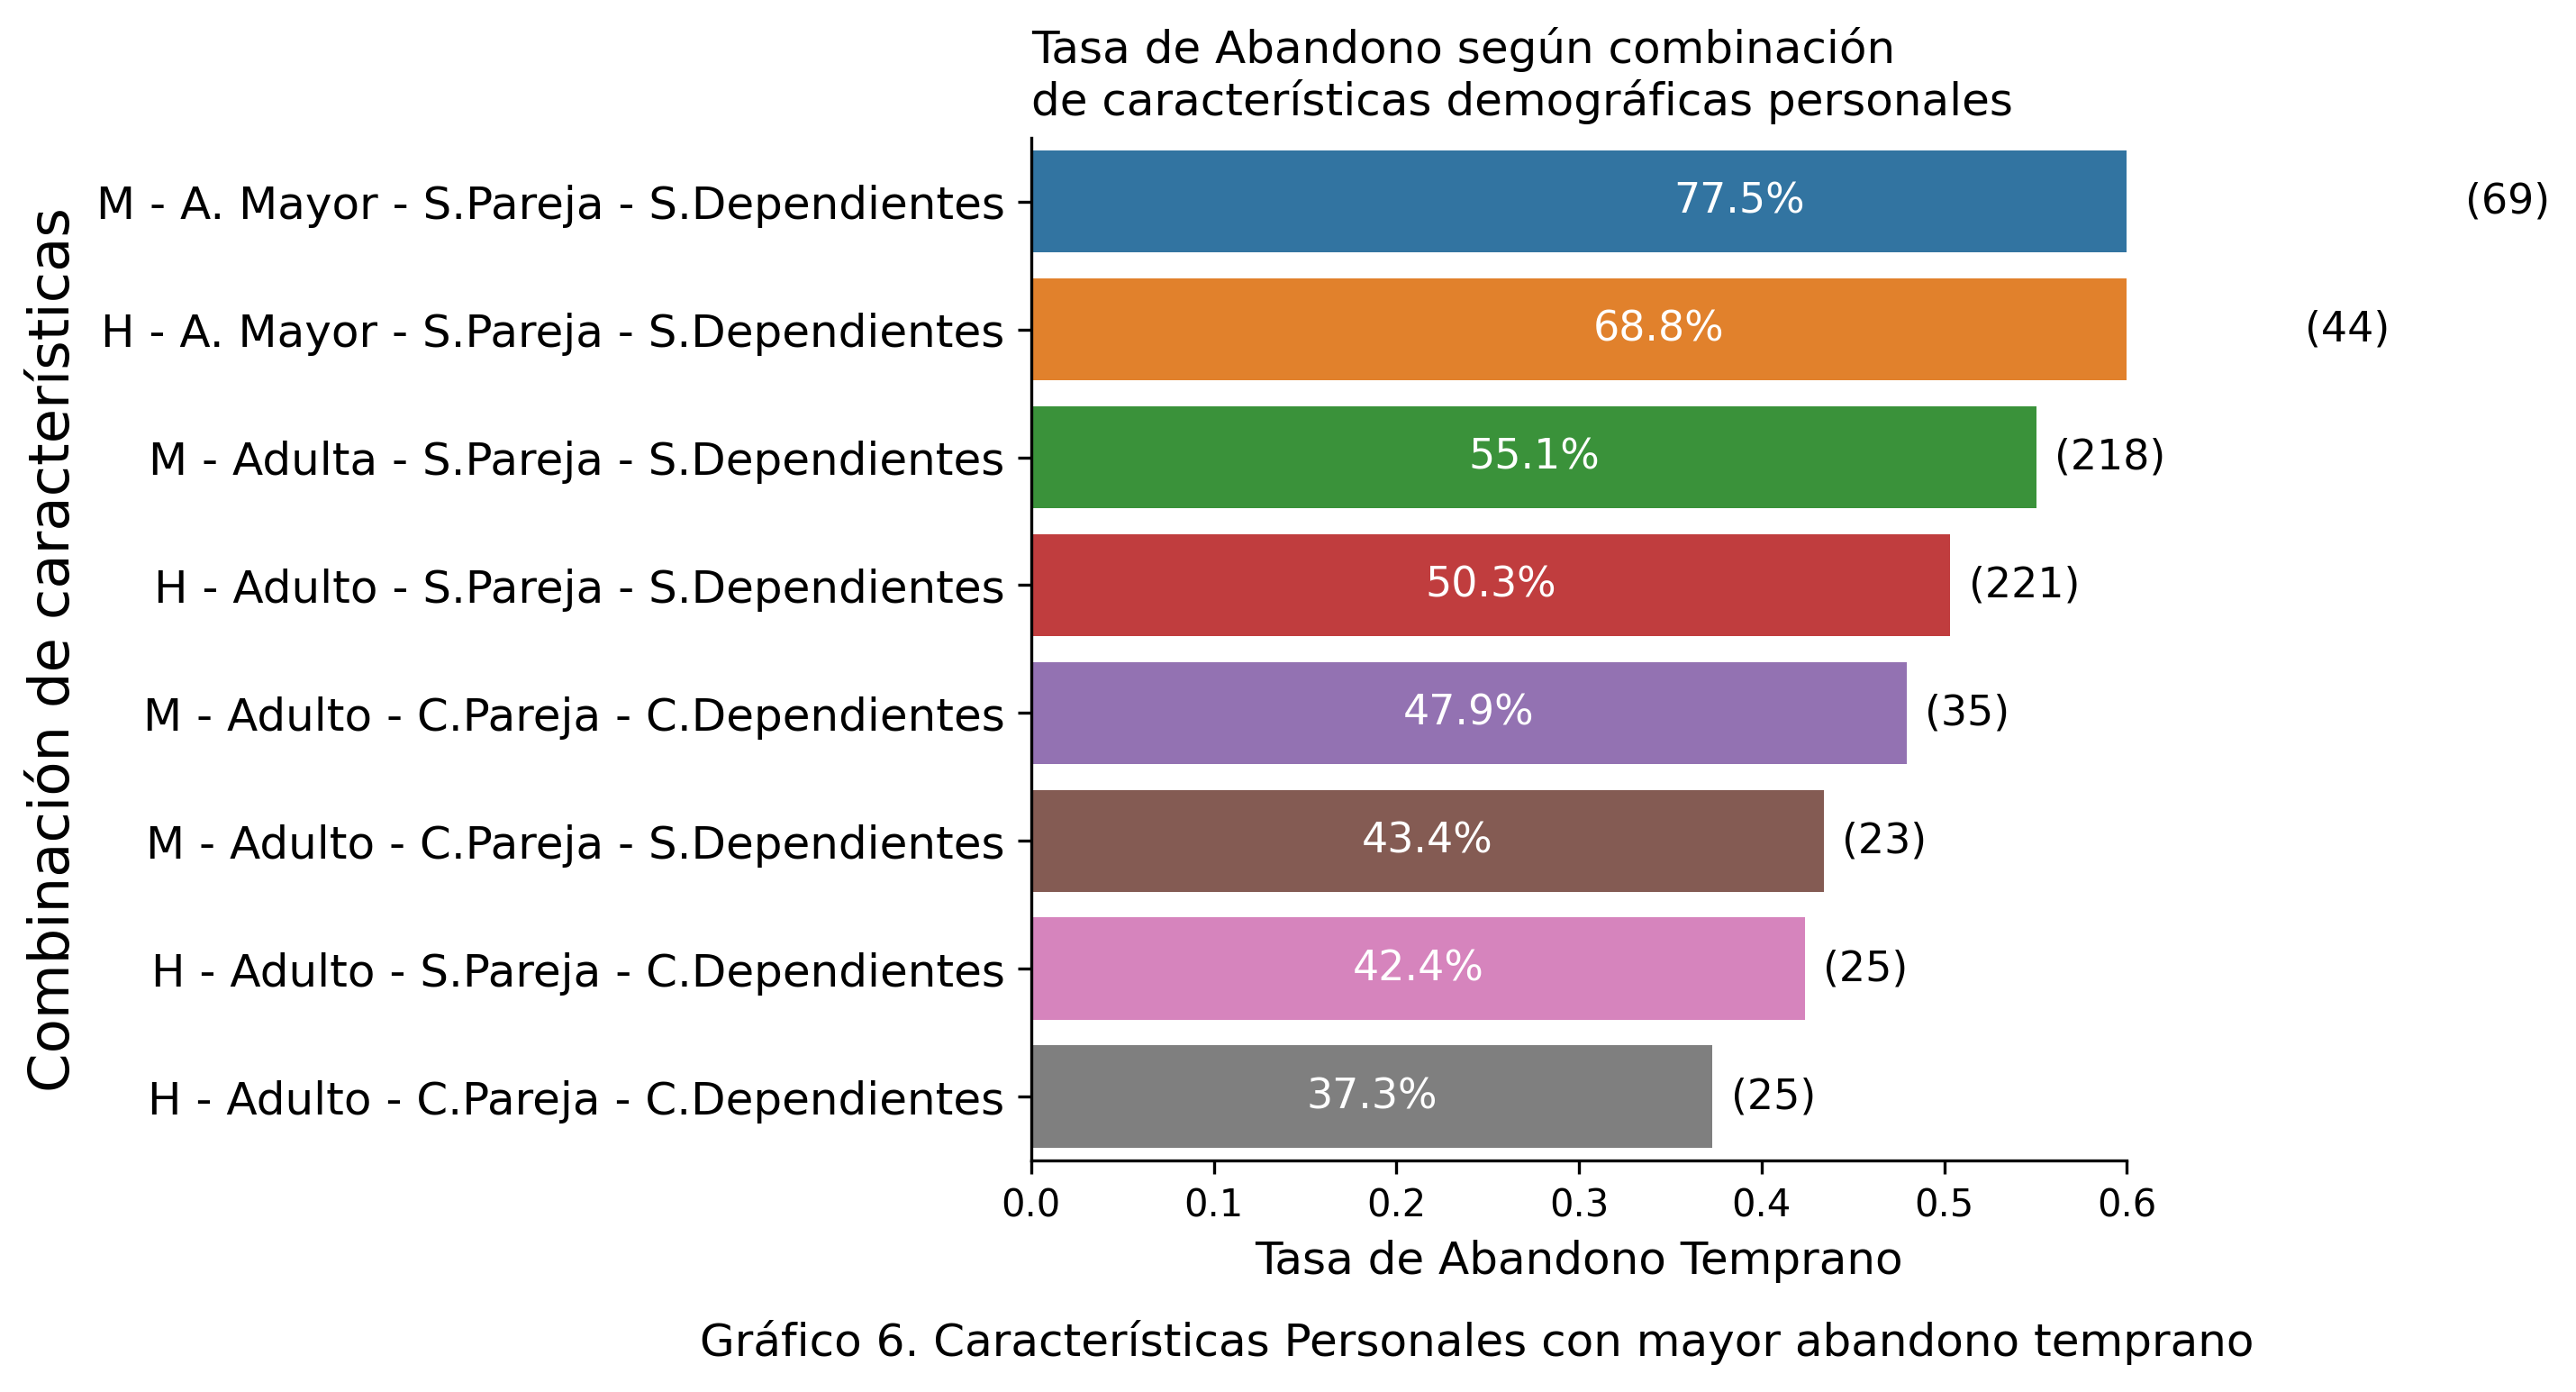

In [70]:
Image('/content/graf_06_top_combos_personales.png',width=800)



---


**El Gráfico 6 nos muestra que, considerando solo las características socio-demográficas personales, se mantienen las mismas características que nos mostraba el Gráfico 5 como las de tasas más altas de abandono:**,



*   Hombres y mujeres
*   Adultos Mayores y Adultos no mayores
*   Sin pareja
*   Sin dependientes
---

### **Análisis de la Tasa de Abandono temprano según servicios contratados**

**Las características a considerar en este análisis son:**


*   PhoneService
*   InternetService
*   OnlineSecurity
*   OnlineBackup
*   DeviceProtection
*   TechSupport
*   StreamingTV
*   StreamingMovies
---

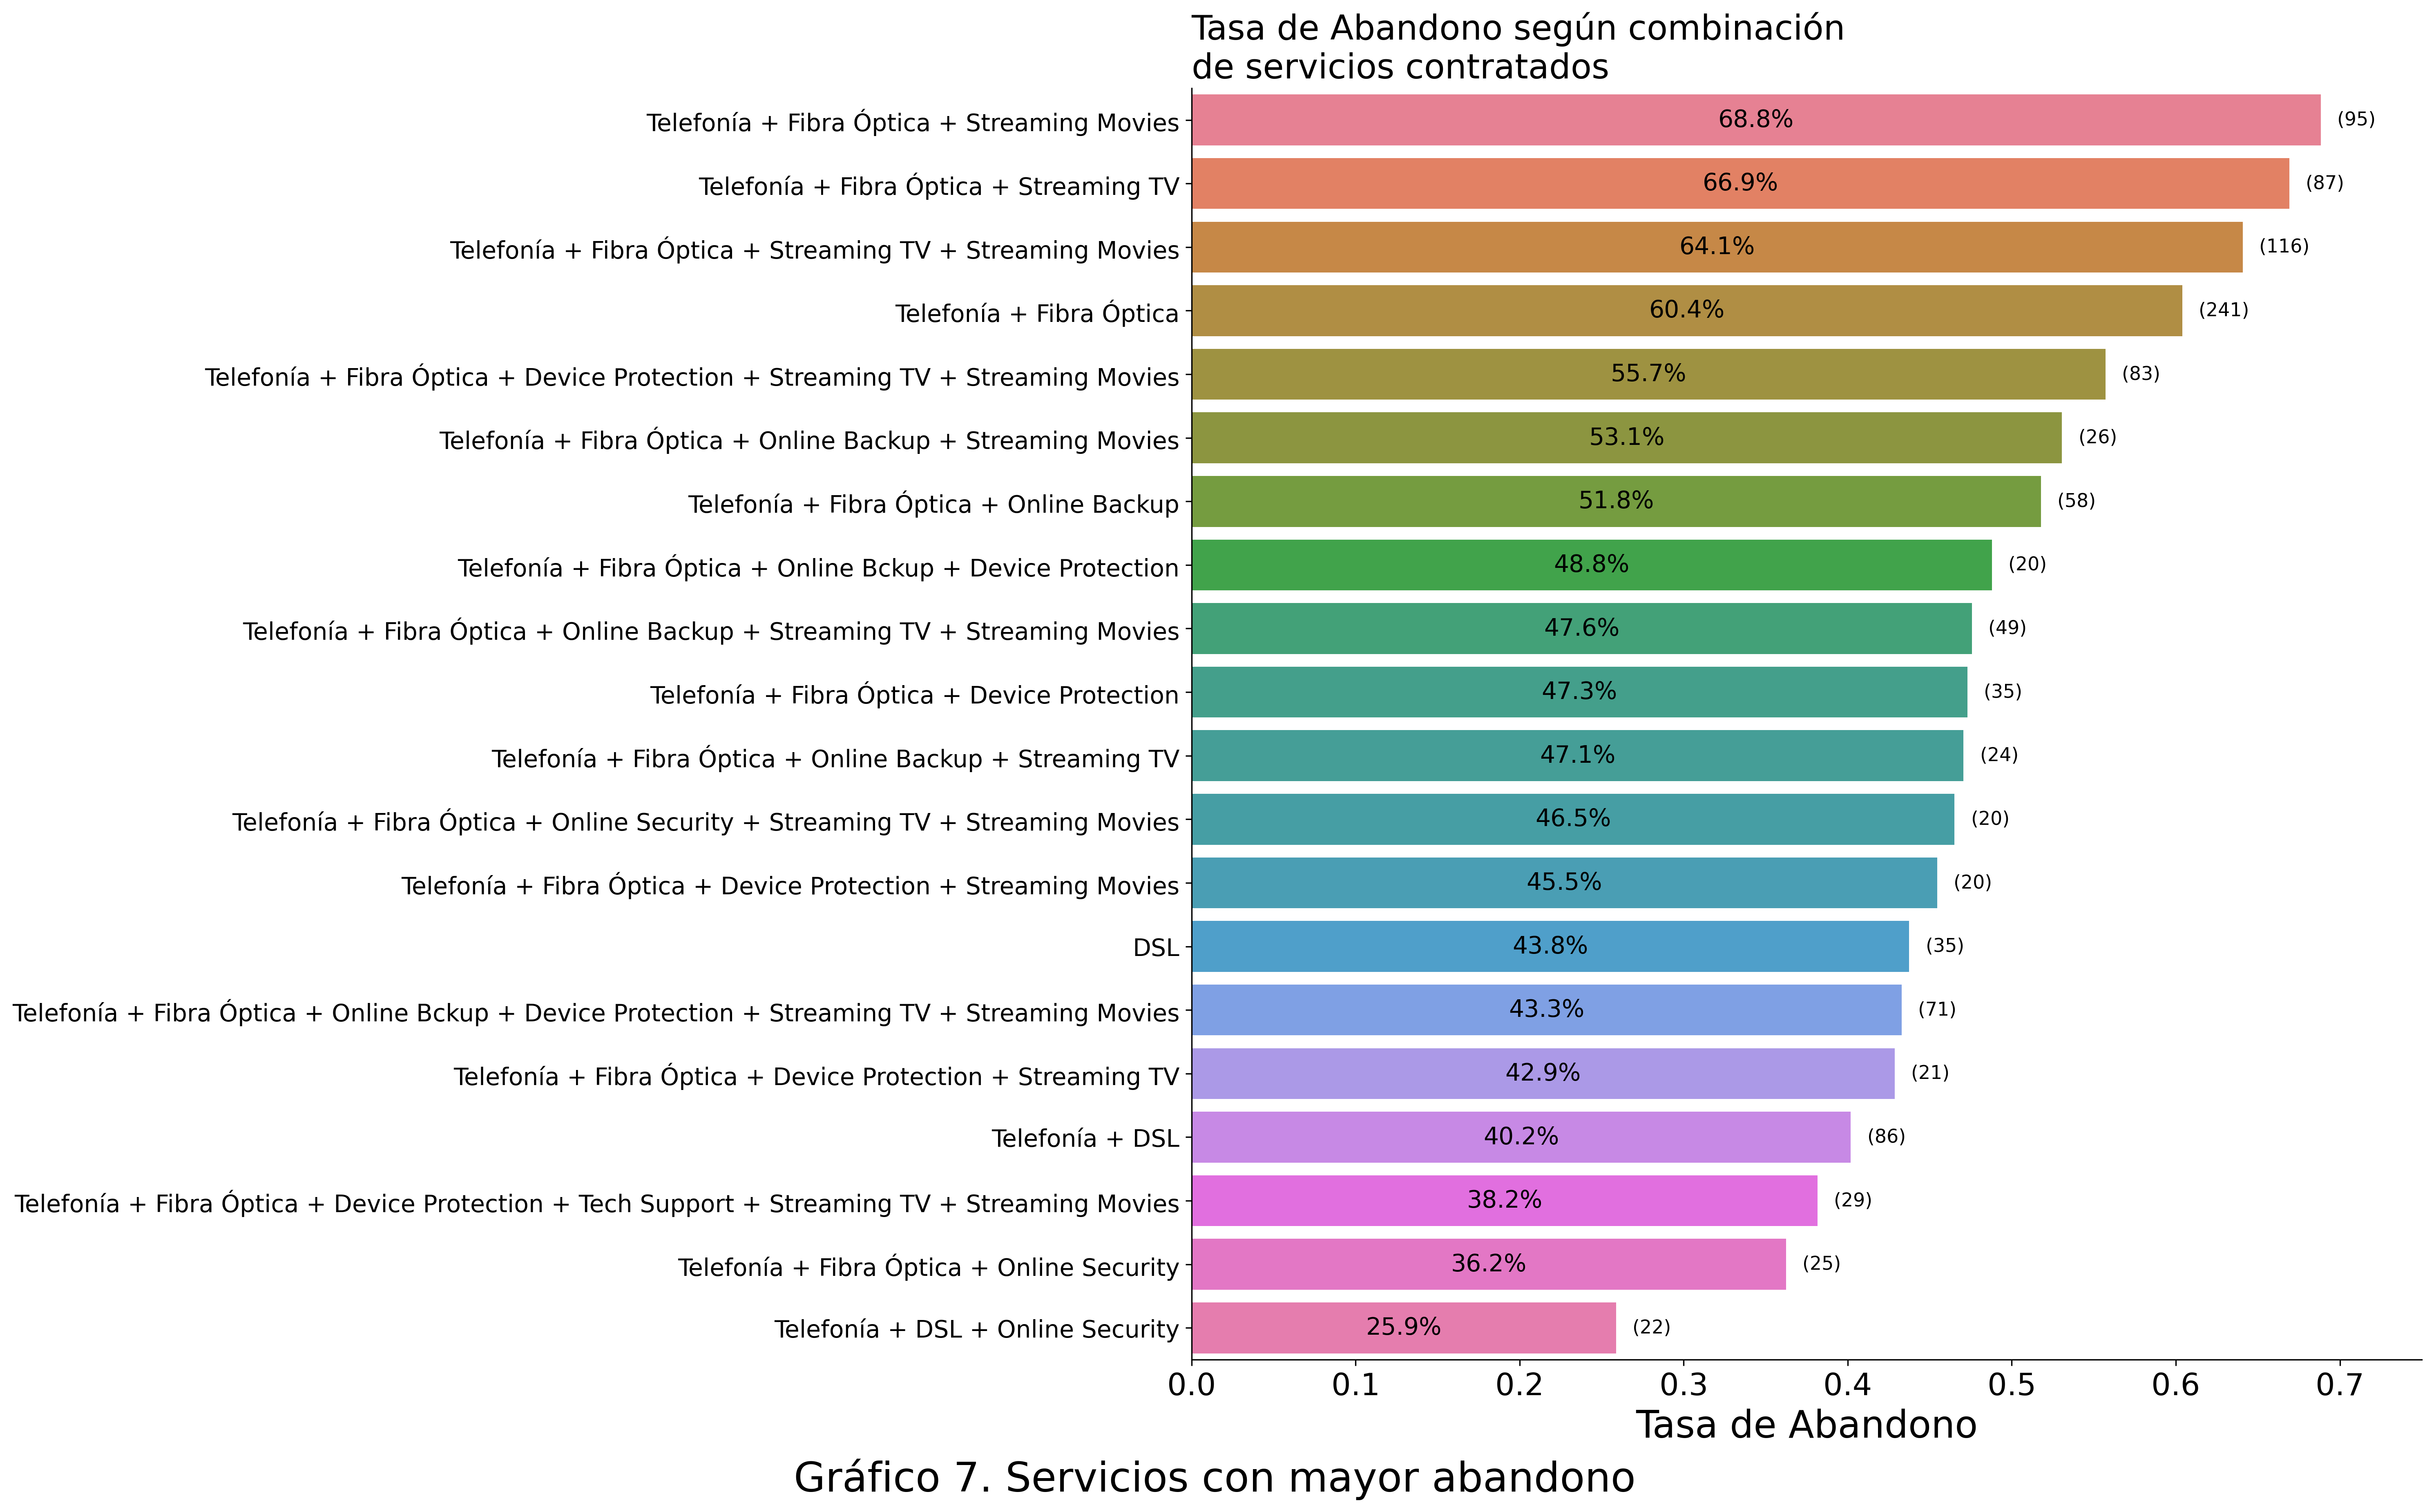

In [71]:
Image('/content/graf_07_top_combos_servicios.png',width=1000)



---

En relación con los servicios contratados, el Gráfico 7 nos muestra que los grupos con la mayor tasa de abandono tienen en común haber contratado: **Telefonía y Fibra Óptica** más algunos servicios adicionales.


---

También es importante apreciar que los servicios de Tech Support y Online Security tienen las tasas de deserción más bajas.


---



### **Análisis de la Tasa de Abandono según Tipo de Contrato y Forma de Pago**



---


**Las características a considerar en este análisis son:**


*   Contract: Mensual, Anual, Bi-Anual
*   PaperlessBilling: Físico, Electrónico
*   PaymentMethod:


---



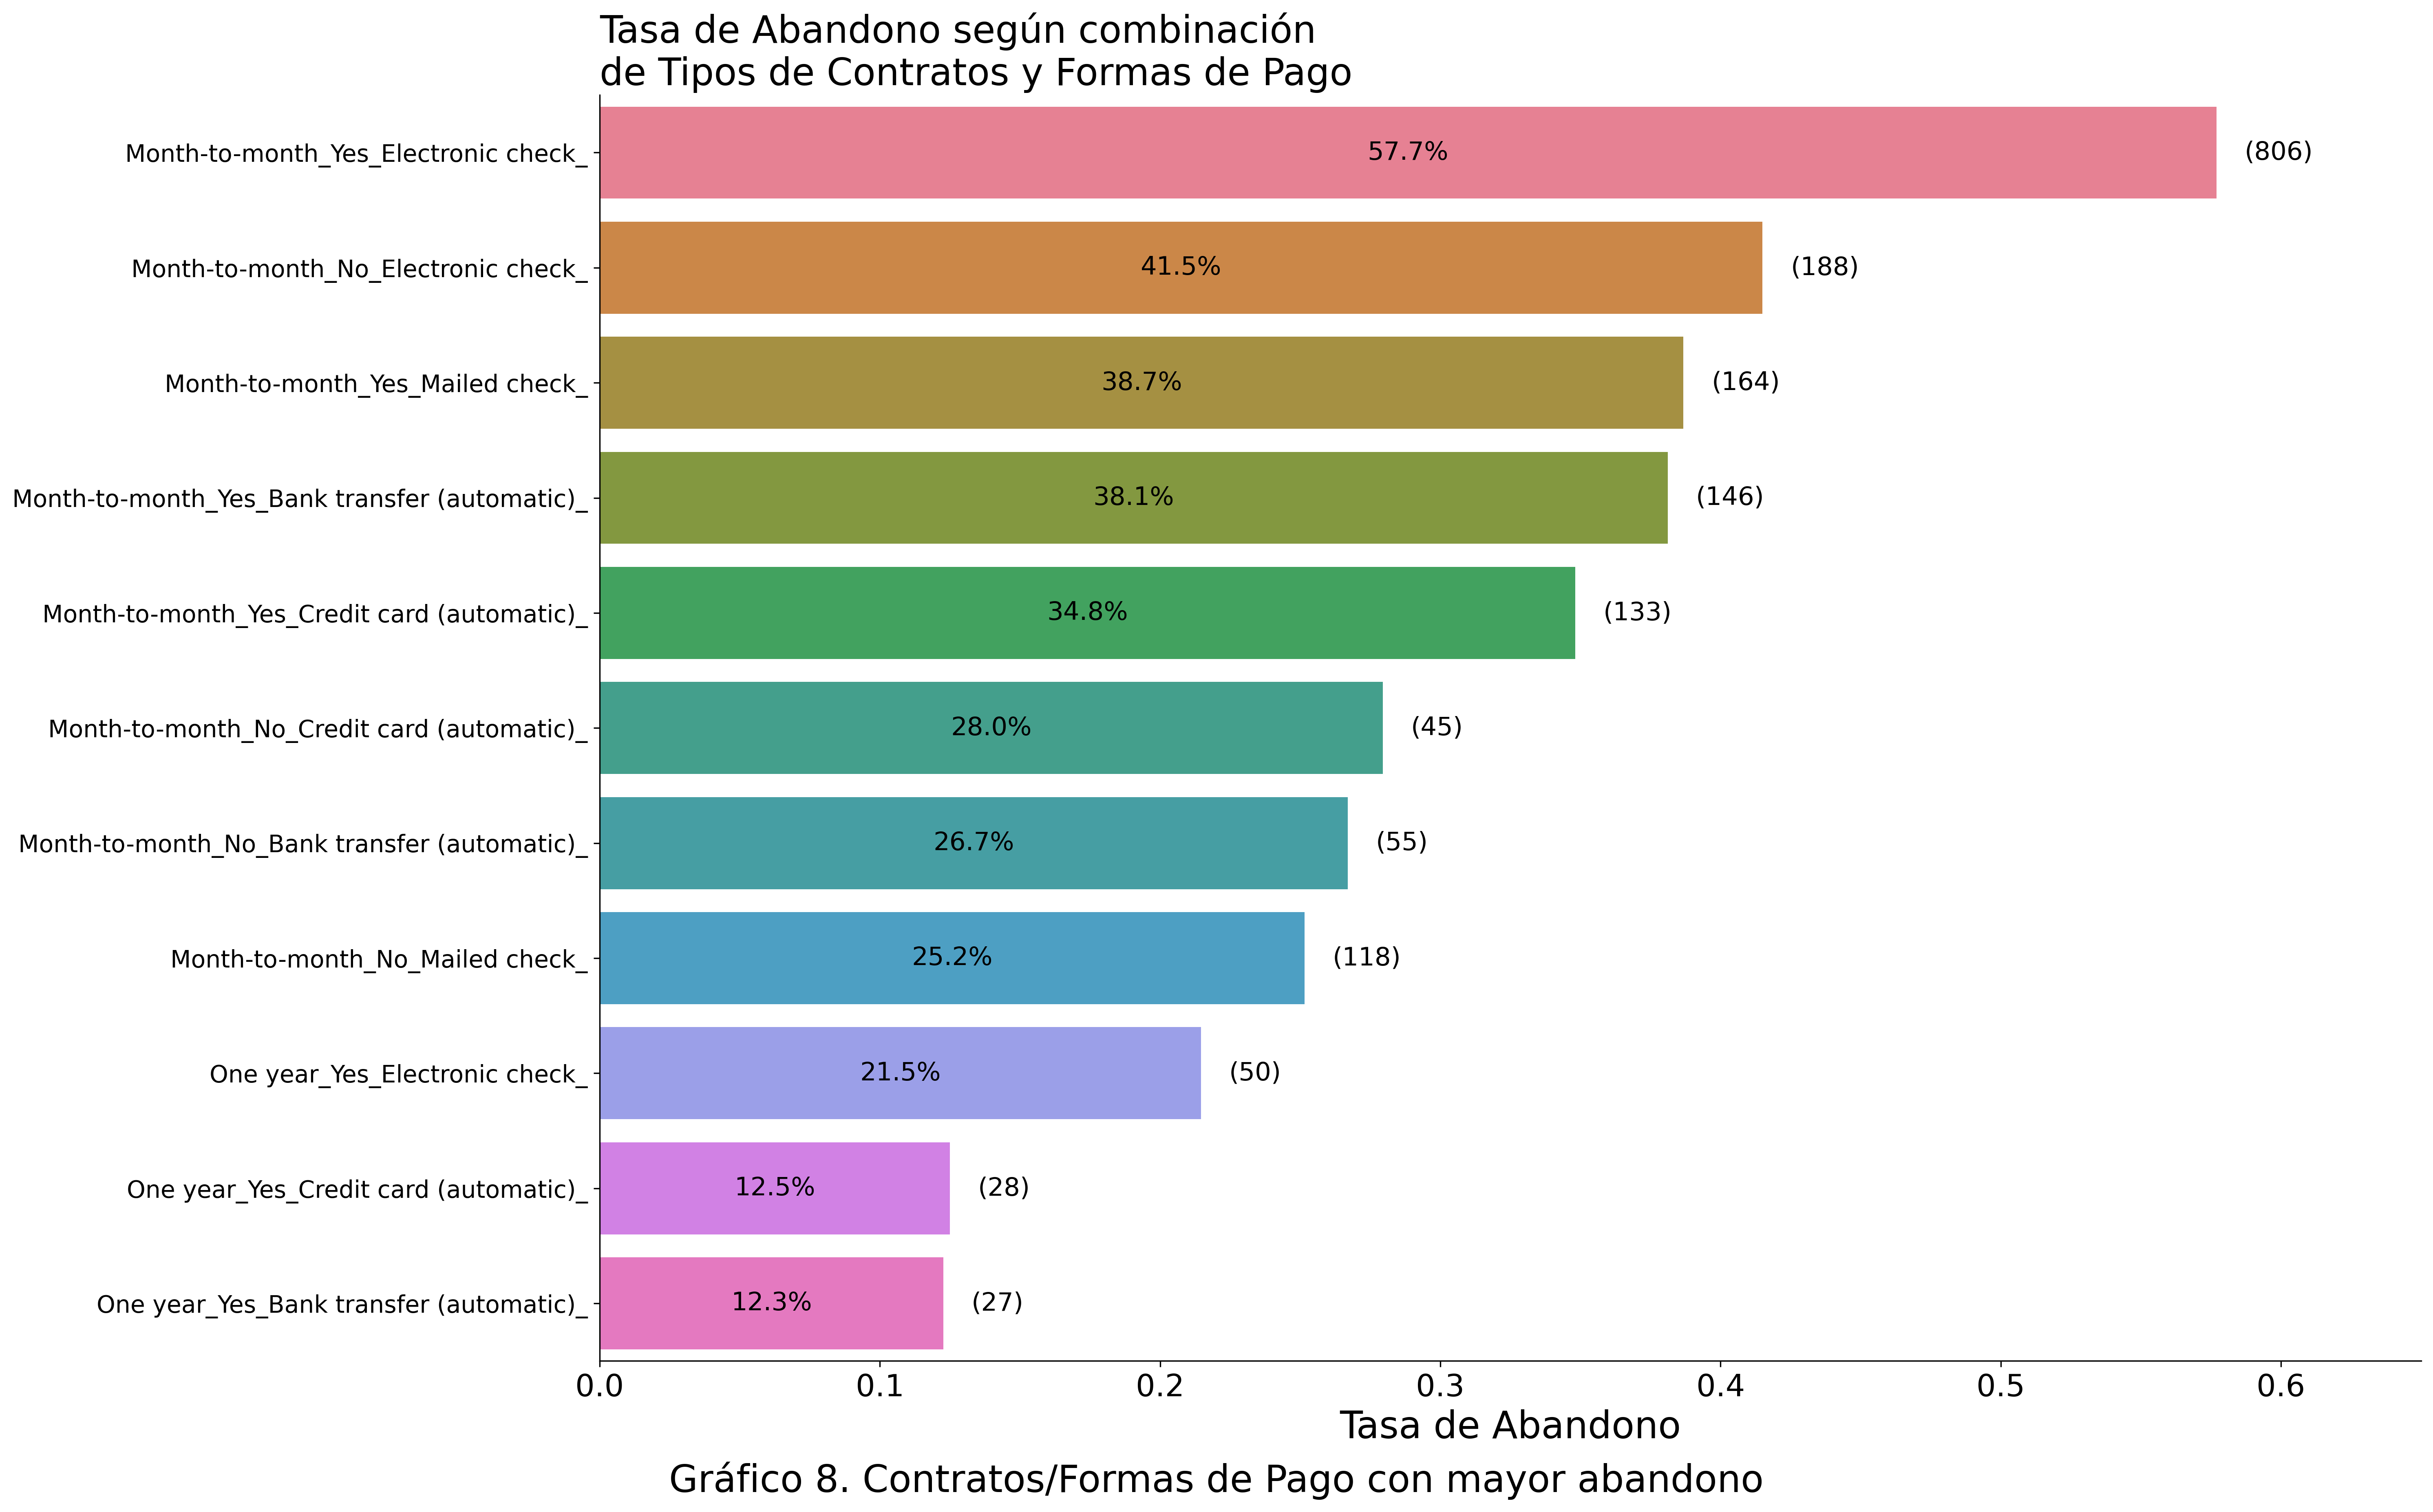

In [72]:
Image('/content/graf_08_top_combos_contratos.png',width=800)



---


El Gráfico 8 nos muestra que prácticamente todos los clientes que abandonan la compañía tienen **contratos mensuales**.


---



# **Relaciones entre las tasas de abandono entre distintas características**

##**Relación entre características personales**

###**Género - Pareja**

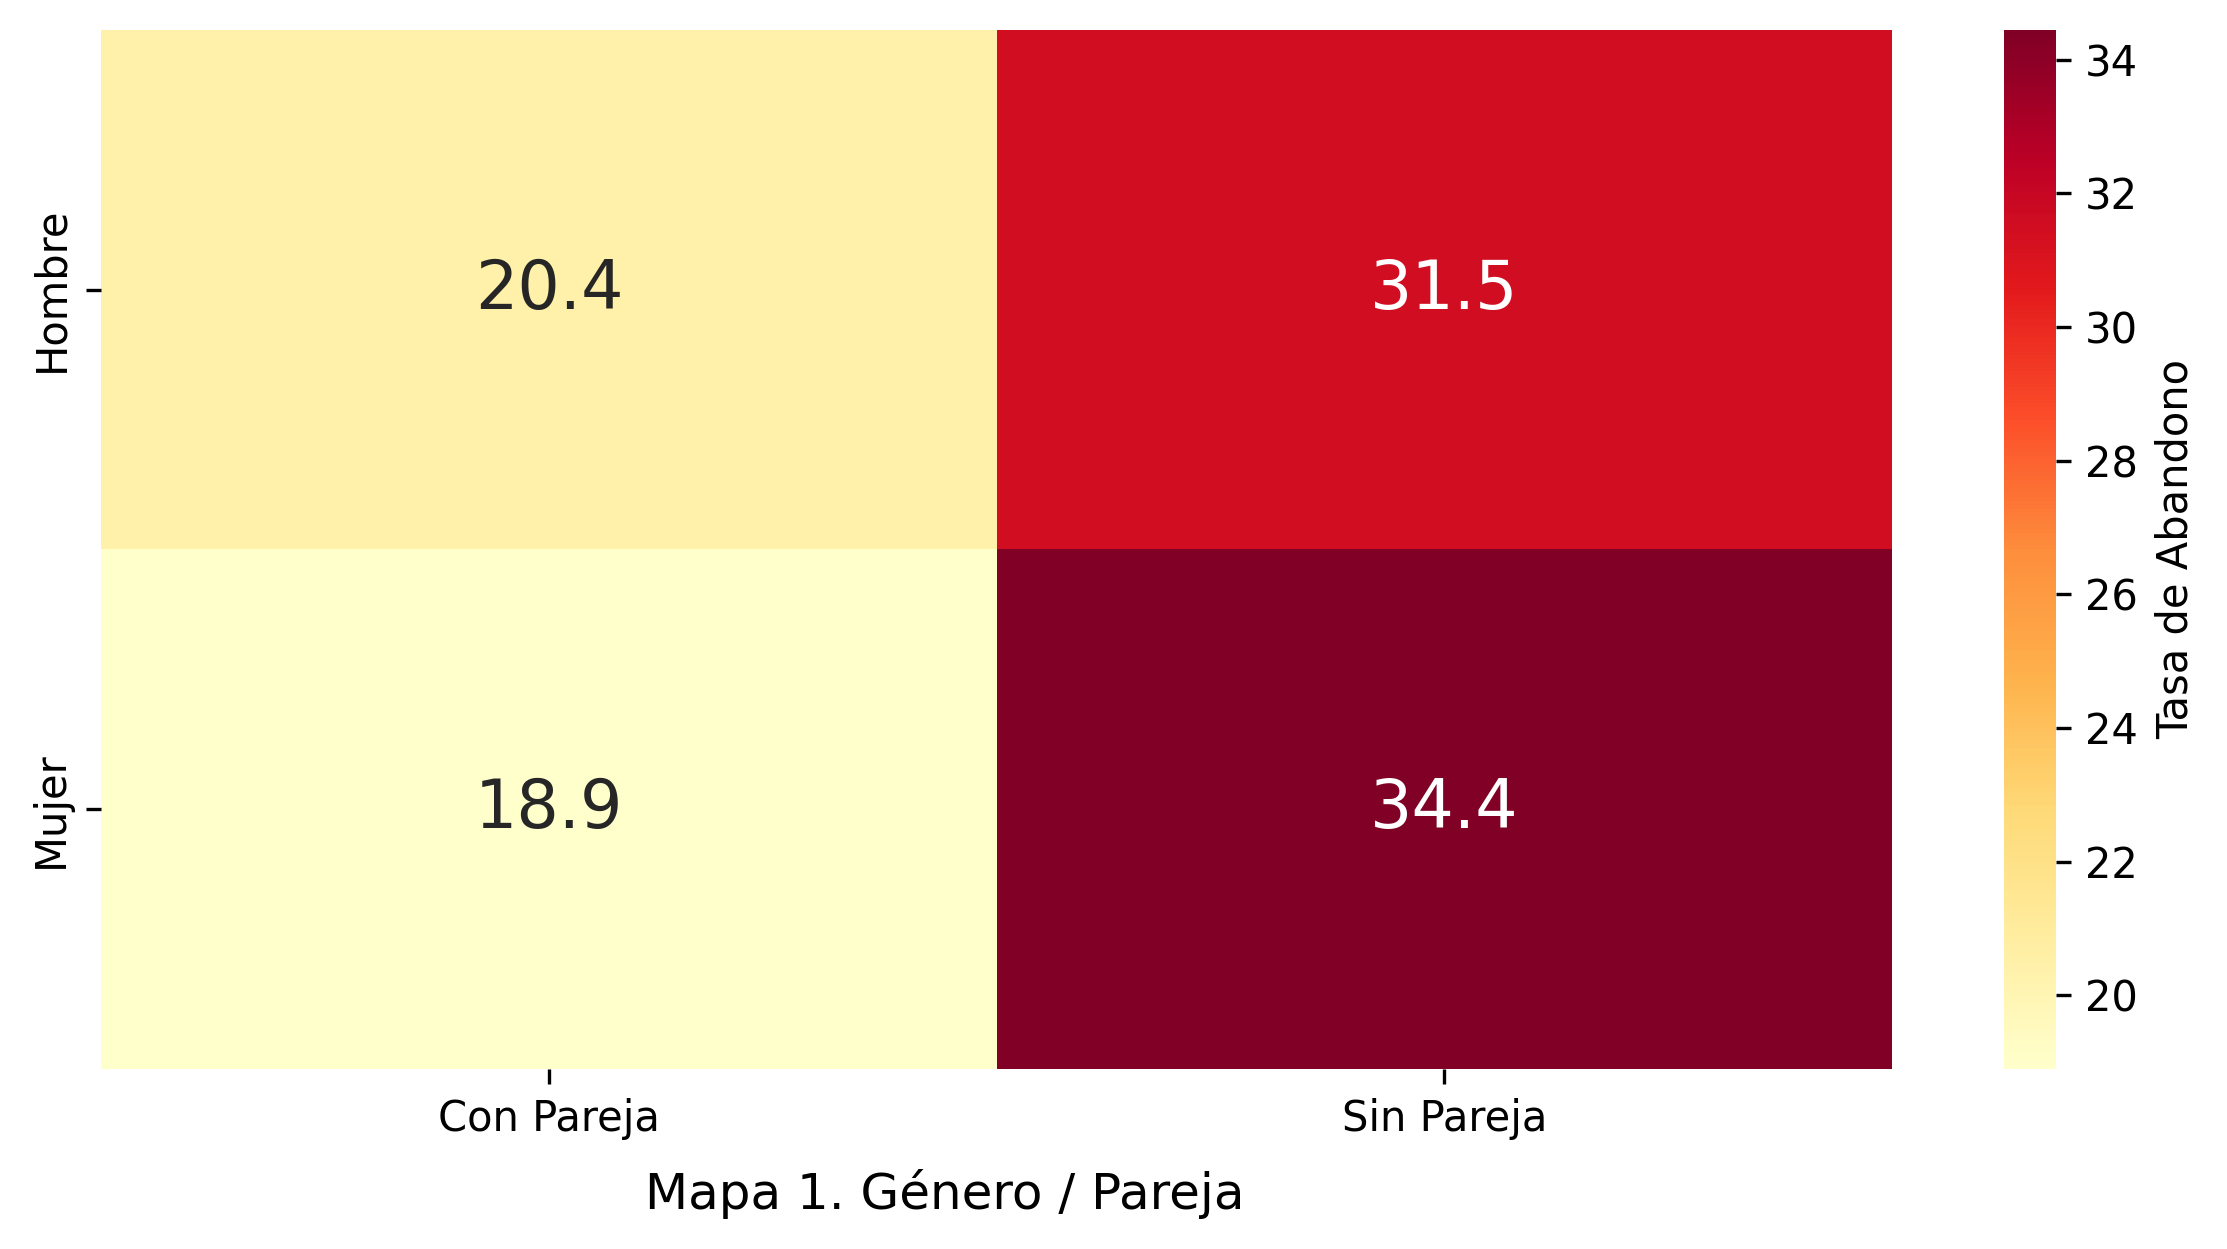

In [73]:
Image('/content/map_01_heatmap_genero_pareja.png',width=700)



---


El Mapa 1 nos muestra que las **personas con pareja** tiene tasas de abandono signficativamente más bajas que las personas sin pareja, sin mayores diferencias entre hombres y mujeres


---



###**Género - Dependientes**

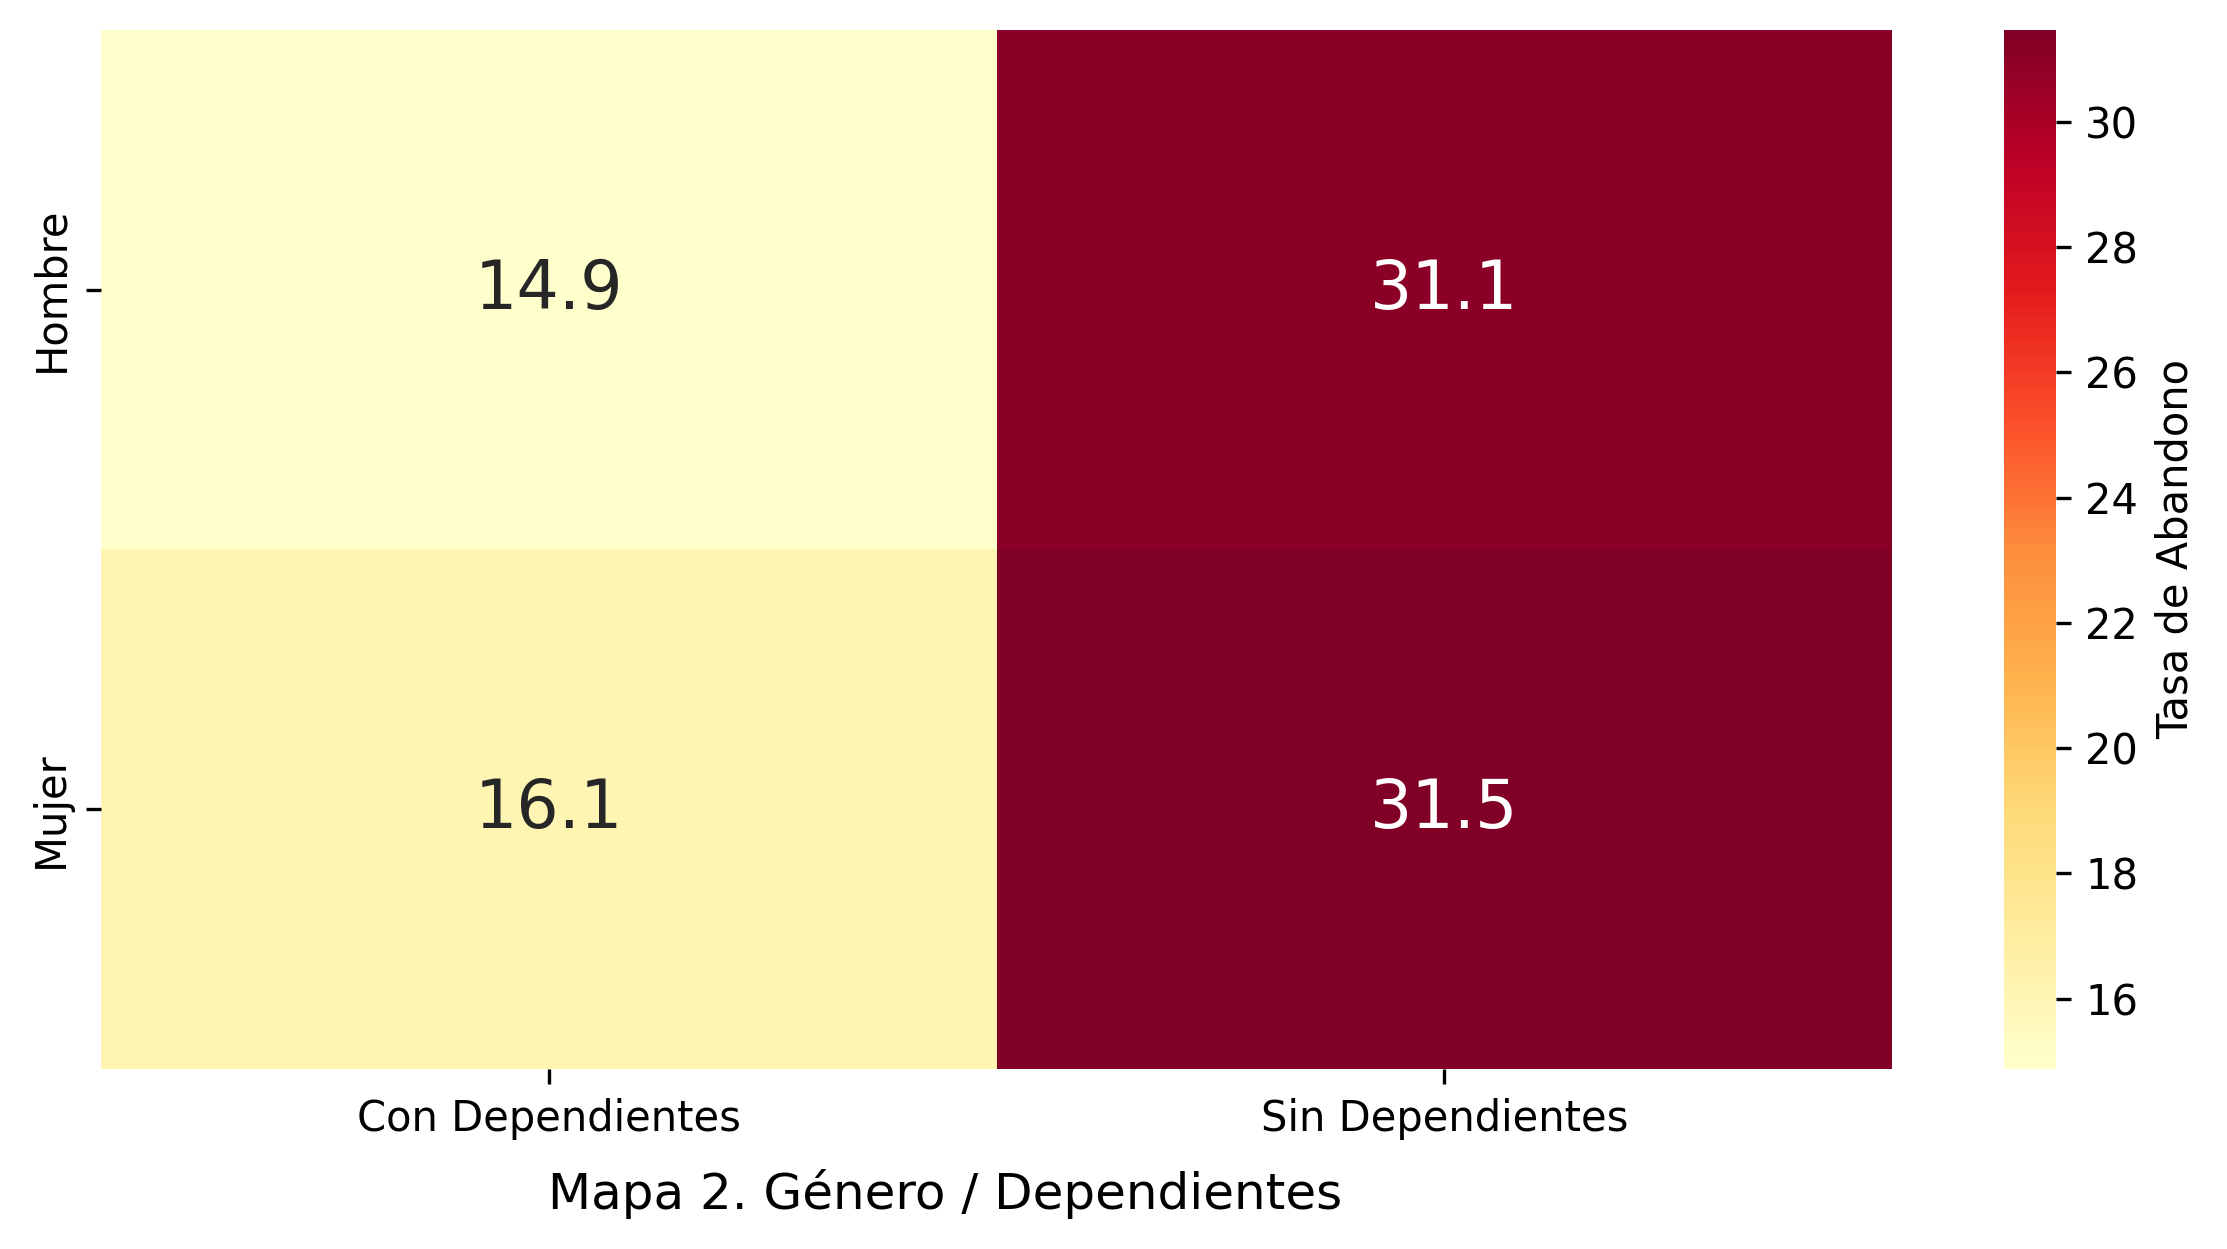

In [74]:
Image('/content/map_02_heatmap_genero_dependientes.png',width=700)



---


Similar al Mapa 01, el Mapa 2 nos muestra que las **personas con dependientes** tienen tasas de abandono signficativamente más bajas que las personas sin dependientes, sin mayores diferencias entre hombres y mujeres


---



###**Género - Senior Citizen**

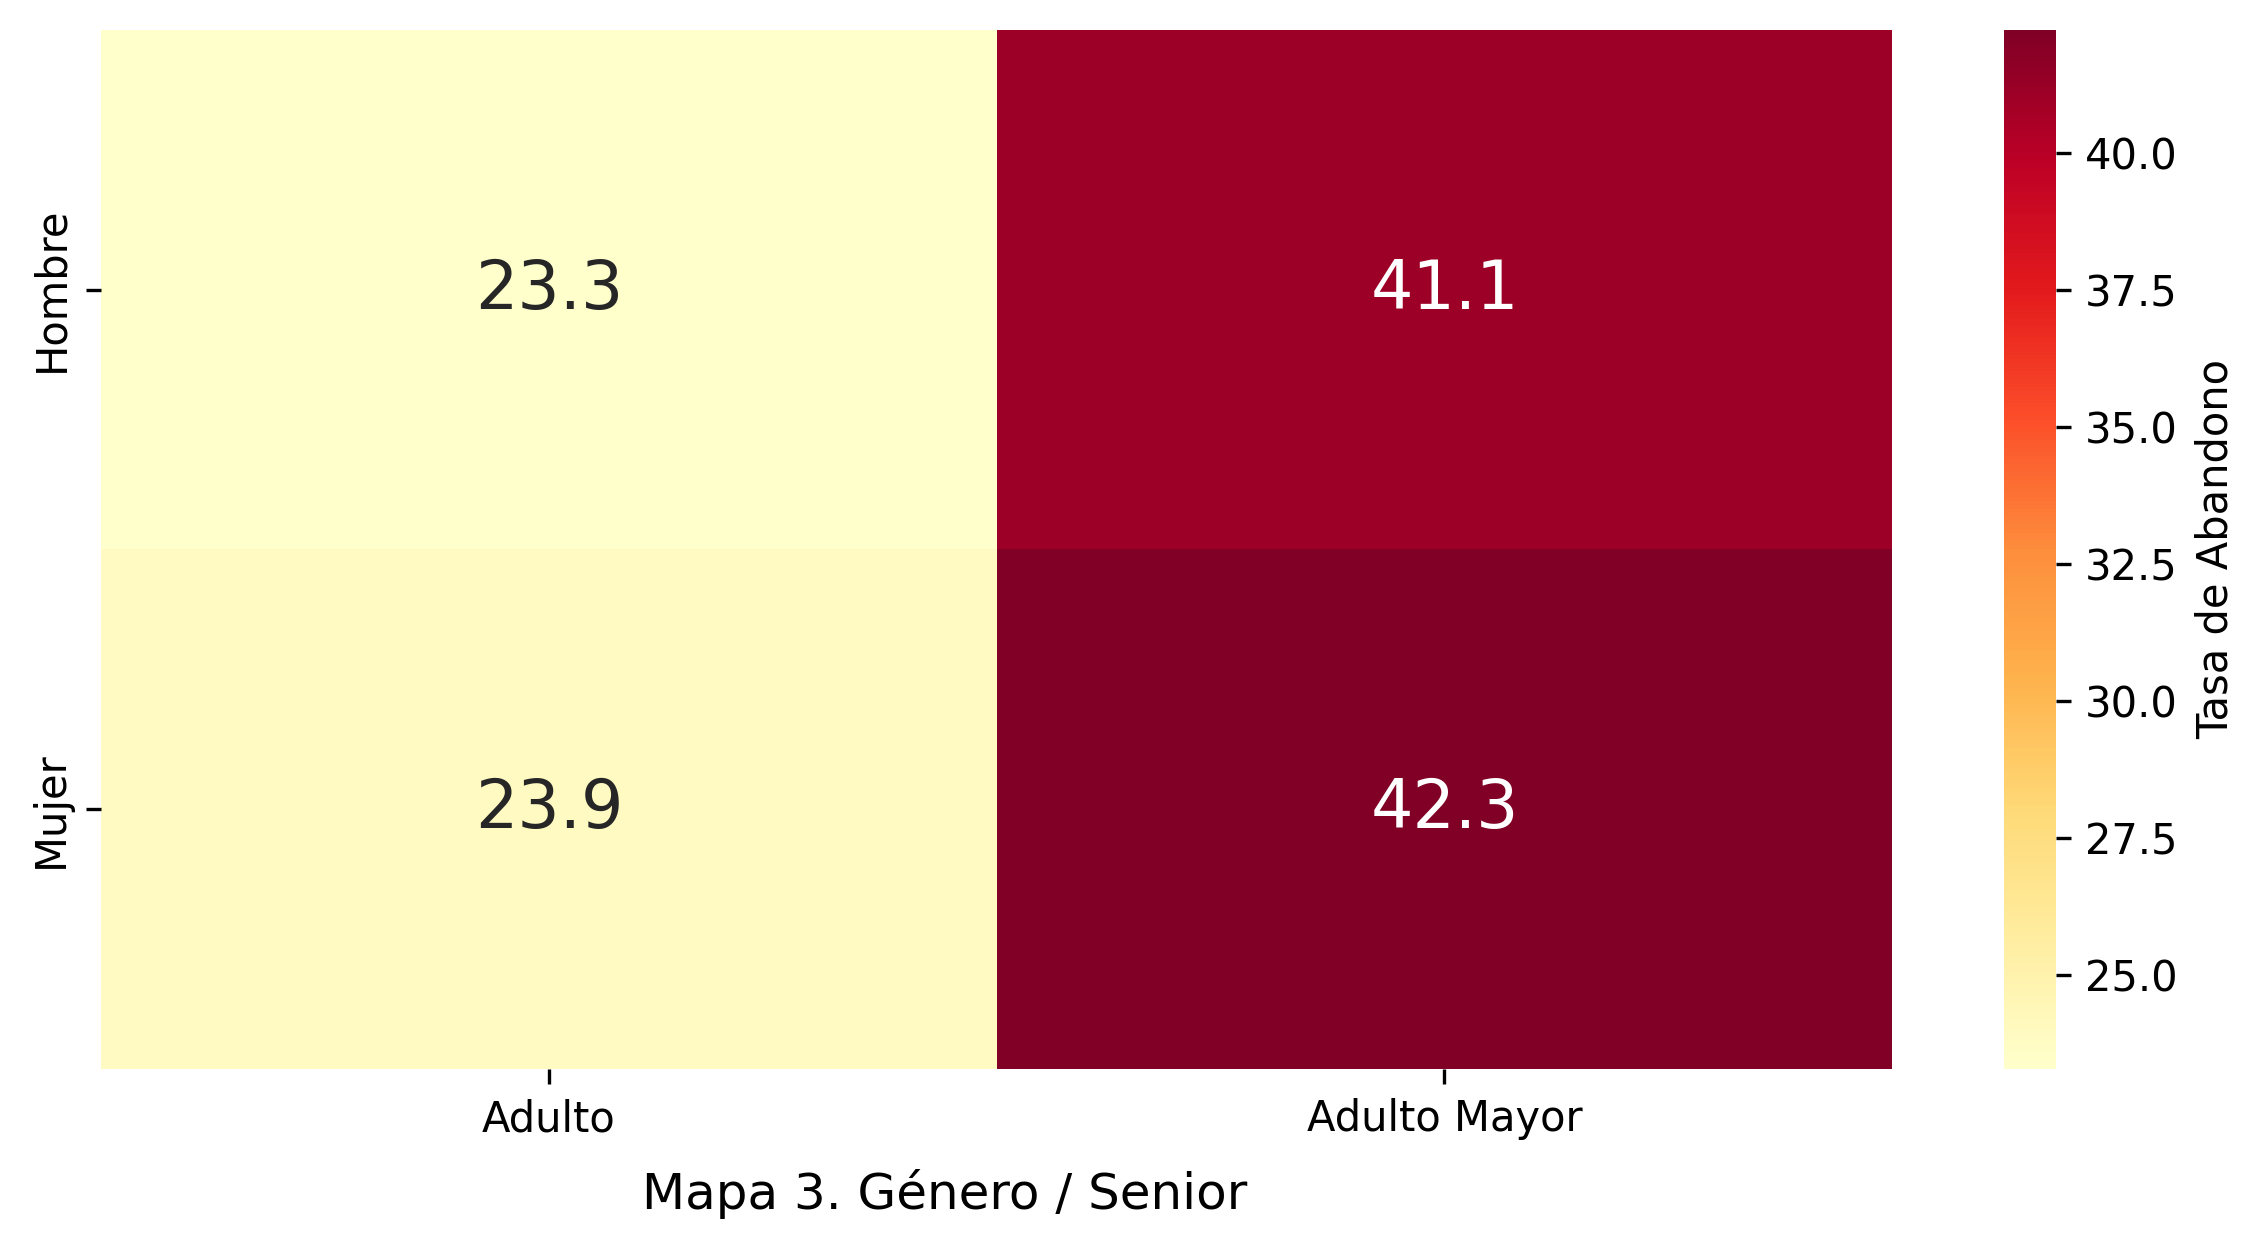

In [75]:
Image('/content/map_03_heatmap_genero_senior.png',width=700)


---
El Mapa 3 nos muestra que los **Adultos Mayores**, tanto hombres como mujeres, son notablemente más propensos a abandonar los servicios.

---

###**Género - Servicios de Internet**

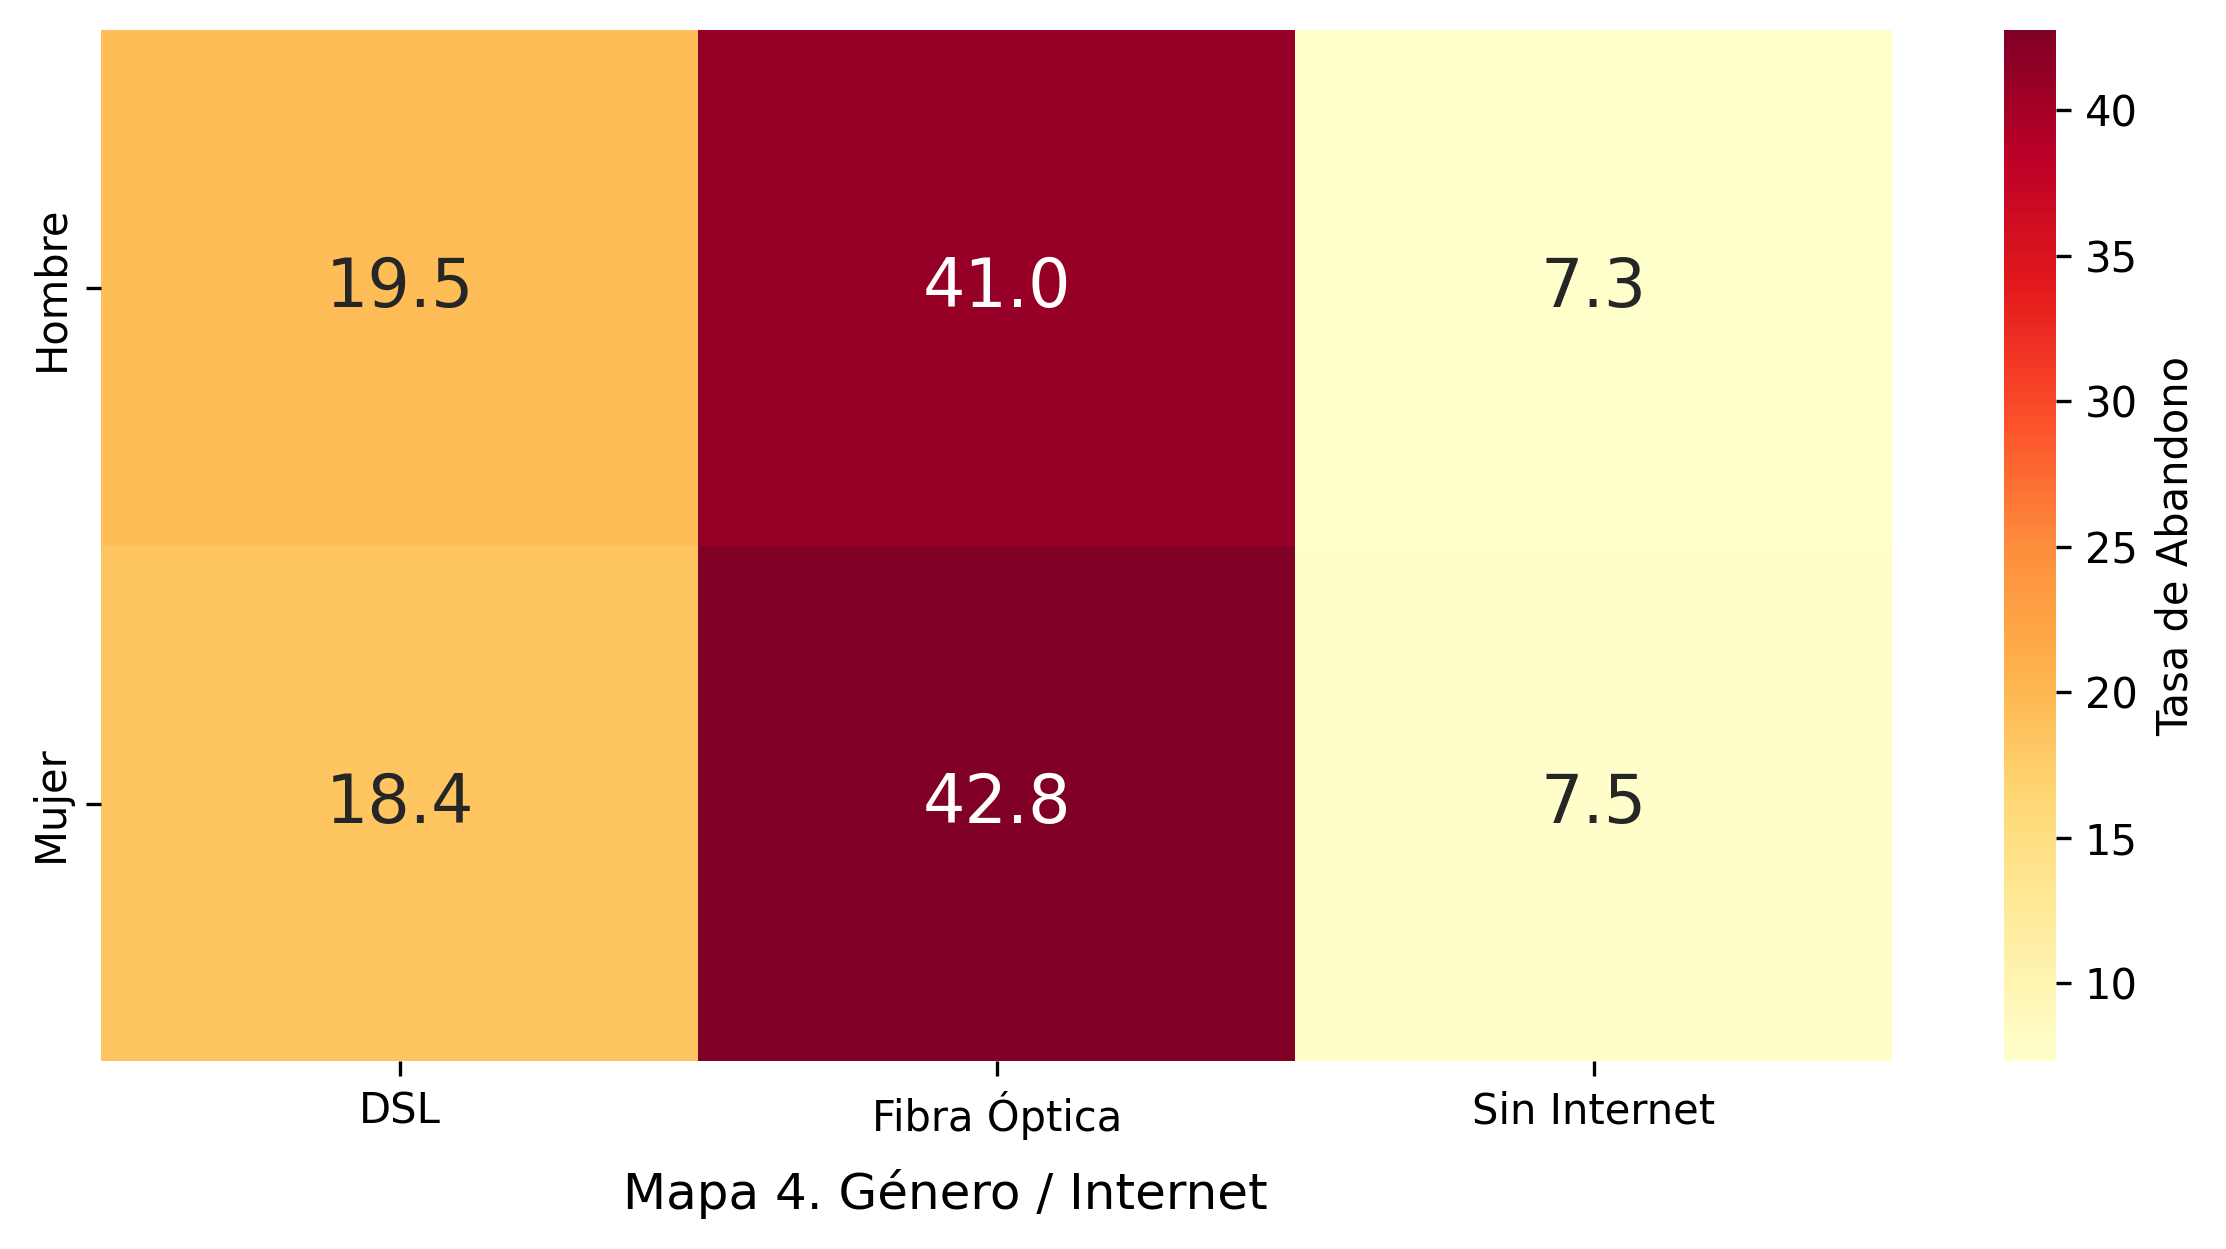

In [76]:
Image('/content/map_04_heatmap_genero_internet.png',width=700)



---

El Mapa 4 nos muestra que el Servicio de Internet vía **Fibra Óptica** es el que tiene la más alta de abandono.

---



###**Género - Tipo de Contrato**

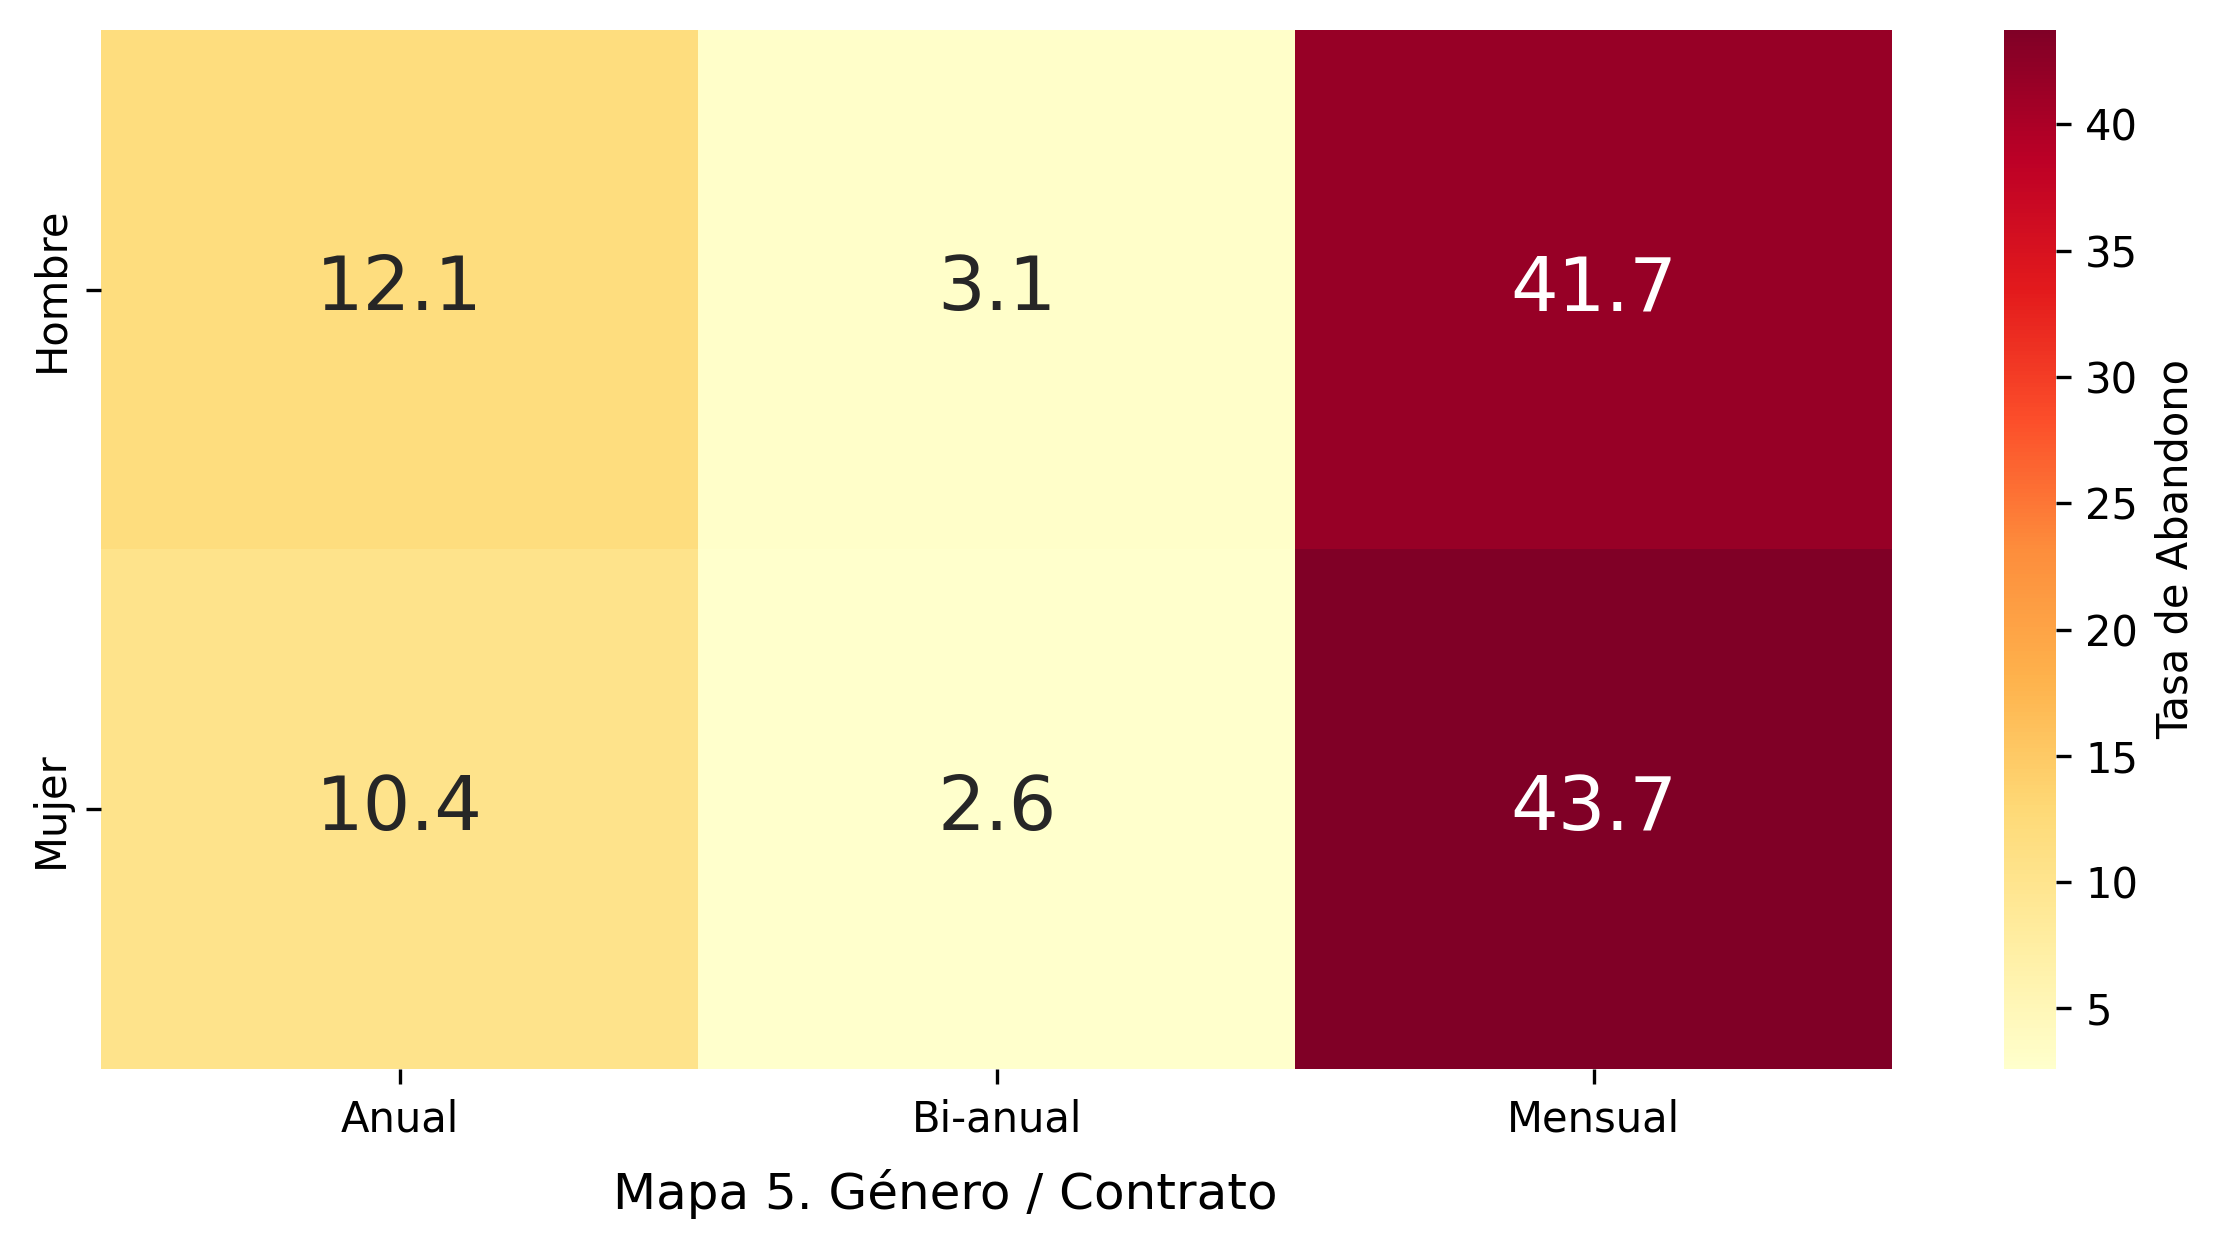

In [77]:
Image('/content/map_05_heatmap_genero_contrato.png',width=700)



---

El Mapa 5 nos muestra que los **Contratos mensuales** son los menos fieles, sin mayores diferencias entre hombres y mujeres.


---



###**Pareja - Dependientes**

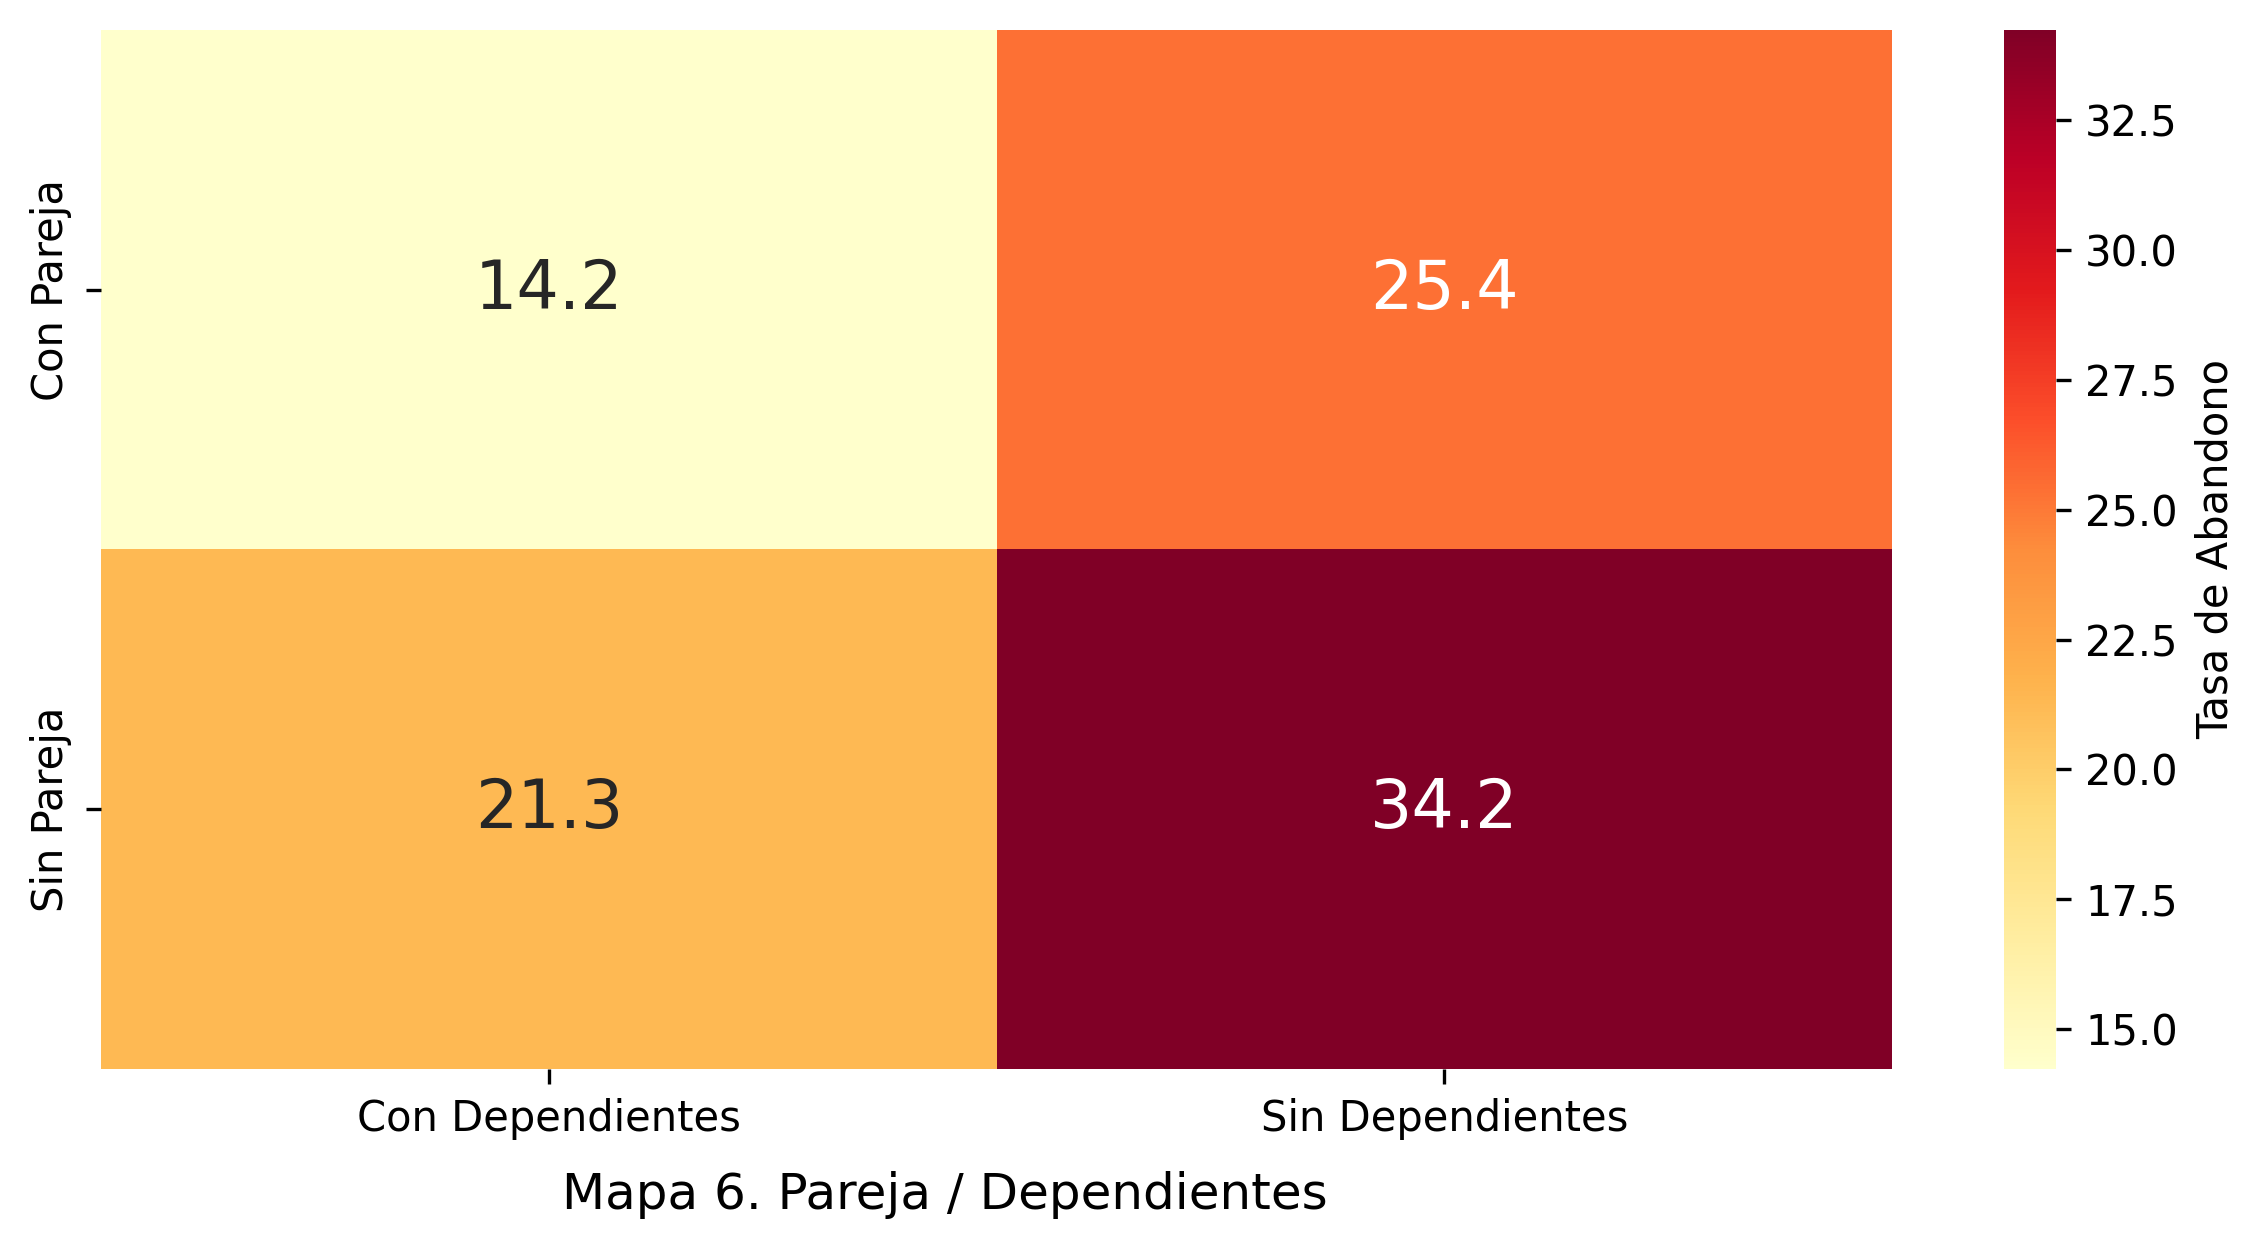

In [78]:
Image('/content/map_06_heatmap_partner_dependientes.png',width=700)



---
El Mapa 6 es muy ilustrativo, porque nos muestra que las **personas con pareja** y **con dependientes** son significativamente más propensas a mantenerse en la compañía. Y por el contrario, los clientes sin pareja y sin dependientes son más propensos a abandonar.


---





###**Con Pareja - Senior Citizen**

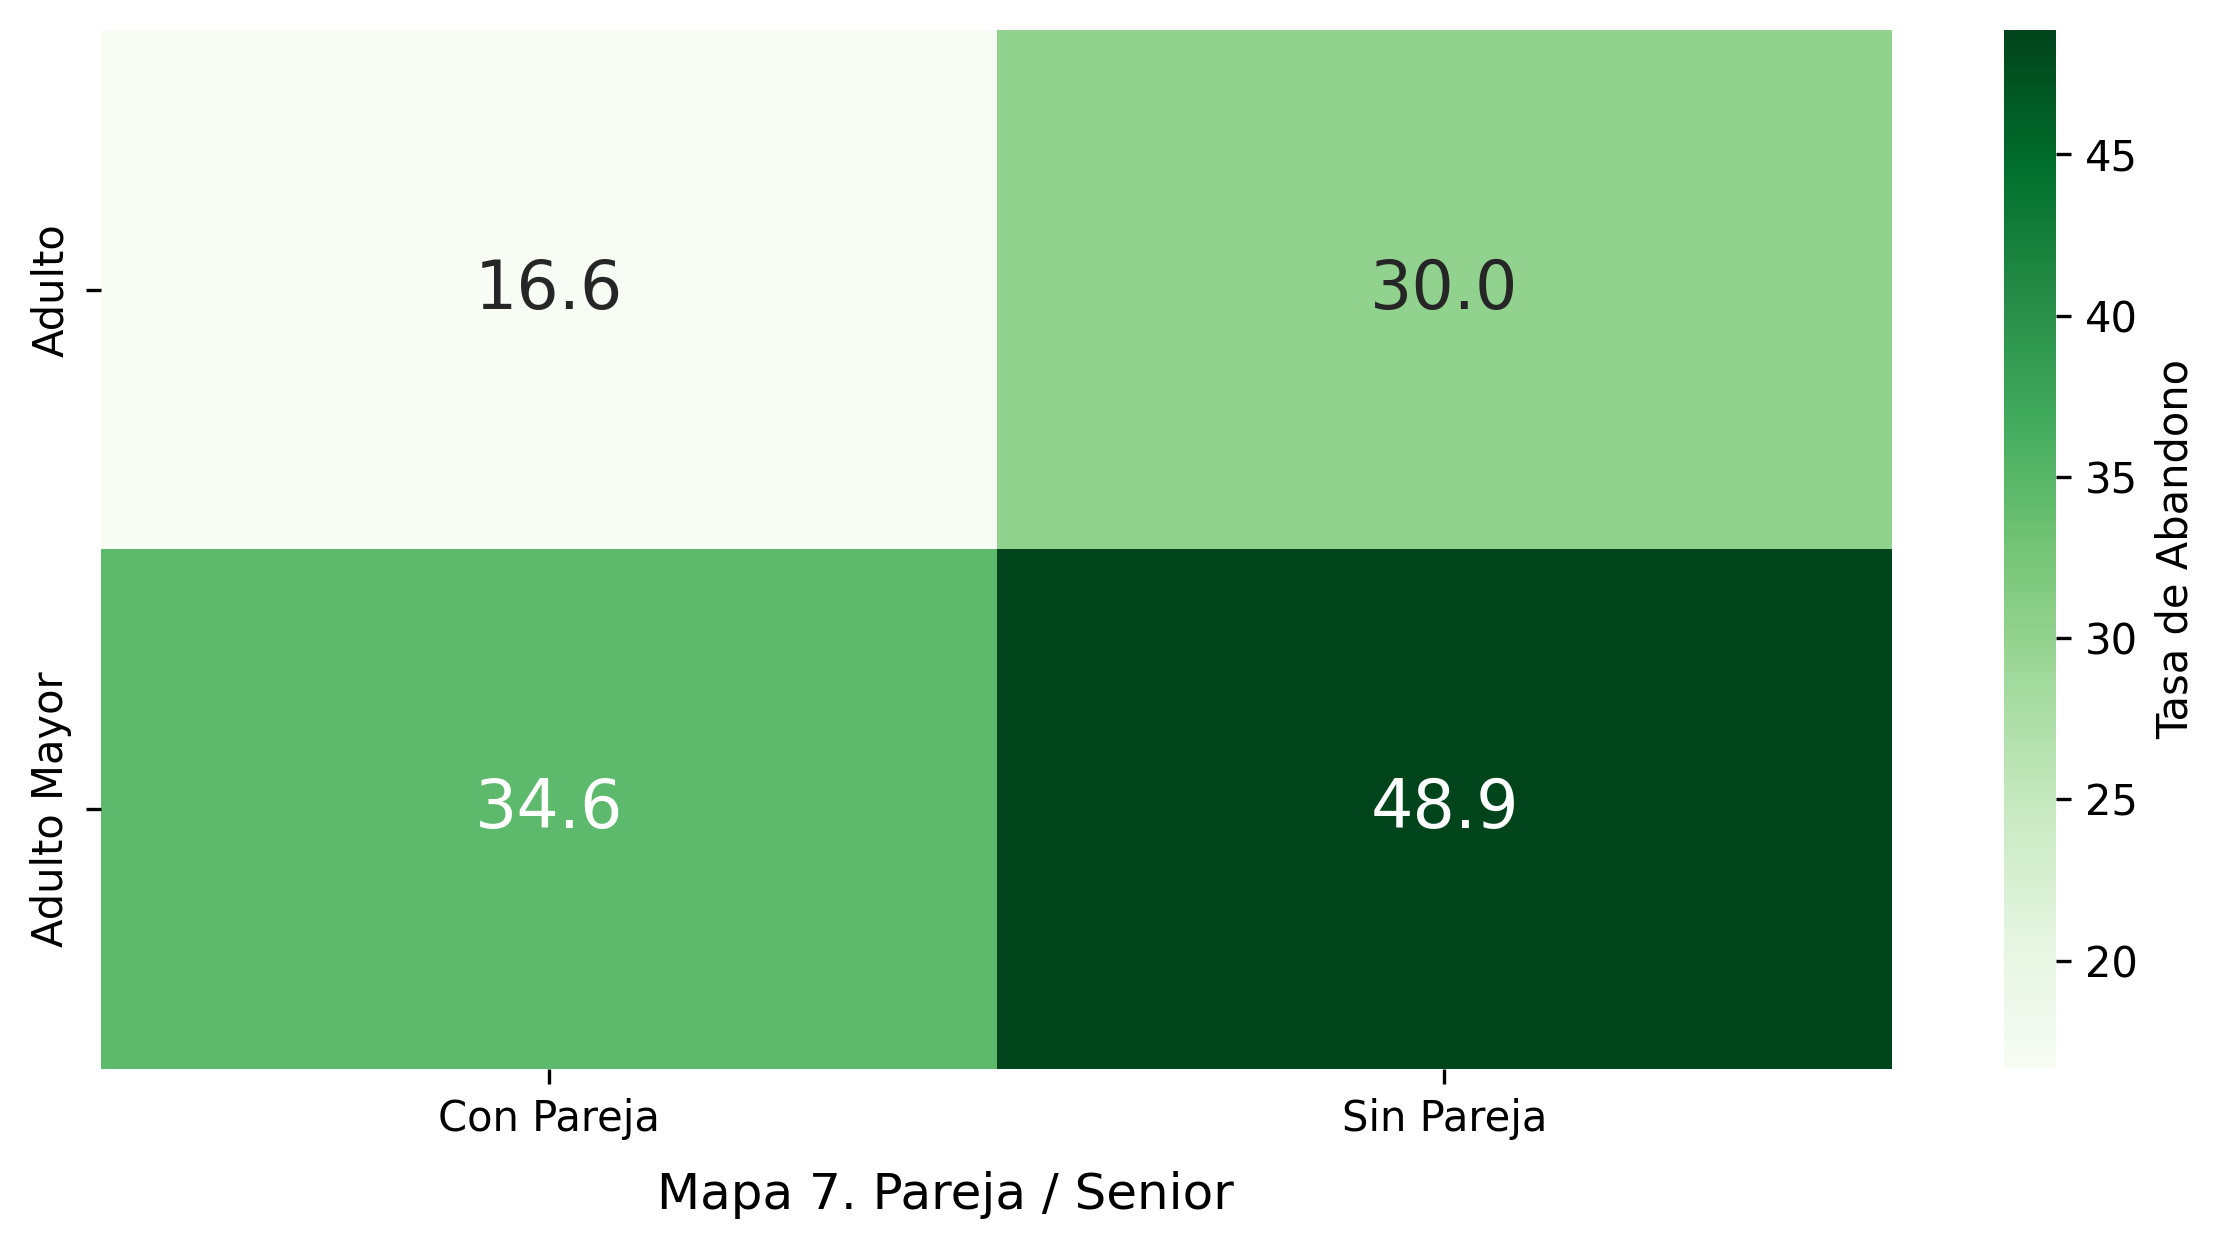

In [79]:
Image('/content/map_07_heatmap_senior_pareja.png',width=700)



---

El Mapa 7 nos muestra que los **adultos mayores, sin pareja**, tienen la tasa de abandono más alta.

---



###**Pareja - Servicio de Internet**

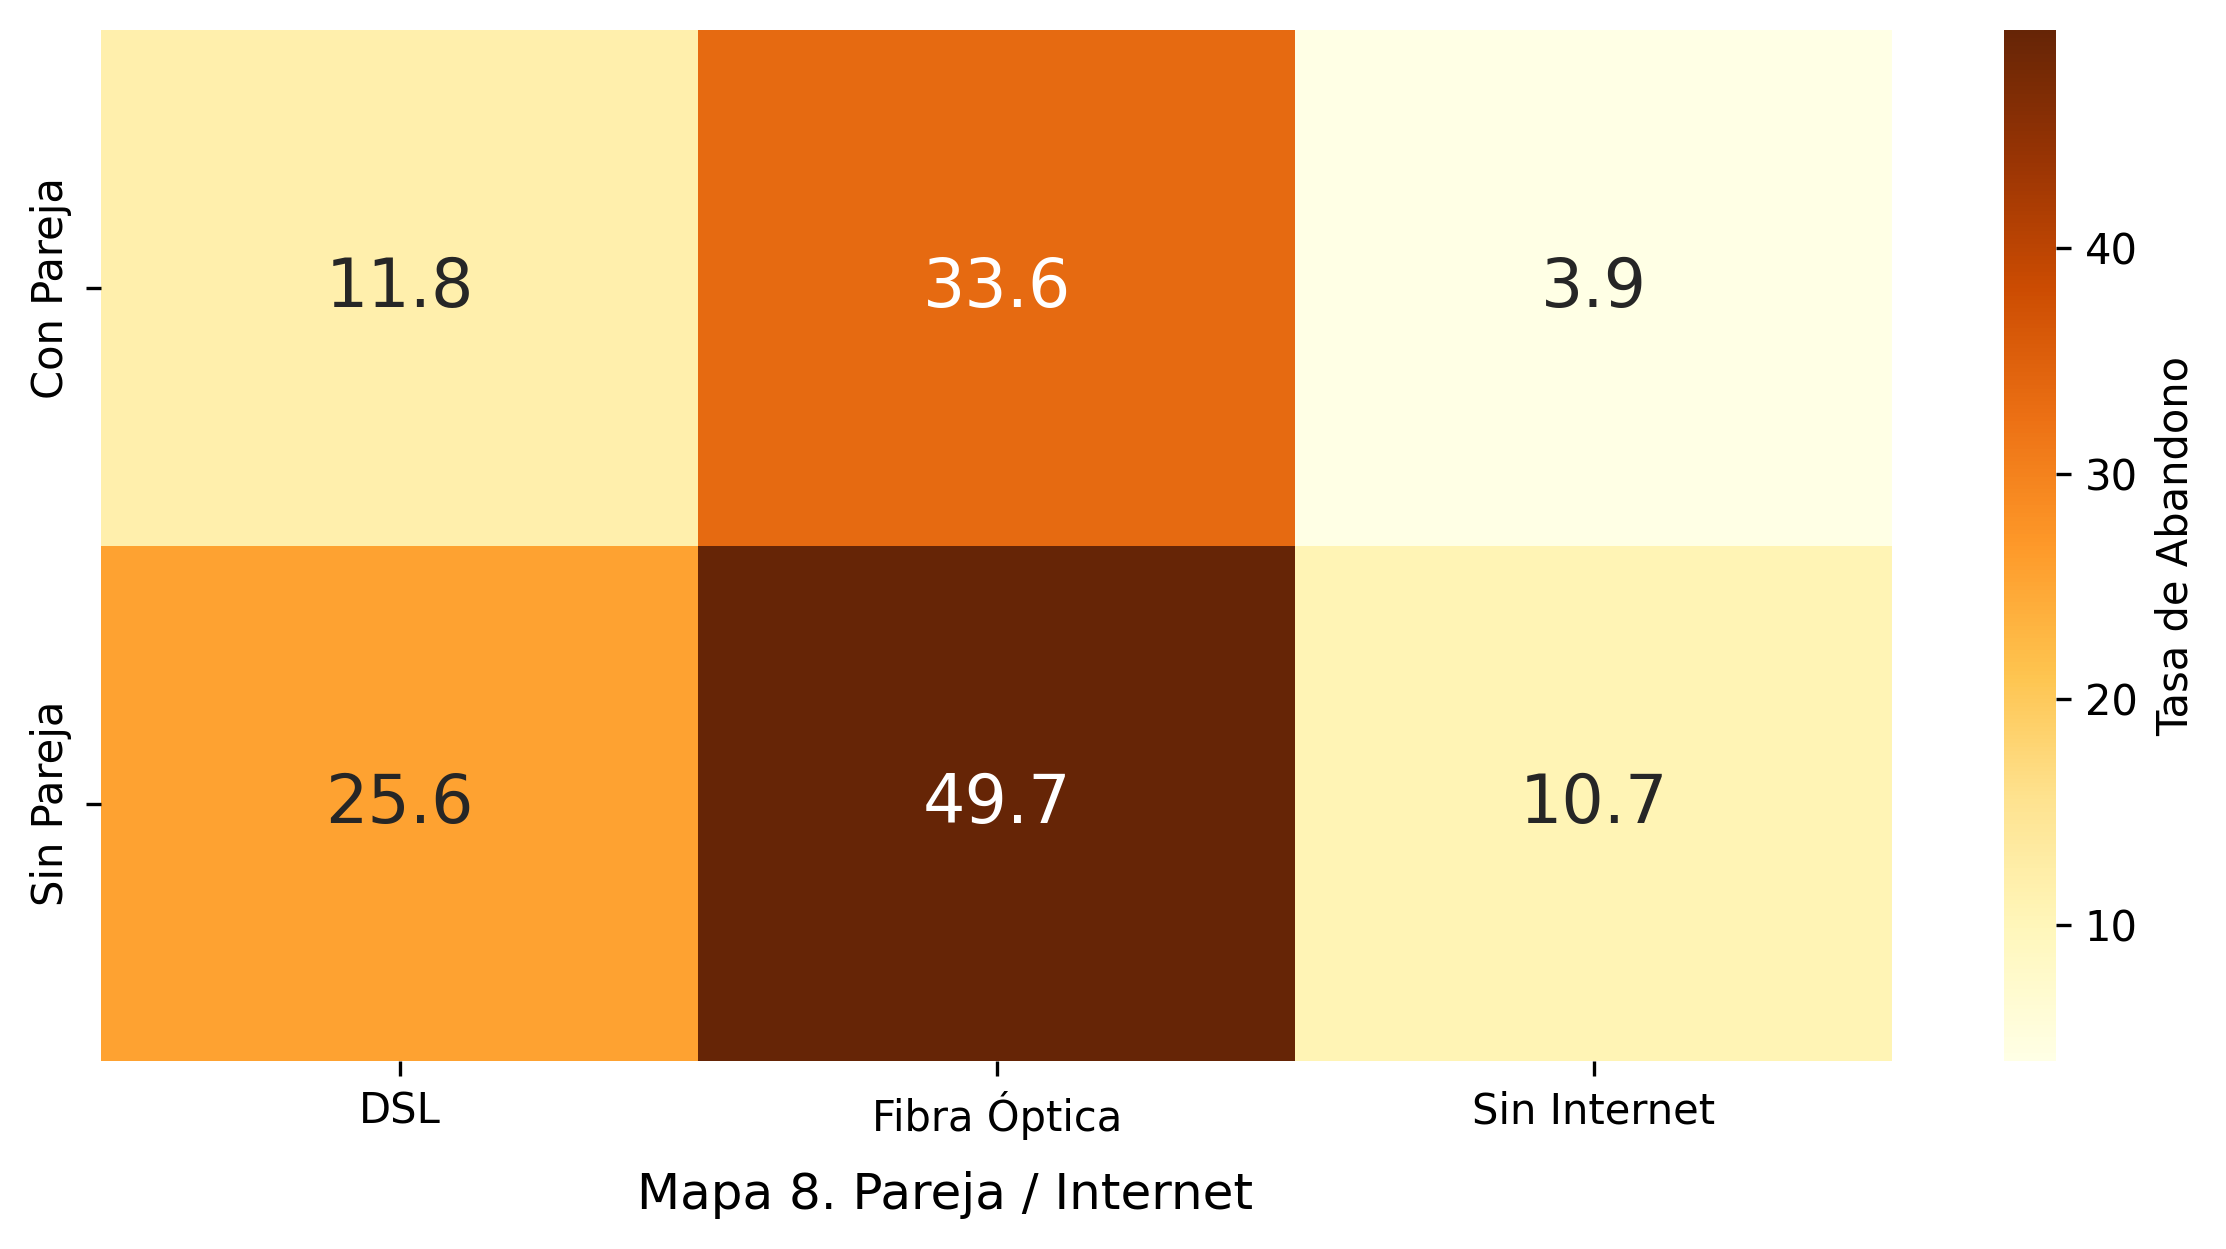

In [80]:
Image('/content/mapa_08_heatmap_pareja_internet.png',width=700)



---

El Mapa 8 nos muestra que la **Fibra Óptica** es la más influyente en la tasa de abandono, variando un poco si el cliente tiene o no pareja.


---



###**Pareja - Tipo de Contrato**

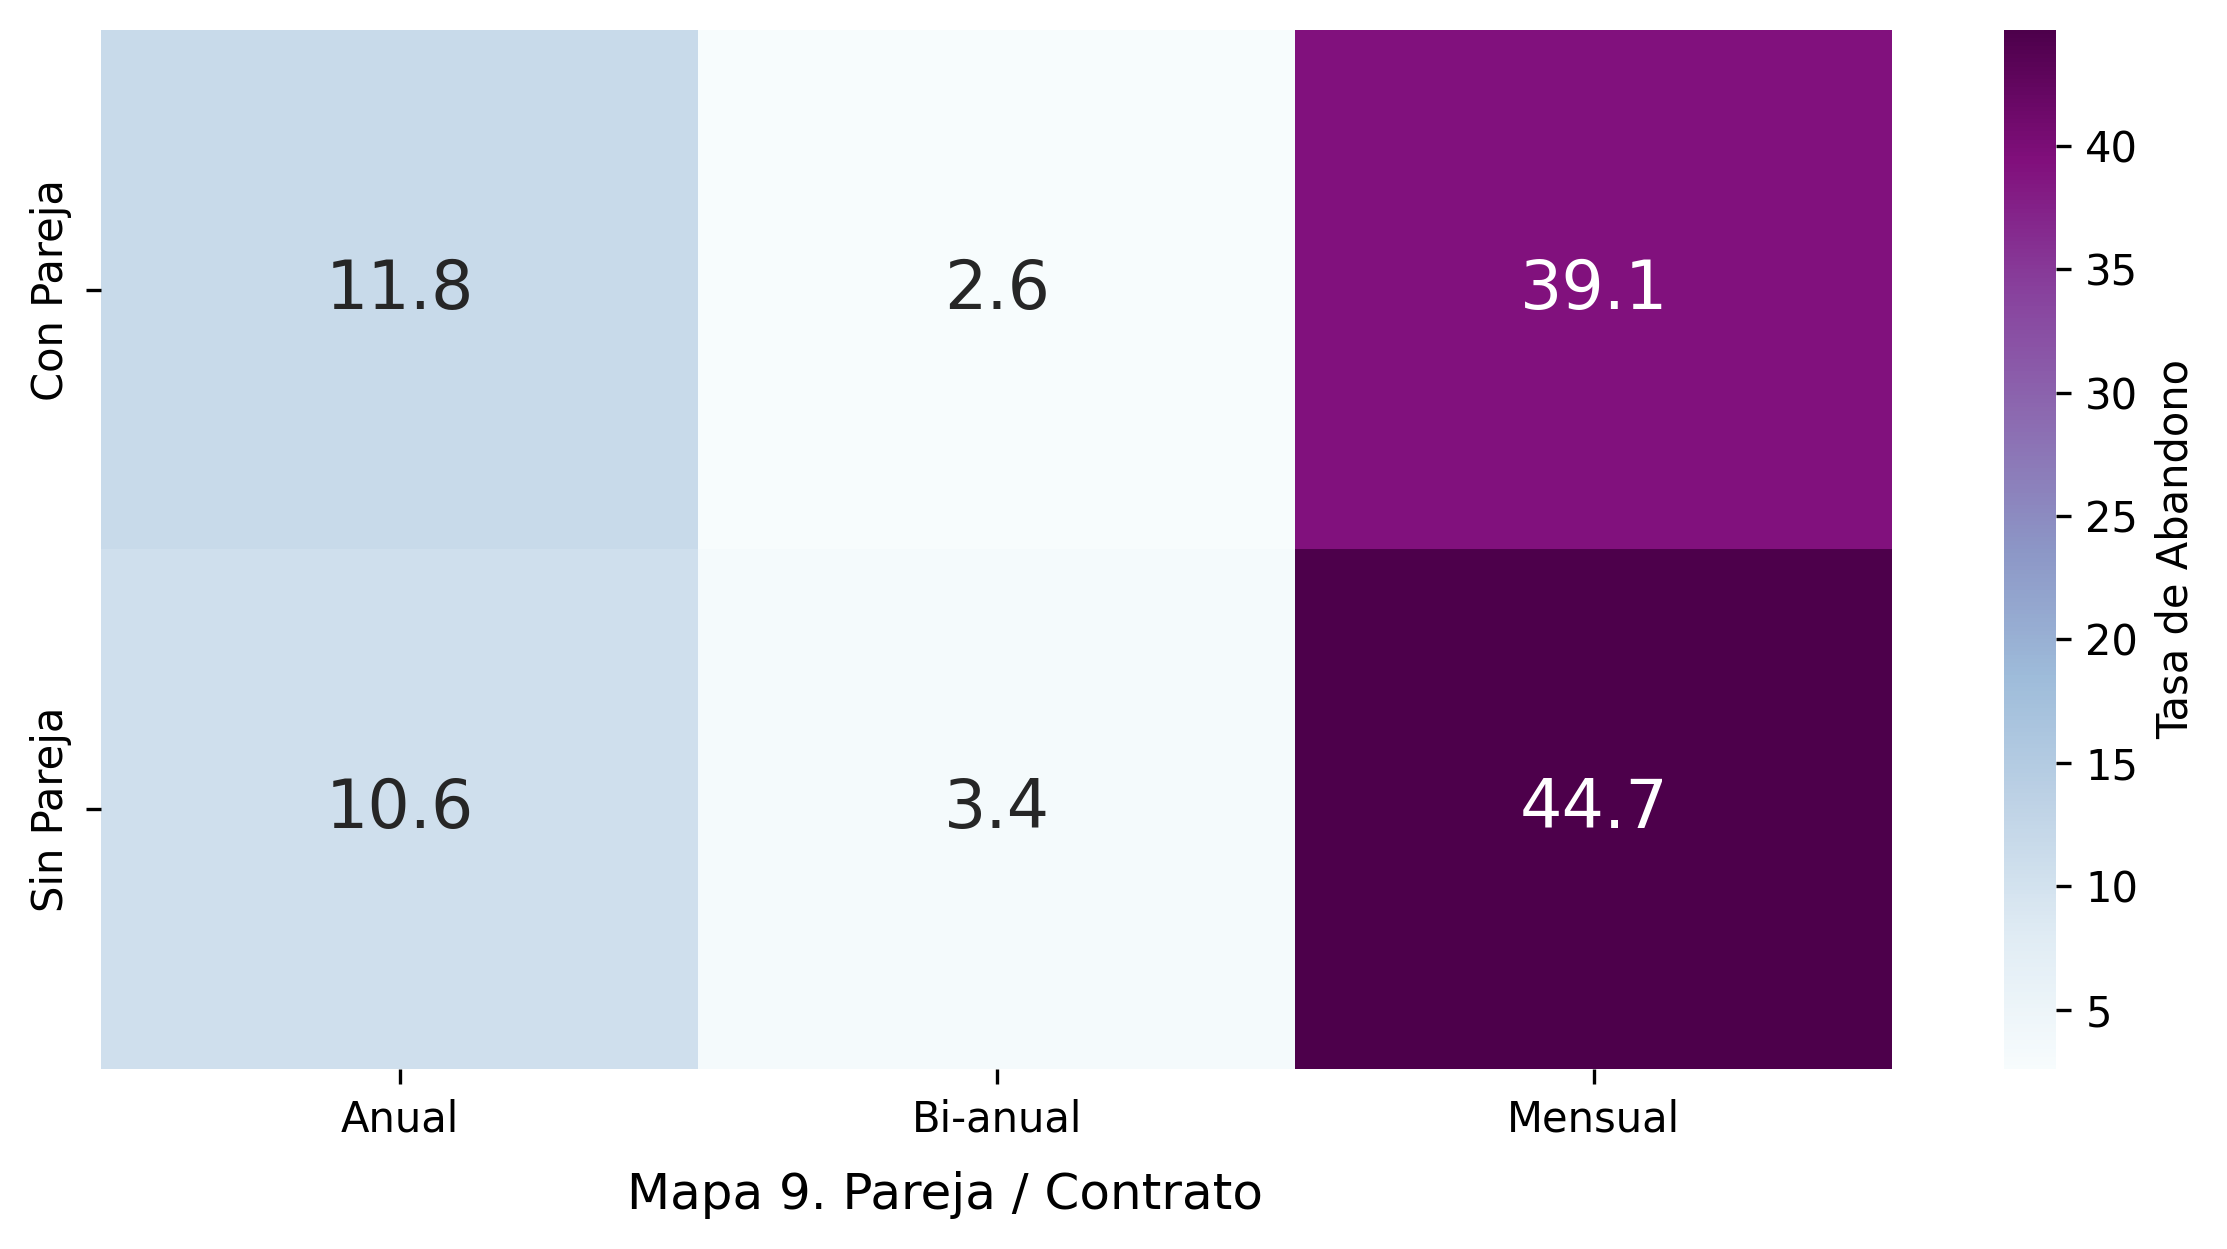

In [81]:
Image('/content/mapa_09_heatmap_pareja_contrato.png',width=700)



---

El Mapa 9 nos muestra una vez más que los **Contratos mensuales** son los más débiles para retener a los clientes.


---



###**Tipo de Contrato - Servcios de Internet**

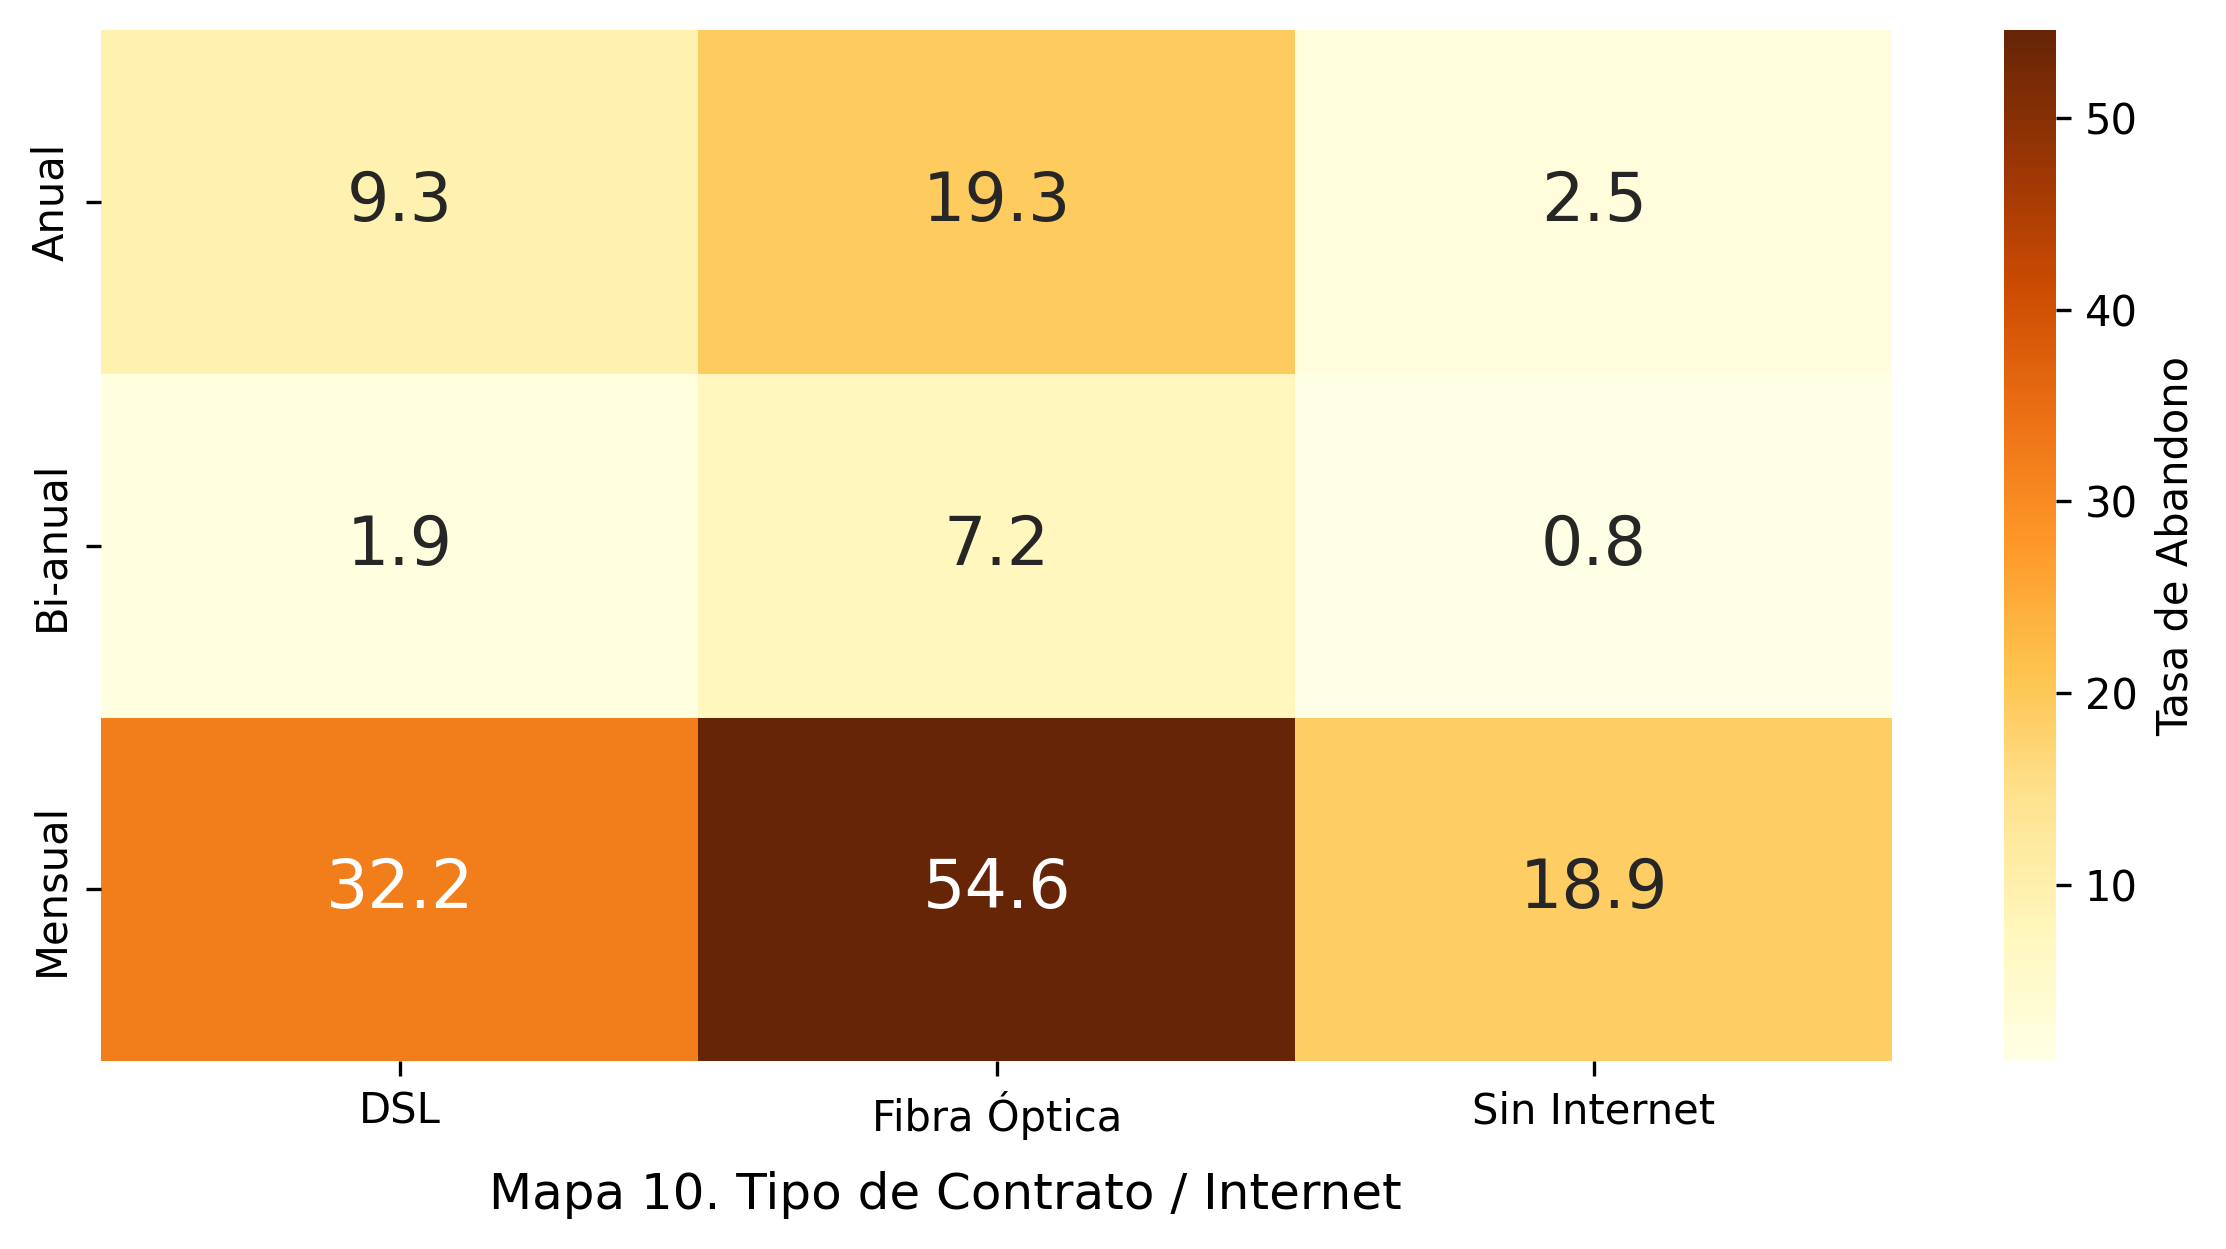

In [82]:
Image('/content/mapa_10_heatmap_contrato_internet.png',width=700)



---

El Mapa 10 confirma que la combinación de tasa más alta de abandono es la de **Contratos Mensuales** con **Fibra Óptica**.


---



###**Distribución de abandonos según cargos mensuales**

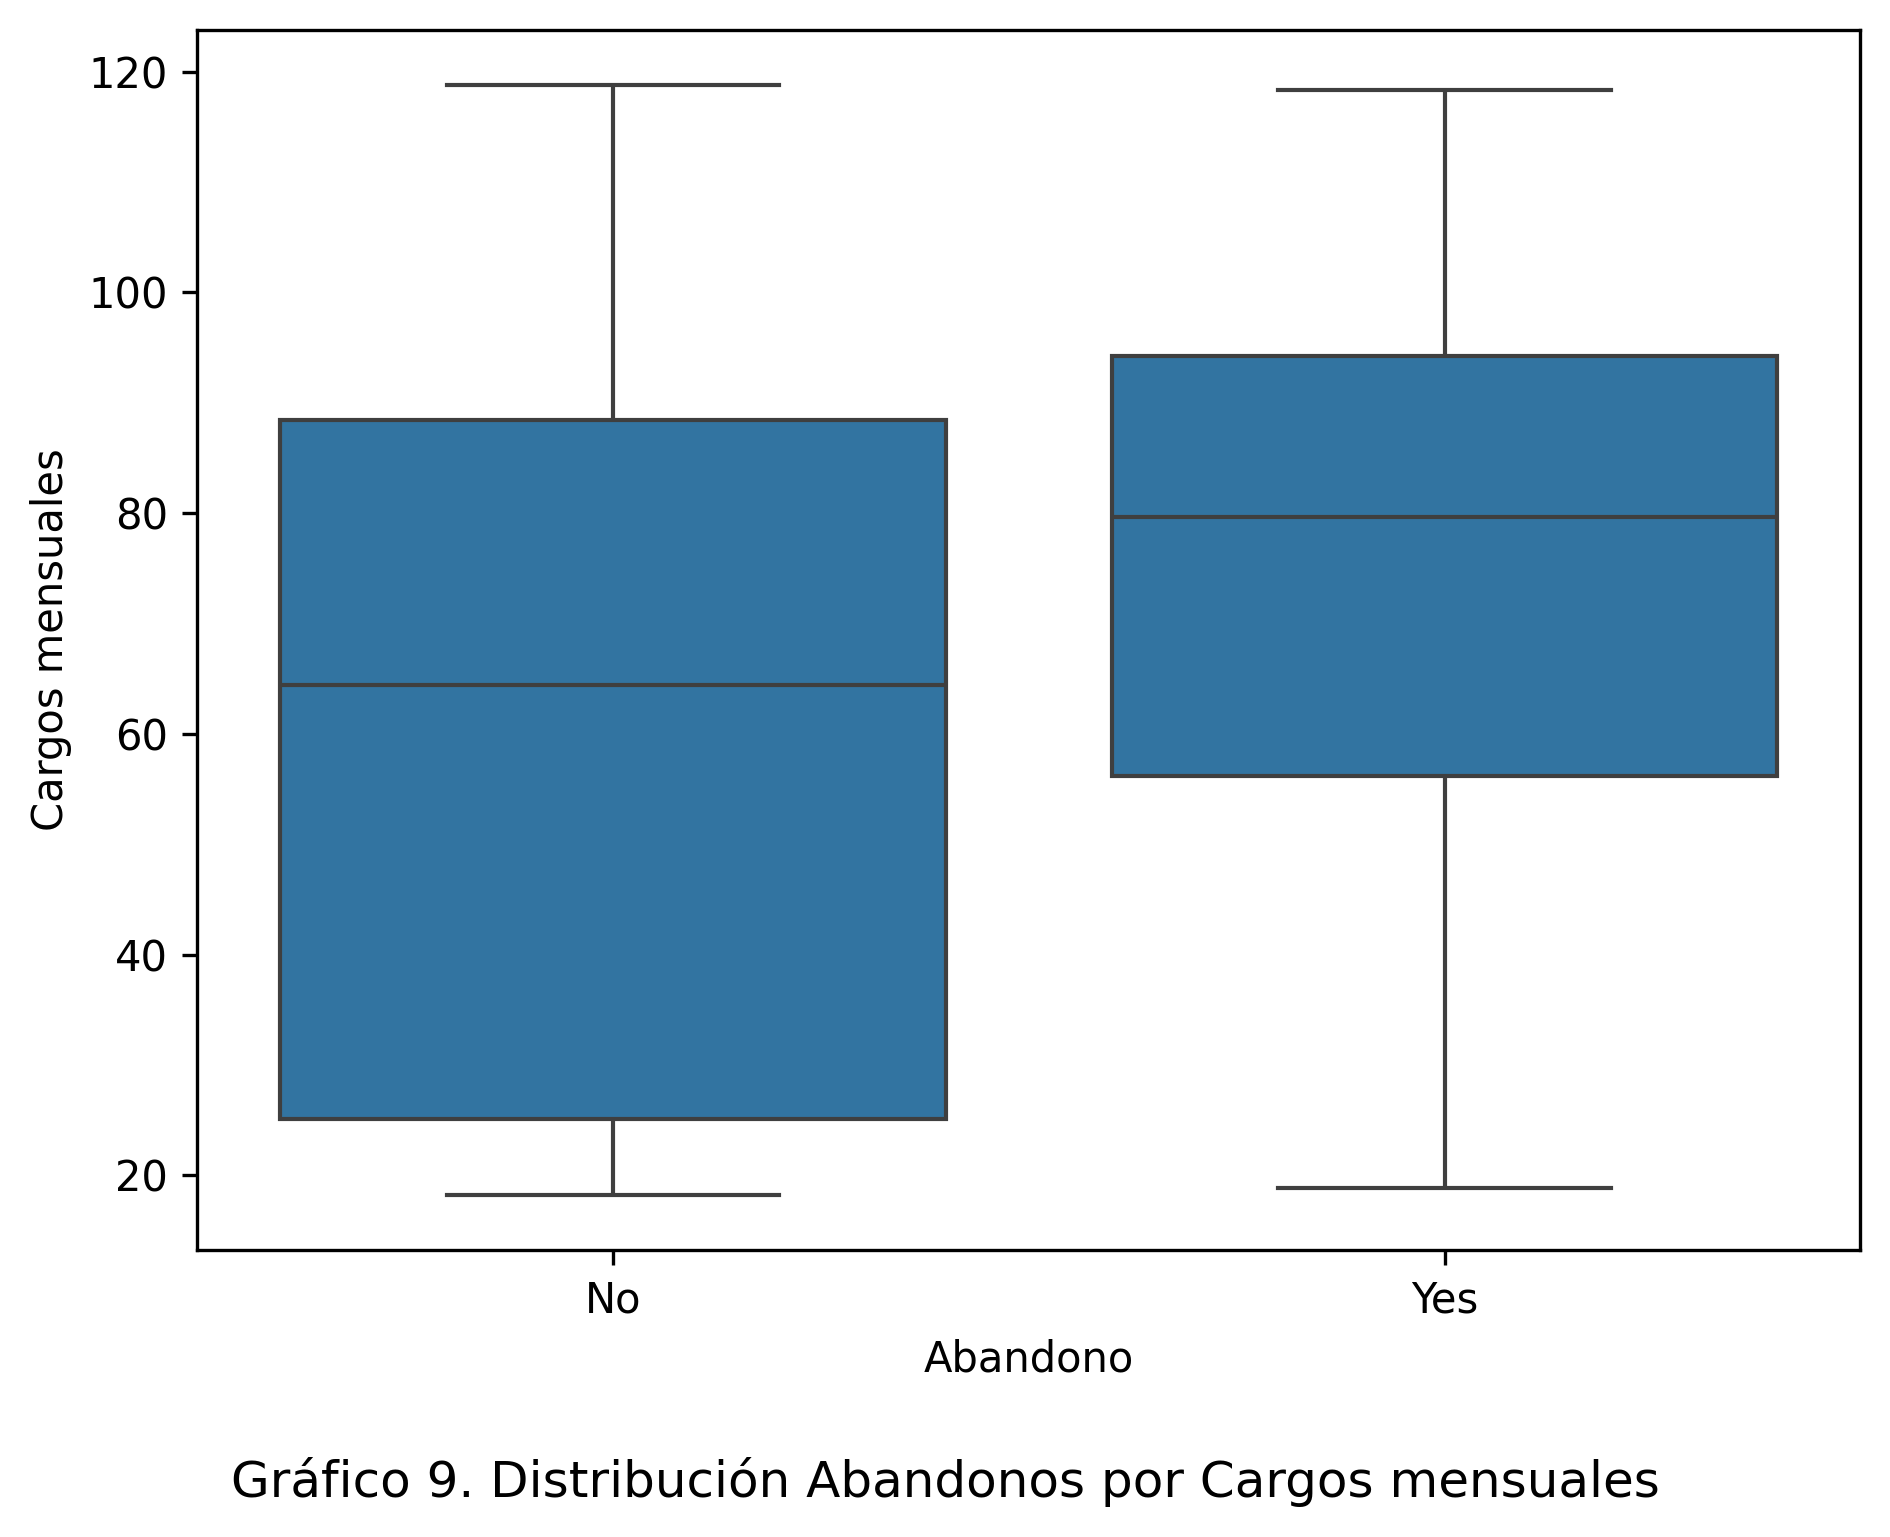

In [83]:
Image('/content/graf_09_boxplot_charges_monthly.png',width=600)



---

El Gráfico 9 es muy ilustrativo, porque nos muestra que la tasa de abandonos es sensible a los cargos mensuales.

Los clientes que abandonan los servicios promedian cargos mensuales superiores a los clientes que permanecen en la compañía.


---



Veamos cómo varía esta distribución considerando la situación de pareja de los clientes.



Tenemos cuatro grupos:


1.   **No / Partner: No**:	Clientes sin pareja que NO abandonaron
2.   **No / Partner: Yes**:	Clientes con pareja que NO abandonaron
1.   **Yes / Partner: No**:	Clientes sin pareja que abandonaron
2.   **Yes / Partner: Yes**:	Clientes con pareja que abandonaron




---


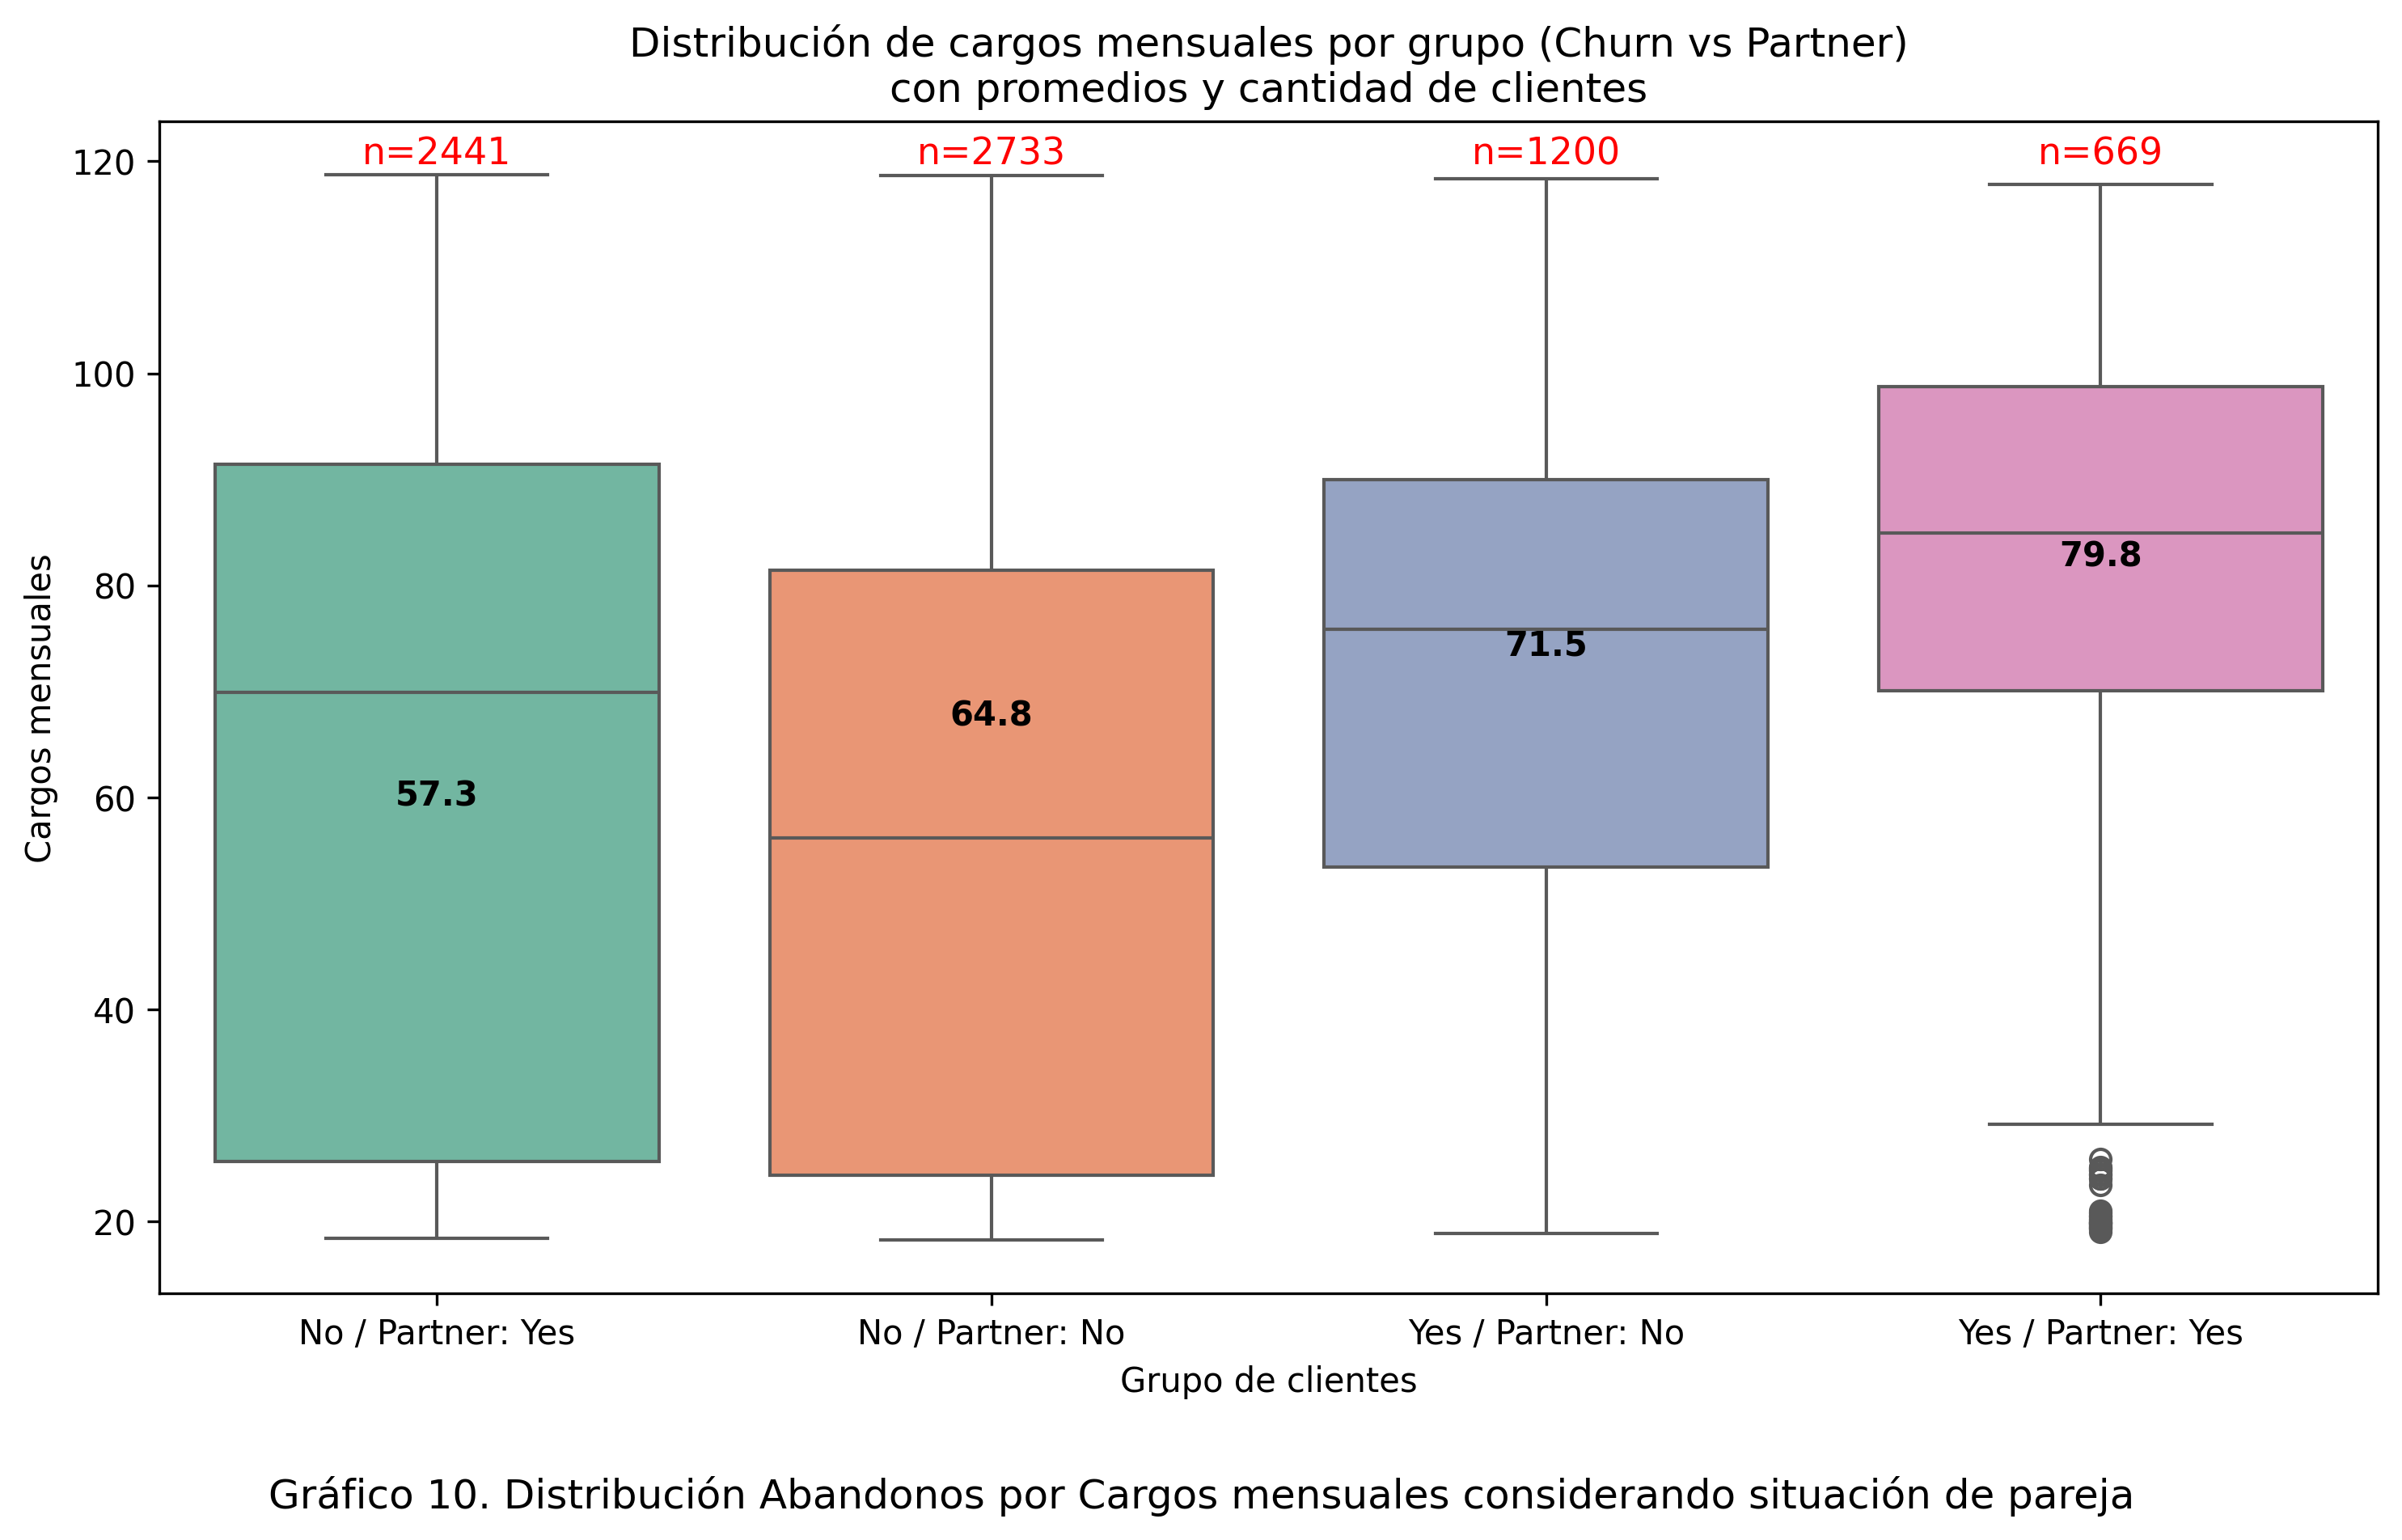

In [84]:
Image('/content/graf_10_boxplot_charges_monthly_partner.png',width=800)



---



**Comparando solo abandonos (Churn = Yes)**:

El box de **Partner: Yes** tiene una *mediana más alta* que **Partner: No**.

Esto podría interpretarse como que las personas con pareja que abandonan tienden a tener cargos mensuales más altos, lo que sugiere:

La decisión de abandono en personas con pareja podría estar más influenciada por el precio.








**Comparando abandono vs permanencia entre quienes tienen pareja**:

La diferencia entre Yes / Partner: Yes y No / Partner: Yes es mayor que entre los que no tienen pareja, eso puede indicar que:

Tener pareja aumenta el efecto del precio sobre la decisión de abandonar.

## 📊 Conclusiones del Análisis de Deserción de Clientes

---

### **1. Deserción según tiempo de permanencia**
- La deserción más significativa se produce en los **primeros meses** de contratado el servicio.
- Más del **5% de los clientes** abandona en el **primer mes**.
- Comparando con los estándares de la industria, Telecom X debería **reducir la tasa de deserción del primer mes** hacia el **2%**.
- A partir de los **6 meses**, las cifras son mejores que el promedio de la industria.

---

### **2. Características socio-demográficas personales**
#### 📌 Tener pareja y/o dependientes
- Los clientes con **pareja y dependientes** presentan la **tasa más baja de deserción** (14,2%).
- Esto puede estar relacionado con **mayor diversidad de intereses en el hogar**, lo que aumenta la satisfacción.

#### 📌 Ser o no Adulto Mayor
- Los **adultos mayores** son más propensos a desertar, en todas las combinaciones de características.
- Aunque representan un **número reducido**, sus **tasas de deserción son altas** y requieren atención especial.

#### 📌 Género del cliente
- No se observan diferencias significativas entre **hombres** y **mujeres**.

---

### **3. Características asociadas a los servicios contratados**
- El servicio con **mayor tasa de deserción** es **Fibra Óptica**.
- Los servicios de **Tech Support** y **Online Security** tienen las **menores tasas de deserción**.

---

### **4. Sugerencias estratégicas**
Para reducir la deserción en el primer mes:
- Identificar y reducir las **expectativas no cumplidas**.
- Mejorar la experiencia inicial con un **kit de onboarding**.
- Ofrecer **soporte gratuito** el primer mes.
- Implementar **promociones de fidelización**.
- Garantizar la **calidad del servicio** y resolver problemas de forma ágil.

---

## 🎯 Cierre del Análisis
La información obtenida permite concluir que el **mayor desafío para Telecom X** es mejorar la experiencia del cliente **en las primeras semanas** tras la contratación.  
Abordar esta etapa crítica con estrategias proactivas puede **disminuir drásticamente la deserción temprana** y fortalecer la base de clientes a largo plazo.  
Asimismo, enfocar acciones diferenciadas según segmentos de clientes —como **adultos mayores** y **usuarios de Fibra Óptica**— incrementará la eficacia de las intervenciones.  
En síntesis, los resultados proporcionan una hoja de ruta clara para **convertir la retención en una ventaja competitiva sostenible**.
